In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

Mounted at /content/drive


In [ ]:
# Load the Dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/breast-cancer.csv")

In [ ]:
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

# **1. EDA The Dataset**

## **A. Overview EDA Dataset**

In [ ]:
# Basic Info about Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [ ]:
# Create the List that not contain of 'ID' feature
column_names = list(df.columns)
column_names.remove("id")
column_names

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [ ]:
# Review Null value in overall Dataframe
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# Good news, there are no Null values in Dataset

In [ ]:
# Create Data Dictionary to overview the comprehensive function of features
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [ ]:

List=[['ID','ID của bệnh nhân'],['diagnosis','chuẩn đoán tổn thương vú (M = ác tính, B = lành tính)'],['radius_mean','trung bình khoảng cách từ tâm đến ranh giới ngoài khối u'],
 ['texture_mean','độ lệch chuẩn của các giá trị vùng xám'],['perimeter_mean','kích thước trung bình của khối u'],['smoothness_mean','trung bình mức độ thay đổi của bán kính'],['compactness_mean','trung bình tỷ lệ chu vi bình phương / diện tích - 1.0'], ['concavity_mean','trung bình mức độ lõm của đường bao'],
  ['concave points','trung bình số điểm lõm của đường bao'], ['smoothness_worst','"Tệ nhất" hoặc giá trị trung bình lớn nhất của mức độ thay đổi bán kính'], ['compactness_worst','"Tệ nhất" hoặc giá trị trung bình lớn nhất của tỷ lệ chu vi bình phương / diện tích - 1.0'],
      ['concavity_worst','"Tệ nhất" hoặc giá trị trung bình lớn nhất của mức độ lõm của đường bao'],['concave points','"Tệ nhất" hoặc giá trị trung bình lớn nhất của số điểm lõm của đường bao'],['fractal_dimension','"Tệ nhất" hoặc giá trị trung bình lớn nhất của "fractal approximation" - 1']]
List_content=pd.DataFrame(List, columns=['Tên cột', 'Mô tả'])
List_content

Tên cột                                              Mô tả
0                  ID                                   ID của bệnh nhân
1           diagnosis  chuẩn đoán tổn thương vú (M = ác tính, B = làn...
2         radius_mean  trung bình khoảng cách từ tâm đến ranh giới ng...
3        texture_mean             độ lệch chuẩn của các giá trị vùng xám
4      perimeter_mean                   kích thước trung bình của khối u
5     smoothness_mean            trung bình mức độ thay đổi của bán kính
6    compactness_mean  trung bình tỷ lệ chu vi bình phương / diện tíc...
7      concavity_mean                trung bình mức độ lõm của đường bao
8      concave points               trung bình số điểm lõm của đường bao
9    smoothness_worst  "Tệ nhất" hoặc giá trị trung bình lớn nhất của...
10  compactness_worst  "Tệ nhất" hoặc giá trị trung bình lớn nhất của...
11    concavity_worst  "Tệ nhất" hoặc giá trị trung bình lớn nhất của...
12     concave points  "Tệ nhất" hoặc giá trị trung bình lớn nhất của...
13  fractal_dimension  "Tệ nhất" hoặc giá trị trung bình lớn nhất của...

In [ ]:
# review how many unique value in each feature
for col in df.columns:
  print(f'{col}: {df[col].nunique()}')

id: 569
diagnosis: 2
radius_mean: 456
texture_mean: 479
perimeter_mean: 522
area_mean: 539
smoothness_mean: 474
compactness_mean: 537
concavity_mean: 537
concave points_mean: 542
symmetry_mean: 432
fractal_dimension_mean: 499
radius_se: 540
texture_se: 519
perimeter_se: 533
area_se: 528
smoothness_se: 547
compactness_se: 541
concavity_se: 533
concave points_se: 507
symmetry_se: 498
fractal_dimension_se: 545
radius_worst: 457
texture_worst: 511
perimeter_worst: 514
area_worst: 544
smoothness_worst: 411
compactness_worst: 529
concavity_worst: 539
concave points_worst: 492
symmetry_worst: 500
fractal_dimension_worst: 535


## **B. Vizualize The Target Column**

In [ ]:
# Make a new variant to callout the target feature for more convenient
tar_column="diagnosis"

Text(0.5, 1.0, 'Biểu đồ cột')

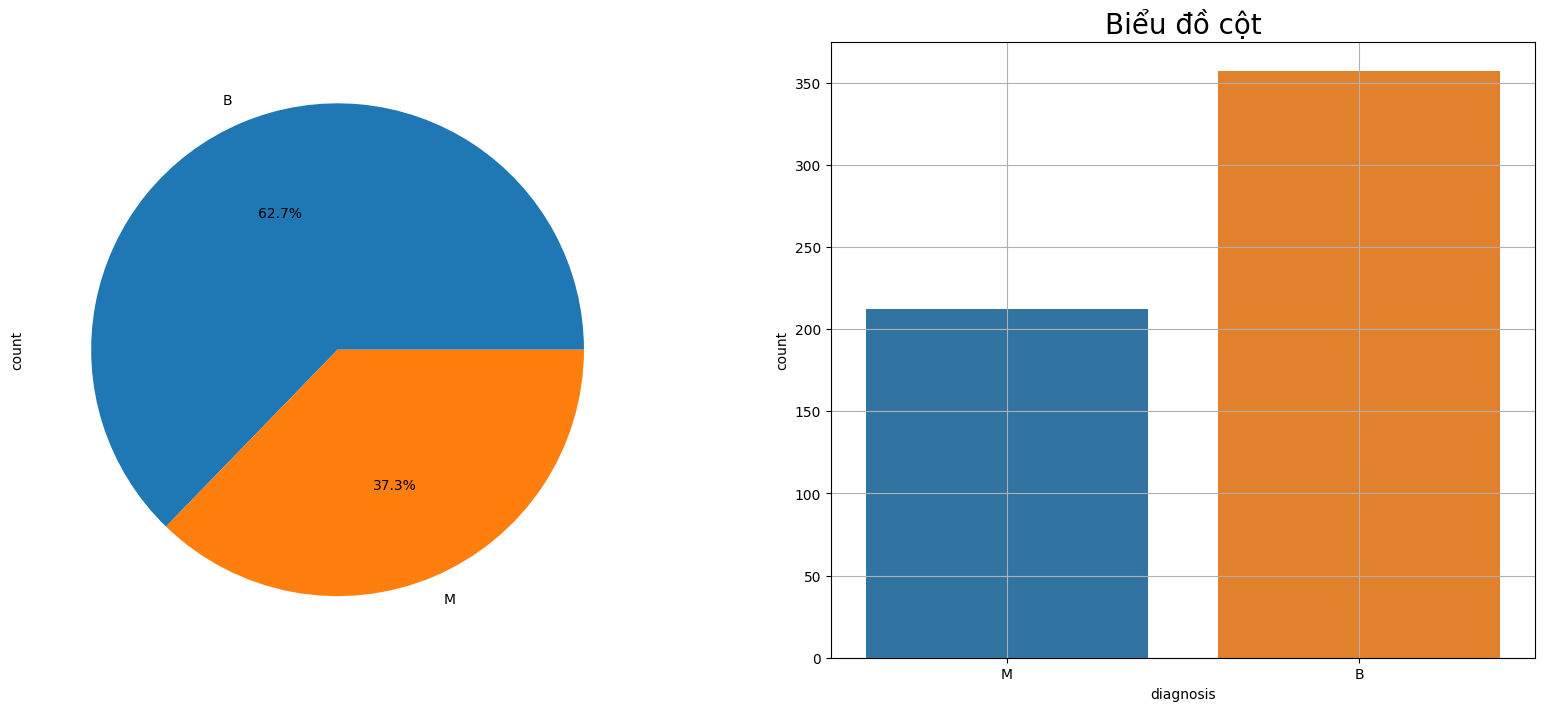

In [ ]:
f, ax = plt.subplots(ncols= 2, figsize=(20,8))

df[tar_column].value_counts().plot(kind='pie', autopct='%.1f%%',ax=ax[0])

sns.countplot(x=tar_column, data=df, ax=ax[1],hue=tar_column)
plt.grid()
ax[1].set_title("Biểu đồ cột", fontsize=20)

In [ ]:
# Count how many times appear for each value in Target feature
df[tar_column].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

## **C. Vizualize The Other Numerical Column**

#### **Implement Label Encoded for Target**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df[tar_column] = LabelEncoder().fit_transform(df[tar_column])

In [ ]:
df

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590         0.24390   
565     1261.0          0.09780           0.10340         0.14400   
566      858.1          0.08455           0.10230         0.09251   
567     1265.0          0.11780           0.27700         0.35140   
568      181.0          0.05263           0.04362         0.00000   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                0.14710  ...        25.380          17.33           184.60   
1                0.07017  ...        24.990          23.41           158.80   
2                0.12790  ...        23.570          25.53           152.50   
3                0.10520  ...        14.910          26.50            98.87   
4                0.10430  ...        22.540          16.67           152.20   
..                   ...  ...           ...            ...              ...   
564              0.13890  ...        25.450          26.40           166.10   
565              0.09791  ...        23.690          38.25           155.00   
566              0.05302  ...        18.980          34.12           126.70   
567              0.15200  ...        25.740          39.42           184.60   
568              0.00000  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0

#### Create Correlation Matrix

<Axes: >

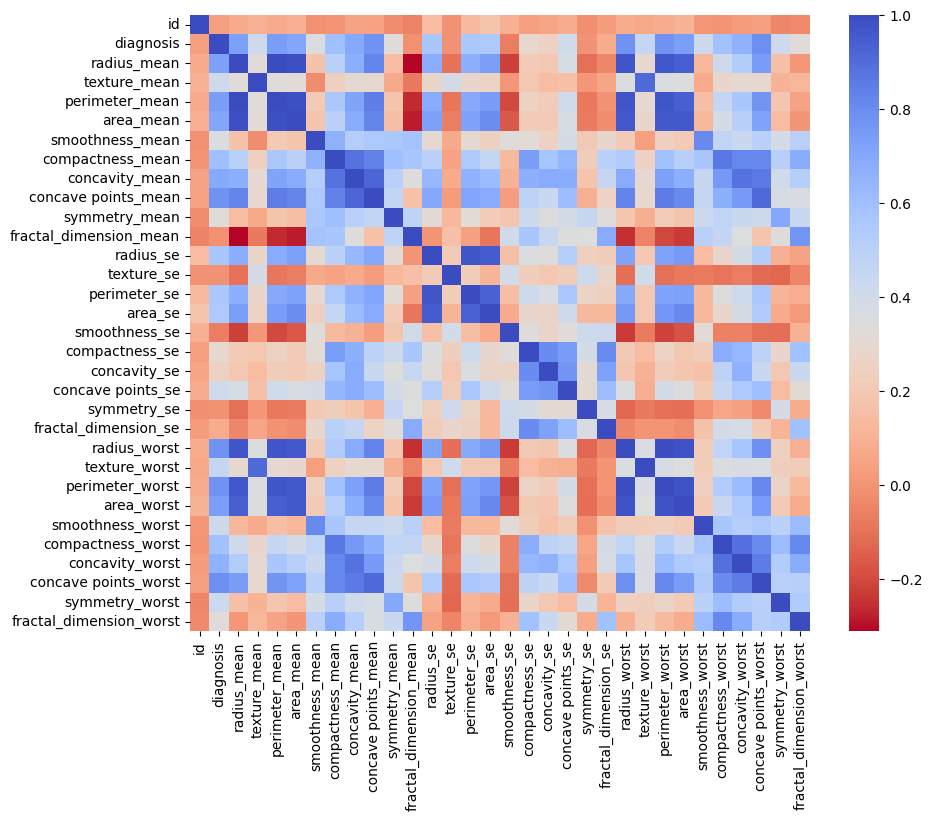

In [ ]:
# To view the realtionship between features, seem like there are no better option than this
correlation_matrix= df.corr()

f, ax1 = plt.subplots(1, 1, figsize=(10,8))

sns.heatmap(correlation_matrix, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)

In [ ]:
# Sort the value
correlation_matrix[tar_column].sort_values()

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
id                         0.039769
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0.776614
perimeter_worst            0.782914
concave points_worst       0.793566
diagnosis                  1.000000
Name: diagnosis, dtype: float64

As depicted in the figure, the top four columns have positive and negative influences on the Target column, each of them is:
* Top 4 show Positivity:
1. concave points_worst
2. perimeter_worst
3. concave points_mean
4. radius_worst
* Top 4 show Negativity:
1. smoothness_se
2. fractal_dimension_mean
3. texture_se
4. symmetry_se

In [ ]:
# Create lists that only contain top8 most influent columns
columns_top8= ['concave points_worst',
                             'perimeter_worst','concave points_mean','radius_worst',
                             'smoothness_se','fractal_dimension_mean','texture_se','symmetry_se']
columns_top8withtar= ['concave points_worst',
                             'perimeter_worst','concave points_mean','radius_worst',
                             'smoothness_se','fractal_dimension_mean','texture_se','symmetry_se','diagnosis']

#### Review concave points_worst column

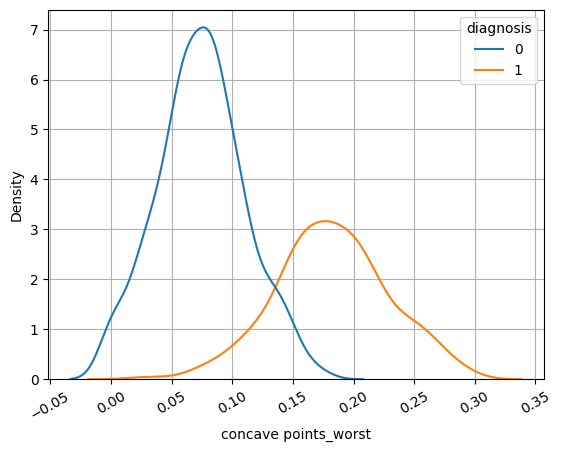

In [ ]:
# Plot Kdeplot figure to illustrate and figure out the relatinship between "radius_mean" and target column
sns.kdeplot(x="concave points_worst", data=df, hue=tar_column)
plt.xticks(rotation=30)
plt.grid()

#### Review perimeter_worst column

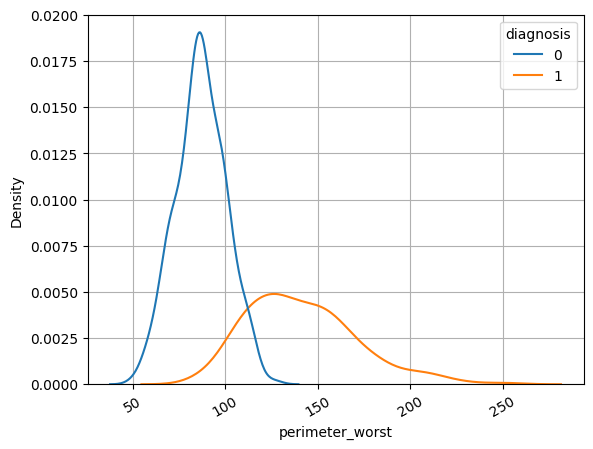

In [ ]:
sns.kdeplot(x="perimeter_worst", data=df, hue=tar_column)
plt.xticks(rotation=30)
plt.grid()

#### Review smoothness_se column

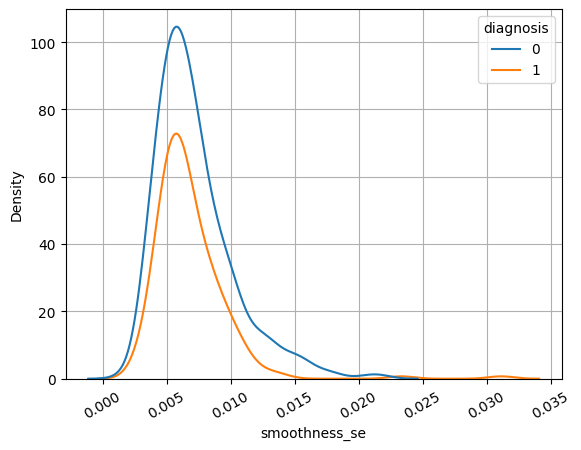

In [ ]:
sns.kdeplot(x="smoothness_se", data=df, hue=tar_column)
plt.xticks(rotation=30)
plt.grid()

#### Review fractal_dimension_mean column

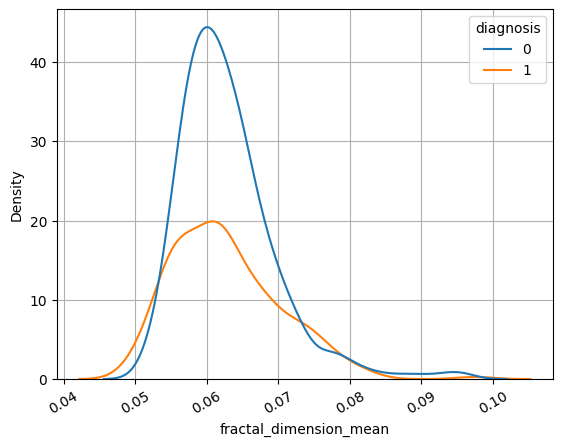

In [ ]:
sns.kdeplot(x="fractal_dimension_mean", data=df, hue=tar_column)
plt.xticks(rotation=30)
plt.grid()

In [ ]:
sns.set_theme(style="ticks")

#### Plot all features columns with target column

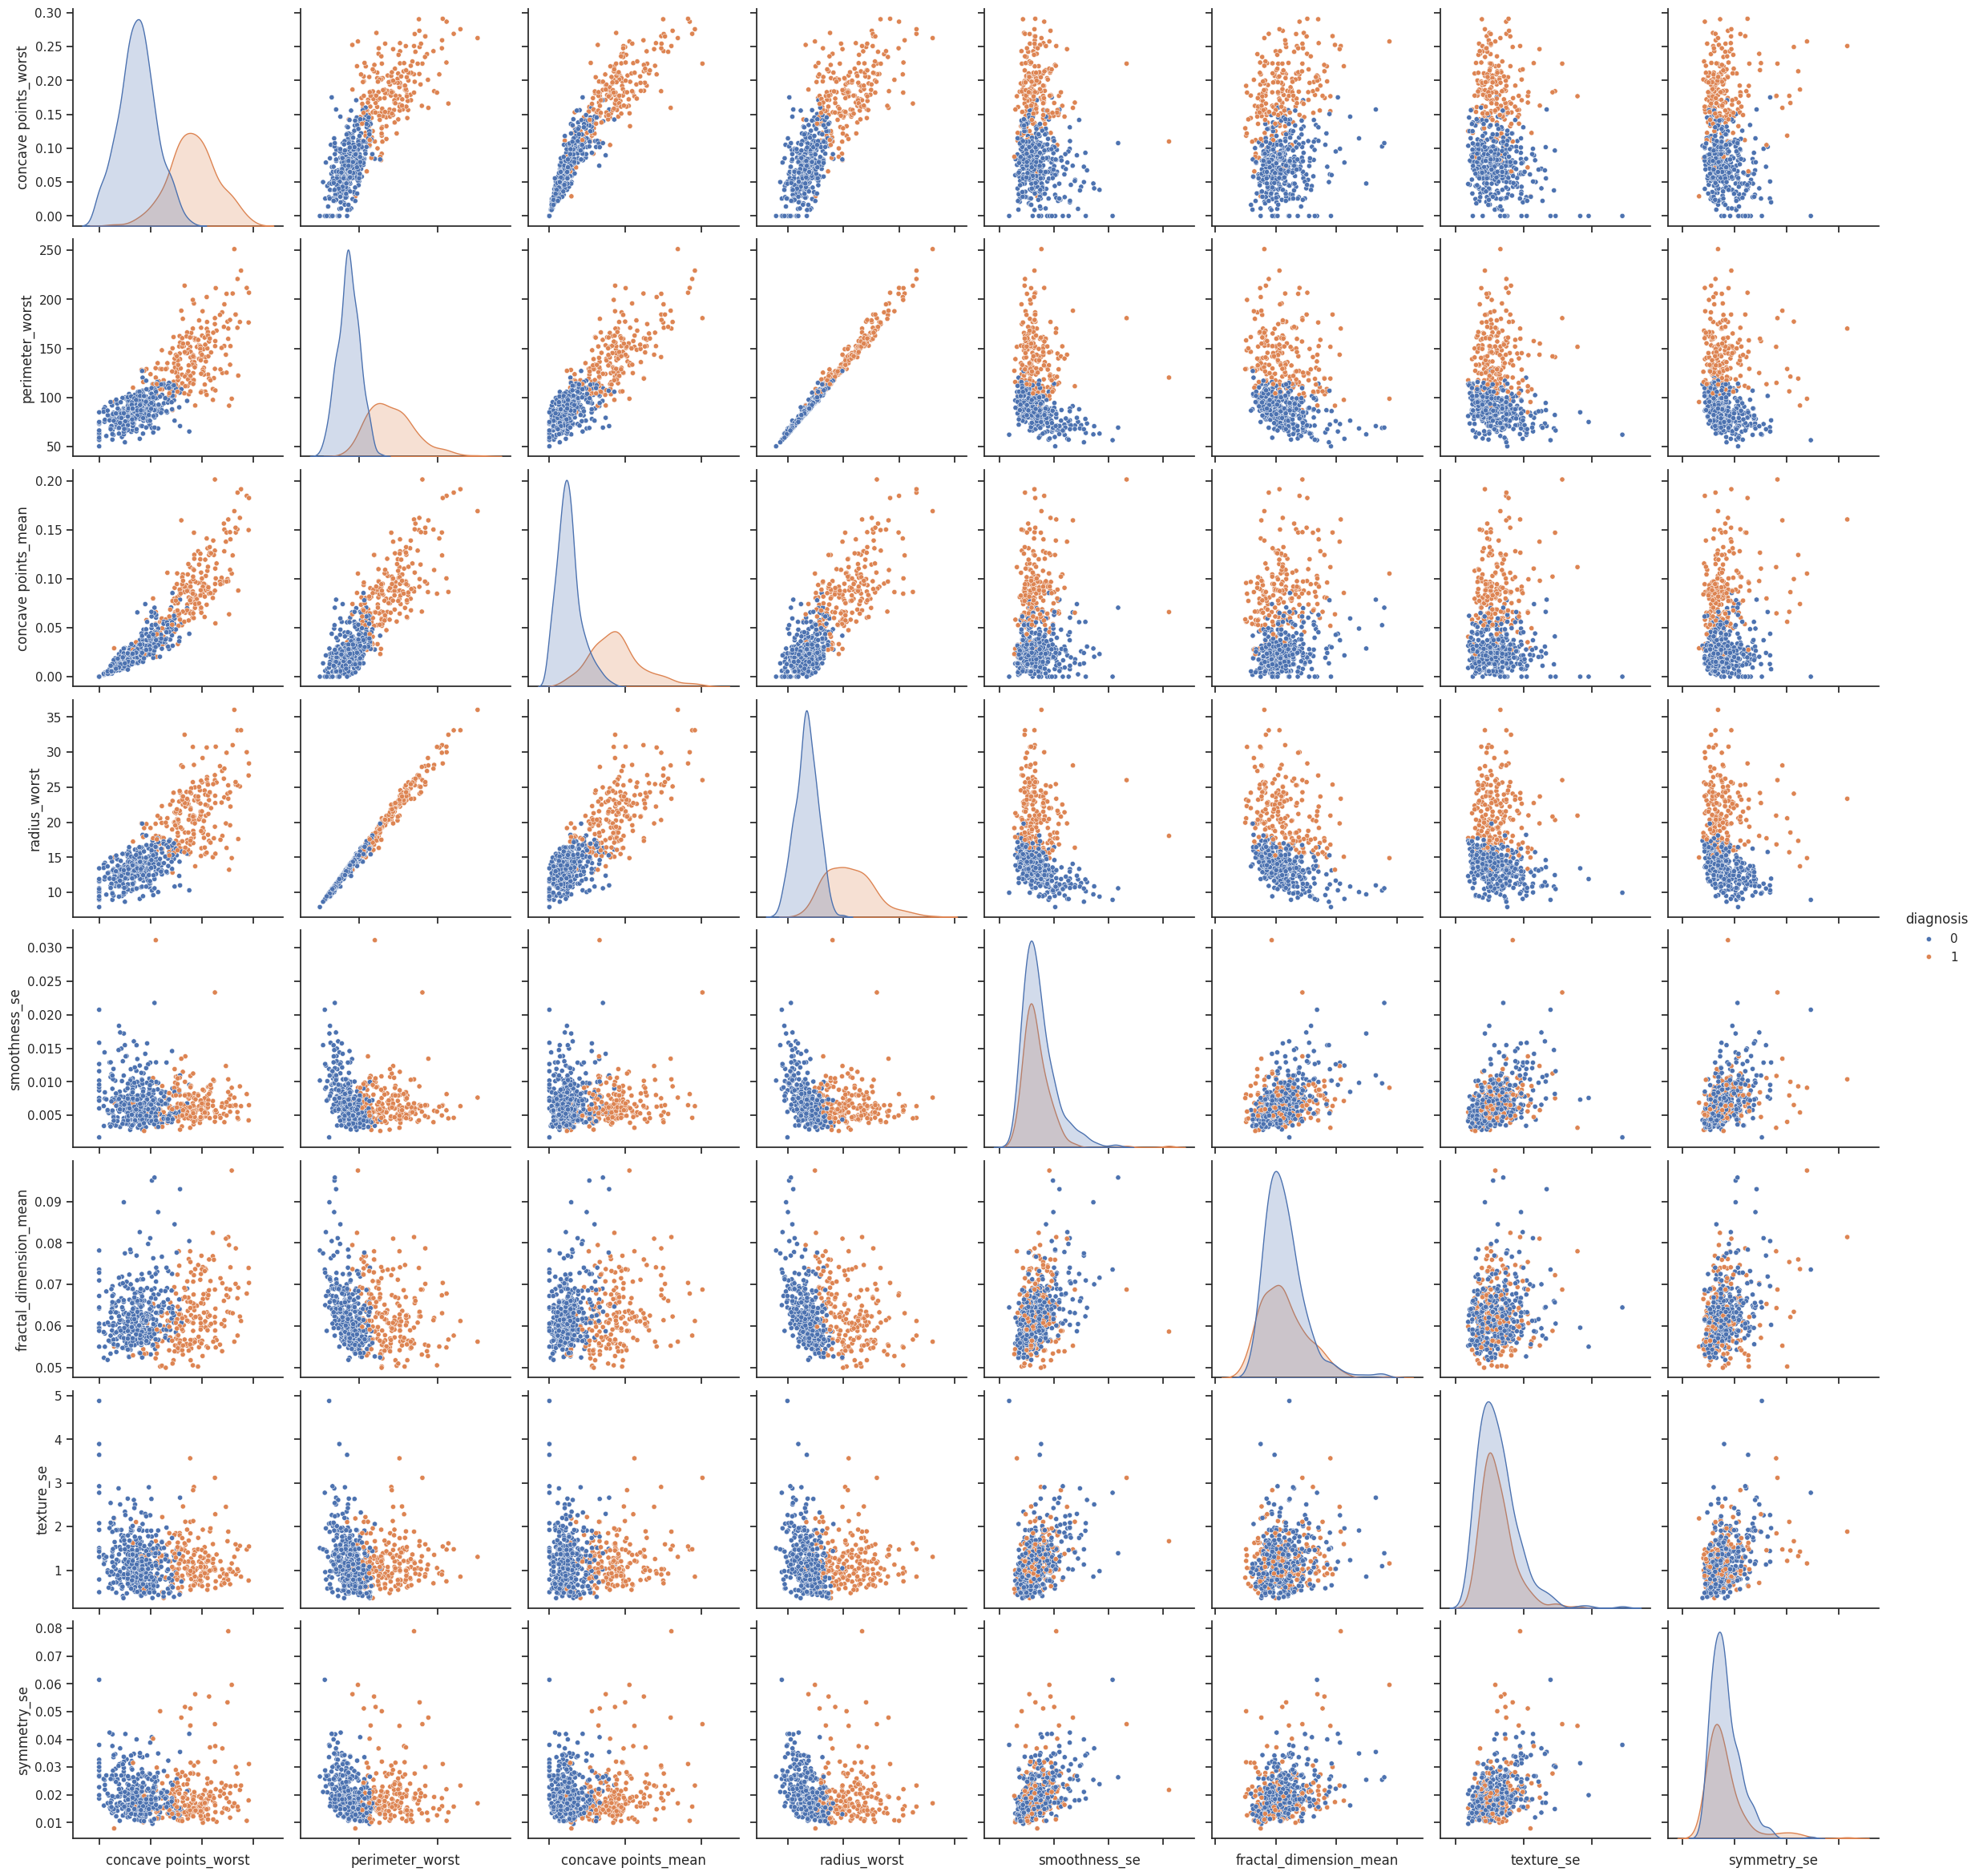

In [ ]:
#pair plots of entire dataset
pp = sns.pairplot(df[columns_top8withtar],
                  hue=tar_column,
                  palette='deep',
                  height=3,
                  diag_kind='kde',
                  diag_kws=dict(fill=True),
                  plot_kws=dict(s=20))
pp.set(xticklabels=[])

## **D. Detect the Outlier Values from 8 columns**

<ipython-input-27-baa144b1b6fd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=tar_column, y="concave points_worst", data=df, palette=colors, ax=ax[0])
<ipython-input-27-baa144b1b6fd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=tar_column, y="perimeter_worst", data=df, palette=colors, ax=ax[1])
<ipython-input-27-baa144b1b6fd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=tar_column, y="concave points_mean", data=df, palette=colors, ax=ax[2])
<ipython-input-27-baa144b1b6fd>:15: FutureWarning: 

Passing `palette` without assig

Text(0.5, 1.0, '(+) radius_worst')

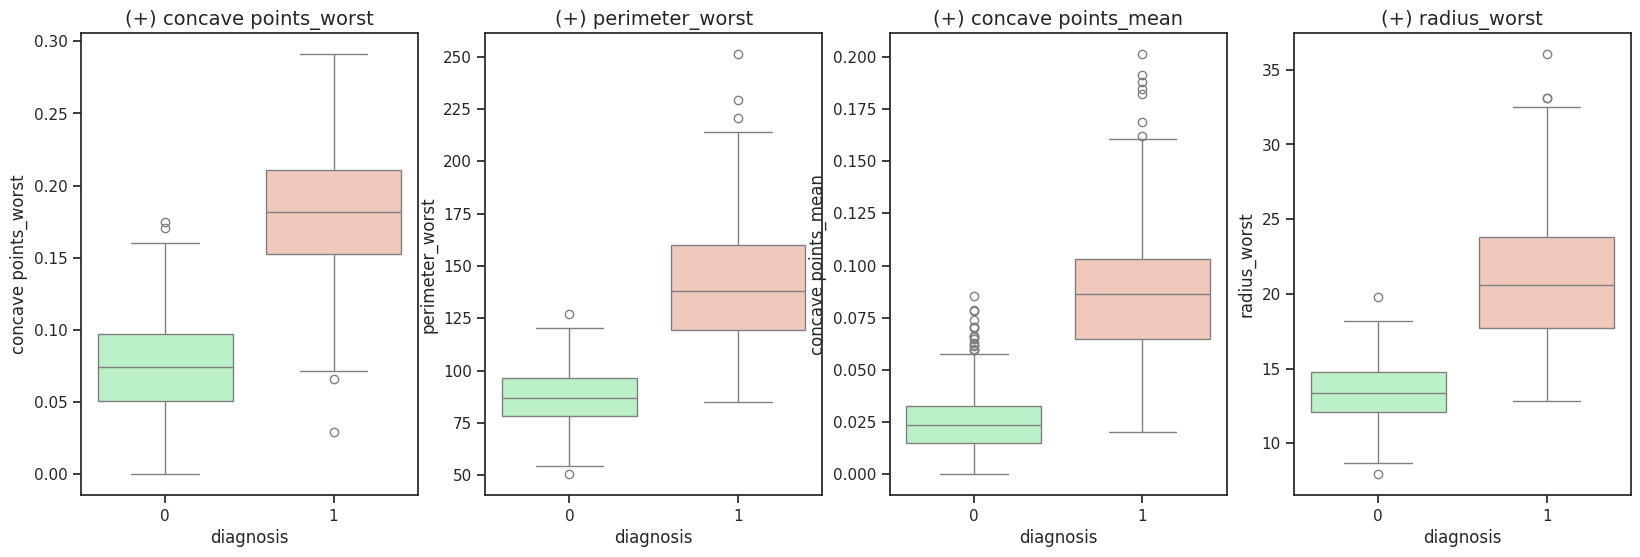

In [ ]:
# Check Boxplot of Top 4 Positive Columns
f, ax = plt.subplots(ncols= 4, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']

sns.boxplot(x=tar_column, y="concave points_worst", data=df, palette=colors, ax=ax[0])
ax[0].set_title("(+) concave points_worst", fontsize=14)

sns.boxplot(x=tar_column, y="perimeter_worst", data=df, palette=colors, ax=ax[1])
ax[1].set_title("(+) perimeter_worst", fontsize=14)

sns.boxplot(x=tar_column, y="concave points_mean", data=df, palette=colors, ax=ax[2])
ax[2].set_title("(+) concave points_mean", fontsize=14)

sns.boxplot(x=tar_column, y="radius_worst", data=df, palette=colors, ax=ax[3])
ax[3].set_title("(+) radius_worst", fontsize=14)

<ipython-input-28-a9673066a96c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=tar_column, y="smoothness_se", data=df, palette=["#0101DF", "#DF0101"], ax=ax[0])
<ipython-input-28-a9673066a96c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=tar_column, y="fractal_dimension_mean", data=df, palette=["#0101DF", "#DF0101"], ax=ax[1])
<ipython-input-28-a9673066a96c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=tar_column, y="texture_se", data=df, palette=["#0101DF", "#DF0101"], ax=ax[2])
<ipython-input-28-a9673066a96c>:13: FutureWar

Text(0.5, 1.0, '(-) symmetry_se')

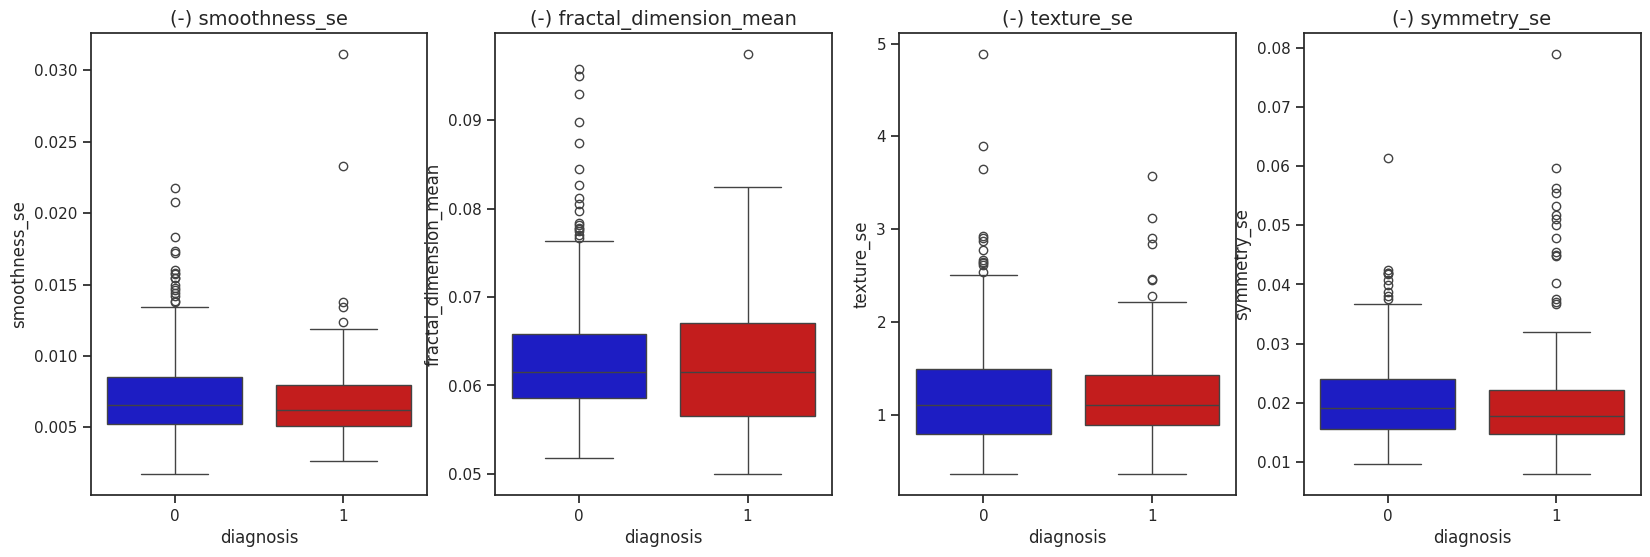

In [ ]:
# Check Boxplot of Top 4 Negative Columns
f, ax = plt.subplots(ncols= 4, figsize=(20,6))

sns.boxplot(x=tar_column, y="smoothness_se", data=df, palette=["#0101DF", "#DF0101"], ax=ax[0])
ax[0].set_title("(-) smoothness_se", fontsize=14)

sns.boxplot(x=tar_column, y="fractal_dimension_mean", data=df, palette=["#0101DF", "#DF0101"], ax=ax[1])
ax[1].set_title("(-) fractal_dimension_mean", fontsize=14)

sns.boxplot(x=tar_column, y="texture_se", data=df, palette=["#0101DF", "#DF0101"], ax=ax[2])
ax[2].set_title("(-) texture_se", fontsize=14)

sns.boxplot(x=tar_column, y="symmetry_se", data=df, palette=["#0101DF", "#DF0101"], ax=ax[3])
ax[3].set_title("(-) symmetry_se", fontsize=14)

## **E. Feature Importance Review**

In [ ]:
column_names_notarget=column_names.copy()
column_names_notarget.remove(tar_column)
column_names_notarget

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model_random_featureimportance = RandomForestClassifier()

In [ ]:
# Split x và y on df
x = df[column_names_notarget]
y = df[tar_column]

In [ ]:
# Let the model_dt_featureimportance learn x and y
model_random_featureimportance.fit(x,y)

RandomForestClassifier()

In [ ]:
# Create "Fearture Importance Rank" dataframe
feat_imp = pd.DataFrame({ 'Tên Feature': column_names_notarget, 'Mức độ quan trọng': model_random_featureimportance.feature_importances_}).sort_values(by='Mức độ quan trọng', ascending=True).set_index('Tên Feature')


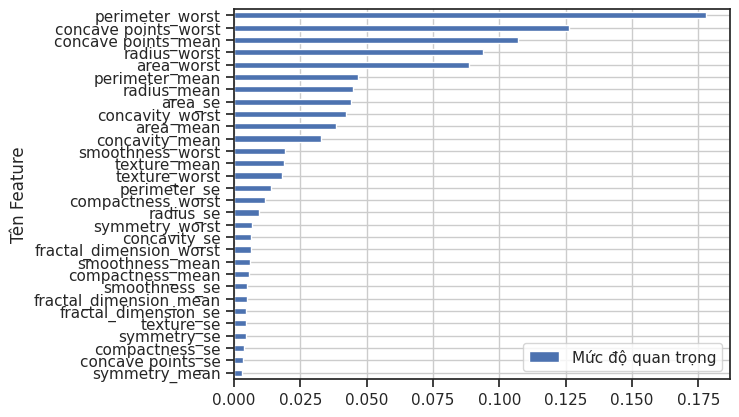

In [ ]:
# Plot the rank
feat_imp.plot(kind='barh')
plt.grid()

* Top 4 Positive:
1. concave points_worst
2. perimeter_worst
3. concave points_mean
4. radius_worst
* Top 4 Negative:
1. smoothness_se
2. fractal_dimension_mean
3. texture_se
4. symmetry_se

# **2. Detect and moving out the Outlier values in top 8 columns**

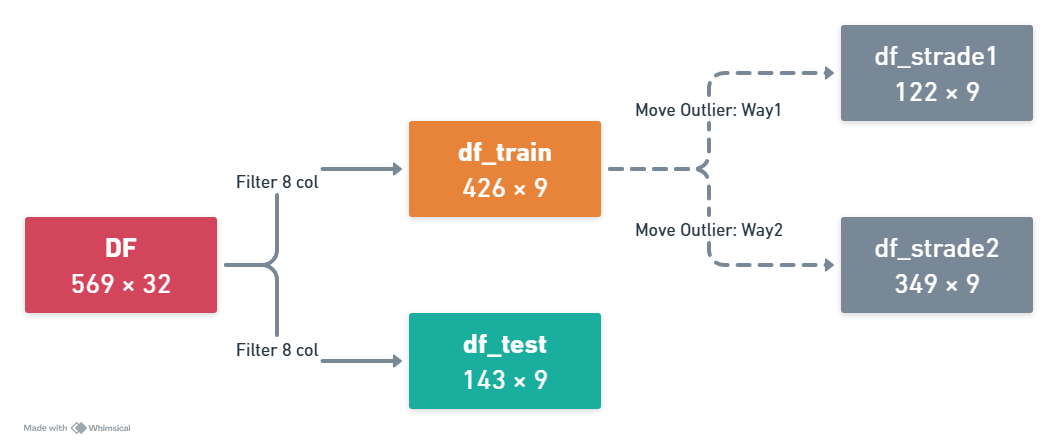

## **A. Split initial DF into 2 Dataset: Train & Test**

### Split initial DF into 2 dataset: Train and Test (75%)

In [ ]:
# Create split_point
N1=0.75
split_point = int(len(df) * N1)

In [ ]:
# For Train, which is 80% data of DF
df_train = df.iloc[:split_point][columns_top8withtar]

In [ ]:
# For Test, which is 20% remianing data of DF
df_test = df.iloc[split_point:][columns_top8withtar]

In [ ]:
df_train

concave points_worst  perimeter_worst  concave points_mean  radius_worst  \
0                 0.26540           184.60             0.147100         25.38   
1                 0.18600           158.80             0.070170         24.99   
2                 0.24300           152.50             0.127900         23.57   
3                 0.25750            98.87             0.105200         14.91   
4                 0.16250           152.20             0.104300         22.54   
..                    ...              ...                  ...           ...   
421               0.11080           114.10             0.063000         16.46   
422               0.11050            81.93             0.044970         12.64   
423               0.14070           101.40             0.048120         15.14   
424               0.04589            71.79             0.019670         11.21   
425               0.02579            69.92             0.005159         11.11   

     smoothness_se  fractal_dimension_mean  texture_se  symmetry_se  diagnosis  
0         0.006399                 0.07871      0.9053      0.03003          1  
1         0.005225                 0.05667      0.7339      0.01389          1  
2         0.006150                 0.05999      0.7869      0.02250          1  
3         0.009110                 0.09744      1.1560      0.05963          1  
4         0.011490                 0.05883      0.7813      0.01756          1  
..             ...                     ...         ...          ...        ...  
421       0.009976                 0.07406      1.5110      0.02653          0  
422       0.005884                 0.06320      0.7339      0.01848          0  
423       0.003980                 0.06181      0.8950      0.01581          0  
424       0.013070                 0.07029      1.7470      0.03100          0  
425       0.005724                 0.06439      1.3410      0.01445          0  

[426 rows x 9 columns]

In [ ]:
df_test

concave points_worst  perimeter_worst  concave points_mean  radius_worst  \
426               0.09310            81.41              0.02218        12.130   
427               0.07485            83.69              0.01404        12.760   
428               0.04044            74.35              0.01370        11.680   
429               0.03612            88.87              0.01835        13.820   
430               0.24750           125.40              0.09711        16.350   
..                    ...              ...                  ...           ...   
564               0.22160           166.10              0.13890        25.450   
565               0.16280           155.00              0.09791        23.690   
566               0.14180           126.70              0.05302        18.980   
567               0.26500           184.60              0.15200        25.740   
568               0.00000            59.16              0.00000         9.456   

     smoothness_se  fractal_dimension_mean  texture_se  symmetry_se  diagnosis  
426       0.007364                 0.06915      1.1270      0.02161          0  
427       0.006543                 0.05977      1.6210      0.01844          0  
428       0.005883                 0.06148      0.9671      0.02009          0  
429       0.007337                 0.05544      0.8836      0.01940          0  
430       0.006965                 0.06898      0.8749      0.01499          1  
..             ...                     ...         ...          ...        ...  
564       0.010300                 0.05623      1.2560      0.01114          1  
565       0.005769                 0.05533      2.4630      0.01898          1  
566       0.005903                 0.05648      1.0750      0.01318          1  
567       0.006522                 0.07016      1.5950      0.02324          1  
568       0.007189                 0.05884      1.4280      0.02676          0  

[143 rows x 9 columns]

## **B. Stradetagy 1**: Use "Drop" all Dataframe for DF_Strade1

---



In [ ]:
# Duplicate from df_train into the new one
df_strade1 = df_train.copy()
df_strade1

concave points_worst  perimeter_worst  concave points_mean  radius_worst  \
0                 0.26540           184.60             0.147100         25.38   
1                 0.18600           158.80             0.070170         24.99   
2                 0.24300           152.50             0.127900         23.57   
3                 0.25750            98.87             0.105200         14.91   
4                 0.16250           152.20             0.104300         22.54   
..                    ...              ...                  ...           ...   
421               0.11080           114.10             0.063000         16.46   
422               0.11050            81.93             0.044970         12.64   
423               0.14070           101.40             0.048120         15.14   
424               0.04589            71.79             0.019670         11.21   
425               0.02579            69.92             0.005159         11.11   

     smoothness_se  fractal_dimension_mean  texture_se  symmetry_se  diagnosis  
0         0.006399                 0.07871      0.9053      0.03003          1  
1         0.005225                 0.05667      0.7339      0.01389          1  
2         0.006150                 0.05999      0.7869      0.02250          1  
3         0.009110                 0.09744      1.1560      0.05963          1  
4         0.011490                 0.05883      0.7813      0.01756          1  
..             ...                     ...         ...          ...        ...  
421       0.009976                 0.07406      1.5110      0.02653          0  
422       0.005884                 0.06320      0.7339      0.01848          0  
423       0.003980                 0.06181      0.8950      0.01581          0  
424       0.013070                 0.07029      1.7470      0.03100          0  
425       0.005724                 0.06439      1.3410      0.01445          0  

[426 rows x 9 columns]

### **Filter for each column in top 8**

#### **concave points_worst column**

In [ ]:
## Xử lý các giá trị Outlier tương ứng giá trị "1"

In [ ]:
# Tập hợp giá trị của cột concave points_worst tương ứng giá trị "1" ở cột Target
concave_points_worst_1 = df_train['concave points_worst'].loc[df_train[tar_column] == 1]

In [ ]:
# Lấy giá trị Q1 và Q3 từ concave_points_worst_1
q25_concave_points_worst_1, q75_concave_points_worst_1 = np.percentile(concave_points_worst_1.values, 25), np.percentile(concave_points_worst_1.values, 75)

In [ ]:
# Xác định giá trị Outlier Lower và Outlier Upper cần phải loại bỏ của cột concave_points_worst_1
Upper_concave_points_worst_1 = q75_concave_points_worst_1 + (1.5 * (q75_concave_points_worst_1 - q25_concave_points_worst_1))
Lower_concave_points_worst_1 = q25_concave_points_worst_1 - (1.5 * (q75_concave_points_worst_1 - q25_concave_points_worst_1))

In [ ]:
Lower_concave_points_worst_1, Upper_concave_points_worst_1

(0.06815000000000003, 0.29335)

In [ ]:
# Lọc các giá trị nhỏ hơn Lower_concave_points_worst_1 và lớn hơn Upper_concave_points_worst_1 từ bảng concave_points_worst_1
df_strade1 = df_strade1.drop(df_strade1[(df_strade1['concave points_worst'] > Upper_concave_points_worst_1) | (df_strade1['concave points_worst'] < Lower_concave_points_worst_1)].index)
#df_filter1 =concave_points_worst_1[(concave_points_worst_1 > Lower_concave_points_worst_1) & (concave_points_worst_1 < Upper_concave_points_worst_1)]

In [ ]:
## Xử lý các giá trị Outlier tương ứng giá trị "0"

In [ ]:
# Tập hợp giá trị của cột concave points_worst tương ứng giá trị "0" ở cột Target
concave_points_worst_0 = df_train['concave points_worst'].loc[df_train[tar_column] == 0]

In [ ]:
# Lấy giá trị Q1 và Q3 từ concave_points_worst_0
q25_concave_points_worst_0, q75_concave_points_worst_0 = np.percentile(concave_points_worst_0.values, 25), np.percentile(concave_points_worst_0.values, 75)

In [ ]:
# Xác định giá trị Outlier Lower và Outlier Upper cần phải loại bỏ của cột concave_points_worst_1
Upper_concave_points_worst_0 = q75_concave_points_worst_0 + (1.5 * (q75_concave_points_worst_0 - q25_concave_points_worst_0))
Lower_concave_points_worst_0 = q25_concave_points_worst_0 - (1.5 * (q75_concave_points_worst_0 - q25_concave_points_worst_0))

In [ ]:
Lower_concave_points_worst_0, Upper_concave_points_worst_0

(-0.018600000000000005, 0.1594)

In [ ]:
# Lọc các giá trị nhỏ hơn Lower_concave_points_worst_0 và lớn hơn Upper_concave_points_worst_0 từ bảng concave_points_worst_0
df_strade1 = df_strade1.drop(df_strade1[(df_strade1['concave points_worst'] > Upper_concave_points_worst_0) | (df_strade1['concave points_worst'] < Lower_concave_points_worst_0)].index)


#### **perimeter_worst column**

In [ ]:
## Xử lý các giá trị Outlier tương ứng giá trị "1"

In [ ]:
# Tập hợp giá trị của cột perimeter_worst tương ứng giá trị "1" ở cột Target
perimeter_worst_1 = df_train['perimeter_worst'].loc[df_train[tar_column] == 1]

In [ ]:
# Lấy giá trị Q1 và Q3 từ perimeter_worst_1
q25_perimeter_worst_1, q75_perimeter_worst_1 = np.percentile(perimeter_worst_1.values, 25), np.percentile(perimeter_worst_1.values, 75)

In [ ]:
# Xác định giá trị Outlier Lower và Outlier Upper cần phải loại bỏ của cột perimeter_worst_1
Upper_perimeter_worst_1 = q75_perimeter_worst_1 + (1.5 * (q75_perimeter_worst_1 - q25_perimeter_worst_1))
Lower_perimeter_worst_1 = q25_perimeter_worst_1 - (1.5 * (q75_perimeter_worst_1 - q25_perimeter_worst_1))

In [ ]:
Upper_perimeter_worst_1 , Lower_perimeter_worst_1

(220.15000000000003, 56.55)

In [ ]:
# lọc các giá trị trong khoảng Lower đến Upper từ bảng perimeter_worst_1
df_strade1 = df_strade1.drop(df_strade1[(df_strade1['perimeter_worst'] > Upper_perimeter_worst_1) | (df_strade1['perimeter_worst'] < Lower_perimeter_worst_1)].index)


In [ ]:
## Xử lý các giá trị Outlier tương ứng giá trị "0"

In [ ]:
# Tập hợp giá trị của cột perimeter_worst tương ứng giá trị "0" ở cột Target
perimeter_worst_0 = df_train['perimeter_worst'].loc[df_train[tar_column] == 0]

In [ ]:
# Lấy giá trị Q1 và Q3 từ perimeter_worst_0
q25_perimeter_worst_0, q75_perimeter_worst_0 = np.percentile(perimeter_worst_0.values, 25), np.percentile(perimeter_worst_0.values, 75)

In [ ]:
# Xác định giá trị Outlier Lower và Outlier Upper cần phải loại bỏ của cột perimeter_worst_0
Upper_perimeter_worst_0 = q75_perimeter_worst_0 + (1.5 * (q75_perimeter_worst_0 - q25_perimeter_worst_0))
Lower_perimeter_worst_0 = q25_perimeter_worst_0 - (1.5 * (q75_perimeter_worst_0 - q25_perimeter_worst_0))

In [ ]:
Lower_perimeter_worst_0, Upper_perimeter_worst_0

(52.829999999999984, 120.67000000000002)

In [ ]:
# Lấy các giá trị trong khoảng Lower_perimeter_worst_0 đến Upper_perimeter_worst_0 từ bảng perimeter_worst_0
df_strade1 = df_strade1.drop(df_strade1[(df_strade1['perimeter_worst'] > Upper_perimeter_worst_0) | (df_strade1['perimeter_worst'] < Lower_perimeter_worst_0)].index)

#### **concave points_mean column**

In [ ]:
## Xử lý các giá trị Outlier tương ứng giá trị "1"

In [ ]:
# Tập hợp giá trị của cột concave points_mean tương ứng giá trị "1" ở cột Target
concave_points_mean_1 = df_train['concave points_mean'].loc[df_train[tar_column] == 1]

In [ ]:
# Lấy giá trị Q1 và Q3 từ concave_points_mean_1
q25_concave_points_mean_1, q75_concave_points_mean_1 = np.percentile(concave_points_mean_1.values, 25), np.percentile(concave_points_mean_1.values, 75)

In [ ]:
# Xác định giá trị Outlier Lower và Outlier Upper cần phải loại bỏ của cột concave_points_mean_1
Upper_concave_points_mean_1 = q75_concave_points_mean_1 + (1.5 * (q75_concave_points_mean_1 - q25_concave_points_mean_1))
Lower_concave_points_mean_1 = q25_concave_points_mean_1 - (1.5 * (q75_concave_points_mean_1 - q25_concave_points_mean_1))

In [ ]:
Upper_concave_points_mean_1 , Lower_concave_points_mean_1

(0.15974499999999997, 0.0060250000000000165)

In [ ]:
# Lọc các giá trị trong khoảng Lower đến Upper từ bảng concave_points_mean_1
df_strade1 = df_strade1.drop(df_strade1[(df_strade1['concave points_mean'] > Upper_concave_points_mean_1) | (df_strade1['concave points_mean'] < Lower_concave_points_mean_1)].index)

In [ ]:
## Xử lý các giá trị Outlier tương ứng giá trị "0"

In [ ]:
# Tập hợp giá trị của cột concave_points_mean tương ứng giá trị "0" ở cột Target
concave_points_mean_0 = df_train['concave points_mean'].loc[df_train[tar_column] == 0]

In [ ]:
# Lấy giá trị Q1 và Q3 từ concave_points_mean_0
q25_concave_points_mean_0, q75_concave_points_mean_0 = np.percentile(concave_points_mean_0.values, 25), np.percentile(concave_points_mean_0.values, 75)

In [ ]:
# Xác định giá trị Outlier Lower và Outlier Upper cần phải loại bỏ của cột concave_points_mean_0
Upper_concave_points_mean_0 = q75_concave_points_mean_0 + (1.5 * (q75_concave_points_mean_0 - q25_concave_points_mean_0))
Lower_concave_points_mean_0 = q25_concave_points_mean_0 - (1.5 * (q75_concave_points_mean_0 - q25_concave_points_mean_0))

In [ ]:
Lower_concave_points_mean_0, Upper_concave_points_mean_0

(-0.012885000000000002, 0.059555000000000004)

In [ ]:
# Lọc các giá trị trong khoảng Lower_concave_points_mean_0 đến Upper_concave_points_mean_0 từ bảng concave_points_mean_0
df_strade1 = df_strade1.drop(df_strade1[(df_strade1['concave points_mean'] > Upper_concave_points_mean_0) | (df_strade1['concave points_mean'] < Lower_concave_points_mean_0)].index)

#### **radius_worst column**

In [ ]:
## Xử lý các giá trị Outlier tương ứng giá trị "1"

In [ ]:
# Tập hợp giá trị của cột radius_worst tương ứng giá trị "1" ở cột Target
radius_worst_1 = df_train['radius_worst'].loc[df_train[tar_column] == 1]

In [ ]:
# Lấy giá trị Q1 và Q3 từ radius_worst_1
q25_radius_worst_1, q75_radius_worst_1 = np.percentile(radius_worst_1.values, 25), np.percentile(radius_worst_1.values, 75)

In [ ]:
# Xác định giá trị Outlier Lower và Outlier Upper cần phải loại bỏ của cột radius_worst_1
Upper_radius_worst_1 = q75_radius_worst_1 + (1.5 * (q75_radius_worst_1 - q25_radius_worst_1))
Lower_radius_worst_1 = q25_radius_worst_1 - (1.5 * (q75_radius_worst_1 - q25_radius_worst_1))

In [ ]:
Upper_radius_worst_1 , Lower_radius_worst_1

(32.705, 8.745000000000003)

In [ ]:
# Lọc các giá trị trong khoảng Lower đến Upper từ bảng radius_worst_1
df_strade1 = df_strade1.drop(df_strade1[(df_strade1['radius_worst'] > Upper_radius_worst_1) | (df_strade1['radius_worst'] < Lower_radius_worst_1)].index)

In [ ]:
## Xử lý các giá trị Outlier tương ứng giá trị "0"

In [ ]:
# Tập hợp giá trị của cột radius_worst tương ứng giá trị "0" ở cột Target
radius_worst_0 = df_train['radius_worst'].loc[df_train[tar_column] == 0]

In [ ]:
# Lấy giá trị Q1 và Q3 từ radius_worst_0
q25_radius_worst_0, q75_radius_worst_0 = np.percentile(radius_worst_0.values, 25), np.percentile(radius_worst_0.values, 75)

In [ ]:
# Xác định giá trị Outlier Lower và Outlier Upper cần phải loại bỏ của cột radius_worst_0
Upper_radius_worst_0 = q75_radius_worst_0 + (1.5 * (q75_radius_worst_0 - q25_radius_worst_0))
Lower_radius_worst_0 = q25_radius_worst_0 - (1.5 * (q75_radius_worst_0 - q25_radius_worst_0))

In [ ]:
Lower_radius_worst_0, Upper_radius_worst_0

(8.48, 18.080000000000002)

In [ ]:
# Lấy các giá trị trong khoảng Lower_radius_worst_0 đến Upper_radius_worst_0 từ bảng radius_worst_0
df_strade1 = df_strade1.drop(df_strade1[(df_strade1['radius_worst'] > Upper_radius_worst_0) | (df_strade1['radius_worst'] < Lower_radius_worst_0)].index)

#### **smoothness_se column**

In [ ]:
## Xử lý các giá trị Outlier tương ứng giá trị "1"

In [ ]:
# Tập hợp giá trị của cột smoothness_se tương ứng giá trị "1" ở cột Target
smoothness_se_1 = df_train['smoothness_se'].loc[df_train[tar_column] == 1]

In [ ]:
# Lấy giá trị Q1 và Q3 từ smoothness_se_1
q25_smoothness_se_1, q75_smoothness_se_1 = np.percentile(smoothness_se_1.values, 25), np.percentile(smoothness_se_1.values, 75)

In [ ]:
# Xác định giá trị Outlier Lower và Outlier Upper cần phải loại bỏ của cột smoothness_se_1
Upper_smoothness_se_1 = q75_smoothness_se_1 + (1.5 * (q75_smoothness_se_1 - q25_smoothness_se_1))
Lower_smoothness_se_1 = q25_smoothness_se_1 - (1.5 * (q75_smoothness_se_1 - q25_smoothness_se_1))

In [ ]:
Upper_smoothness_se_1 , Lower_smoothness_se_1

(0.012289500000000002, 0.0007414999999999991)

In [ ]:
# Lọc các giá trị trong khoảng Lower đến Upper từ bảng smoothness_se_1
df_strade1 = df_strade1.drop(df_strade1[(df_strade1['smoothness_se'] > Upper_smoothness_se_1) | (df_strade1['smoothness_se'] < Lower_smoothness_se_1)].index)

In [ ]:
## Xử lý các giá trị Outlier tương ứng giá trị "0"

In [ ]:
# Tập hợp giá trị của cột smoothness_se tương ứng giá trị "0" ở cột Target
smoothness_se_0 = df_train['smoothness_se'].loc[df_train[tar_column] == 0]

In [ ]:
# Lấy giá trị Q1 và Q3 từ smoothness_se_0
q25_smoothness_se_0, q75_smoothness_se_0 = np.percentile(smoothness_se_0.values, 25), np.percentile(smoothness_se_0.values, 75)

In [ ]:
# Xác định giá trị Outlier Lower và Outlier Upper cần phải loại bỏ của cột smoothness_se_0
Upper_smoothness_se_0 = q75_smoothness_se_0 + (1.5 * (q75_smoothness_se_0 - q25_smoothness_se_0))
Lower_smoothness_se_0 = q25_smoothness_se_0 - (1.5 * (q75_smoothness_se_0 - q25_smoothness_se_0))

In [ ]:
Upper_smoothness_se_0 , Lower_smoothness_se_0

(0.013400999999999998, 0.00032900000000000203)

In [ ]:
# Lọc các giá trị trong khoảng Lower đến Upper từ bảng smoothness_se_1
df_strade1 = df_strade1.drop(df_strade1[(df_strade1['smoothness_se'] > Upper_smoothness_se_0) | (df_strade1['smoothness_se'] < Lower_smoothness_se_0)].index)

#### **fractal_dimension_mean column**

In [ ]:
## Xử lý các giá trị Outlier tương ứng giá trị "1"

In [ ]:
# Tập hợp giá trị của cột fractal_dimension_mean tương ứng giá trị "1" ở cột Target
fractal_dimension_mean_1 = df_train['fractal_dimension_mean'].loc[df_train[tar_column] == 1]

In [ ]:
# Lấy giá trị Q1 và Q3 từ fractal_dimension_mean_1
q25_fractal_dimension_mean_1, q75_fractal_dimension_mean_1 = np.percentile(fractal_dimension_mean_1.values, 25), np.percentile(fractal_dimension_mean_1.values, 75)

In [ ]:
# Xác định giá trị Outlier Lower và Outlier Upper cần phải loại bỏ của cột fractal_dimension_mean_1
Upper_fractal_dimension_mean_1 = q75_fractal_dimension_mean_1 + (1.5 * (q75_fractal_dimension_mean_1 - q25_fractal_dimension_mean_1))
Lower_fractal_dimension_mean_1 = q25_fractal_dimension_mean_1 - (1.5 * (q75_fractal_dimension_mean_1 - q25_fractal_dimension_mean_1))

In [ ]:
Upper_fractal_dimension_mean_1 , Lower_fractal_dimension_mean_1

(0.082465, 0.041145)

In [ ]:
# Lọc các giá trị trong khoảng Lower đến Upper từ bảng fractal_dimension_mean_1
df_strade1 = df_strade1.drop(df_strade1[(df_strade1['fractal_dimension_mean'] > Upper_fractal_dimension_mean_1) | (df_strade1['fractal_dimension_mean'] < Lower_fractal_dimension_mean_1)].index)

In [ ]:
## Xử lý các giá trị Outlier tương ứng giá trị "0"

In [ ]:
# Tập hợp giá trị của cột fractal_dimension_mean tương ứng giá trị "0" ở cột Target
fractal_dimension_mean_0 = df_train['fractal_dimension_mean'].loc[df_train[tar_column] == 0]

In [ ]:
# Lấy giá trị Q1 và Q3 từ fractal_dimension_mean_0
q25_fractal_dimension_mean_0, q75_fractal_dimension_mean_0 = np.percentile(fractal_dimension_mean_0.values, 25), np.percentile(fractal_dimension_mean_0.values, 75)

In [ ]:
# Xác định giá trị Outlier Lower và Outlier Upper cần phải loại bỏ của cột fractal_dimension_mean_0
Upper_fractal_dimension_mean_0 = q75_fractal_dimension_mean_0 + (1.5 * (q75_fractal_dimension_mean_0 - q25_fractal_dimension_mean_0))
Lower_fractal_dimension_mean_0 = q25_fractal_dimension_mean_0 - (1.5 * (q75_fractal_dimension_mean_0 - q25_fractal_dimension_mean_0))

In [ ]:
Upper_fractal_dimension_mean_0 , Lower_fractal_dimension_mean_0

(0.07561499999999999, 0.04837500000000001)

In [ ]:
# Lọc các giá trị trong khoảng Lower đến Upper từ bảng fractal_dimension_mean_0
df_strade1 = df_strade1.drop(df_strade1[(df_strade1['fractal_dimension_mean'] > Upper_fractal_dimension_mean_0) | (df_strade1['fractal_dimension_mean'] < Lower_fractal_dimension_mean_0)].index)

#### **texture_se column**

In [ ]:
## Xử lý các giá trị Outlier tương ứng giá trị "1"

In [ ]:
# Tập hợp giá trị của cột texture_se tương ứng giá trị "1" ở cột Target
texture_se_1 = df_train['texture_se'].loc[df_train[tar_column] == 1]

In [ ]:
# Lấy giá trị Q1 và Q3 từ texture_se_1
q25_texture_se_1, q75_texture_se_1 = np.percentile(texture_se_1.values, 25), np.percentile(texture_se_1.values, 75)

In [ ]:
# Xác định giá trị Outlier Lower và Outlier Upper cần phải loại bỏ của cột texture_se_1
Upper_texture_se_1 = q75_texture_se_1 + (1.5 * (q75_texture_se_1 - q25_texture_se_1))
Lower_texture_se_1 = q25_texture_se_1 - (1.5 * (q75_texture_se_1 - q25_texture_se_1))

In [ ]:
Upper_texture_se_1 , Lower_texture_se_1

(2.28585, -0.0017500000000000293)

In [ ]:
# Lọc các giá trị trong khoảng Lower đến Upper từ bảng texture_se_1
df_strade1 = df_strade1.drop(df_strade1[(df_strade1['texture_se'] > Upper_texture_se_1) | (df_strade1['texture_se'] < Lower_texture_se_1)].index)

In [ ]:
## Xử lý các giá trị Outlier tương ứng giá trị "0"

In [ ]:
# Tập hợp giá trị của cột texture_se tương ứng giá trị "0" ở cột Target
texture_se_0 = df_train['texture_se'].loc[df_train[tar_column] == 0]

In [ ]:
# Lấy giá trị Q1 và Q3 từ texture_se_0
q25_texture_se_0, q75_texture_se_0 = np.percentile(texture_se_0.values, 25), np.percentile(texture_se_0.values, 75)

In [ ]:
# Xác định giá trị Outlier Lower và Outlier Upper cần phải loại bỏ của cột texture_se_0
Upper_texture_se_0 = q75_texture_se_0 + (1.5 * (q75_texture_se_0 - q25_texture_se_0))
Lower_texture_se_0 = q25_texture_se_0 - (1.5 * (q75_texture_se_0 - q25_texture_se_0))

In [ ]:
Upper_texture_se_0 , Lower_texture_se_0

(2.54405, -0.2347499999999999)

In [ ]:
# Lọc các giá trị trong khoảng Lower đến Upper từ bảng texture_se_0
df_strade1 = df_strade1.drop(df_strade1[(df_strade1['texture_se'] > Upper_texture_se_0) | (df_strade1['texture_se'] < Lower_texture_se_0)].index)

#### **symmetry_se column**

In [ ]:
## Xử lý các giá trị Outlier tương ứng giá trị "1"

In [ ]:
# Tập hợp giá trị của cột symmetry_se tương ứng giá trị "1" ở cột Target
symmetry_se_1 = df_train['symmetry_se'].loc[df_train[tar_column] == 1]

In [ ]:
# Lấy giá trị Q1 và Q3 từ symmetry_se_1
q25_symmetry_se_1, q75_symmetry_se_1 = np.percentile(symmetry_se_1.values, 25), np.percentile(symmetry_se_1.values, 75)

In [ ]:
# Xác định giá trị Outlier Lower và Outlier Upper cần phải loại bỏ của cột symmetry_se_1
Upper_symmetry_se_1 = q75_symmetry_se_1 + (1.5 * (q75_symmetry_se_1 - q25_symmetry_se_1))
Lower_symmetry_se_1 = q25_symmetry_se_1 - (1.5 * (q75_symmetry_se_1 - q25_symmetry_se_1))

In [ ]:
Upper_symmetry_se_1 , Lower_symmetry_se_1

(0.03485, 0.0025299999999999993)

In [ ]:
# Lọc các giá trị trong khoảng Lower đến Upper từ bảng symmetry_se_1
df_strade1 = df_strade1.drop(df_strade1[(df_strade1['symmetry_se'] > Upper_symmetry_se_1) | (df_strade1['symmetry_se'] < Lower_symmetry_se_1)].index)

In [ ]:
## Xử lý các giá trị Outlier tương ứng giá trị "0"

In [ ]:
# Tập hợp giá trị của cột symmetry_se tương ứng giá trị "0" ở cột Target
symmetry_se_0 = df_train['symmetry_se'].loc[df_train[tar_column] == 0]

In [ ]:
# Lấy giá trị Q1 và Q3 từ symmetry_se_0
q25_symmetry_se_0, q75_symmetry_se_0 = np.percentile(symmetry_se_0.values, 25), np.percentile(symmetry_se_0.values, 75)

In [ ]:
# Xác định giá trị Outlier Lower và Outlier Upper cần phải loại bỏ của cột symmetry_se_0
Upper_symmetry_se_0 = q75_symmetry_se_0 + (1.5 * (q75_symmetry_se_0 - q25_symmetry_se_0))
Lower_symmetry_se_0 = q25_symmetry_se_0 - (1.5 * (q75_symmetry_se_0 - q25_symmetry_se_0))

In [ ]:
Upper_symmetry_se_0 , Lower_symmetry_se_0

(0.040105, 0.0017449999999999966)

In [ ]:
# Lọc các giá trị trong khoảng Lower đến Upper từ bảng symmetry_se_0
df_strade1 = df_strade1.drop(df_strade1[(df_strade1['symmetry_se'] > Upper_symmetry_se_0) | (df_strade1['symmetry_se'] < Lower_symmetry_se_0)].index)

In [ ]:
# Check the new Dataframe
df_strade1

concave points_worst  perimeter_worst  concave points_mean  radius_worst  \
13                0.11190           112.00              0.05364         16.84   
19                0.12880            99.70              0.04781         15.11   
20                0.07283            96.09              0.03110         14.50   
36                0.14470           116.20              0.05598         15.89   
40                0.11120           102.50              0.02031         15.93   
..                    ...              ...                  ...           ...   
413               0.13080           110.20              0.03876         16.76   
415               0.08263            85.09              0.02179         13.05   
418               0.08224            88.12              0.02402         13.65   
422               0.11050            81.93              0.04497         12.64   
423               0.14070           101.40              0.04812         15.14   

     smoothness_se  fractal_dimension_mean  texture_se  symmetry_se  diagnosis  
13        0.009769                 0.05338      1.0780      0.02981          1  
19        0.008462                 0.05766      0.7886      0.01980          0  
20        0.004097                 0.06811      0.7477      0.01678          0  
36        0.005878                 0.06125      1.0190      0.02028          1  
40        0.003280                 0.05587      0.8265      0.01380          1  
..             ...                     ...         ...          ...        ...  
413       0.004449                 0.05913      1.3360      0.01906          0  
415       0.009895                 0.06290      1.2030      0.02258          0  
418       0.006131                 0.06275      0.6457      0.01713          0  
422       0.005884                 0.06320      0.7339      0.01848          0  
423       0.003980                 0.06181      0.8950      0.01581          0  

[122 rows x 9 columns]

## **C. Stradetagy 2**: Use IQR with "for" Algorithm for DF_Strade2

### **Prepare the copied version of df_train**

In [ ]:
# Copy ra 1 dataframe mới tên df_strade2
df_strade2 = df_train.copy()

In [ ]:
df_strade2

concave points_worst  perimeter_worst  concave points_mean  radius_worst  \
0                 0.26540           184.60             0.147100         25.38   
1                 0.18600           158.80             0.070170         24.99   
2                 0.24300           152.50             0.127900         23.57   
3                 0.25750            98.87             0.105200         14.91   
4                 0.16250           152.20             0.104300         22.54   
..                    ...              ...                  ...           ...   
421               0.11080           114.10             0.063000         16.46   
422               0.11050            81.93             0.044970         12.64   
423               0.14070           101.40             0.048120         15.14   
424               0.04589            71.79             0.019670         11.21   
425               0.02579            69.92             0.005159         11.11   

     smoothness_se  fractal_dimension_mean  texture_se  symmetry_se  diagnosis  
0         0.006399                 0.07871      0.9053      0.03003          1  
1         0.005225                 0.05667      0.7339      0.01389          1  
2         0.006150                 0.05999      0.7869      0.02250          1  
3         0.009110                 0.09744      1.1560      0.05963          1  
4         0.011490                 0.05883      0.7813      0.01756          1  
..             ...                     ...         ...          ...        ...  
421       0.009976                 0.07406      1.5110      0.02653          0  
422       0.005884                 0.06320      0.7339      0.01848          0  
423       0.003980                 0.06181      0.8950      0.01581          0  
424       0.013070                 0.07029      1.7470      0.03100          0  
425       0.005724                 0.06439      1.3410      0.01445          0  

[426 rows x 9 columns]

### **Review 8 columns with Boxplot before moving out Outiler**

Text(0.5, 1.0, '- symmetry_se')

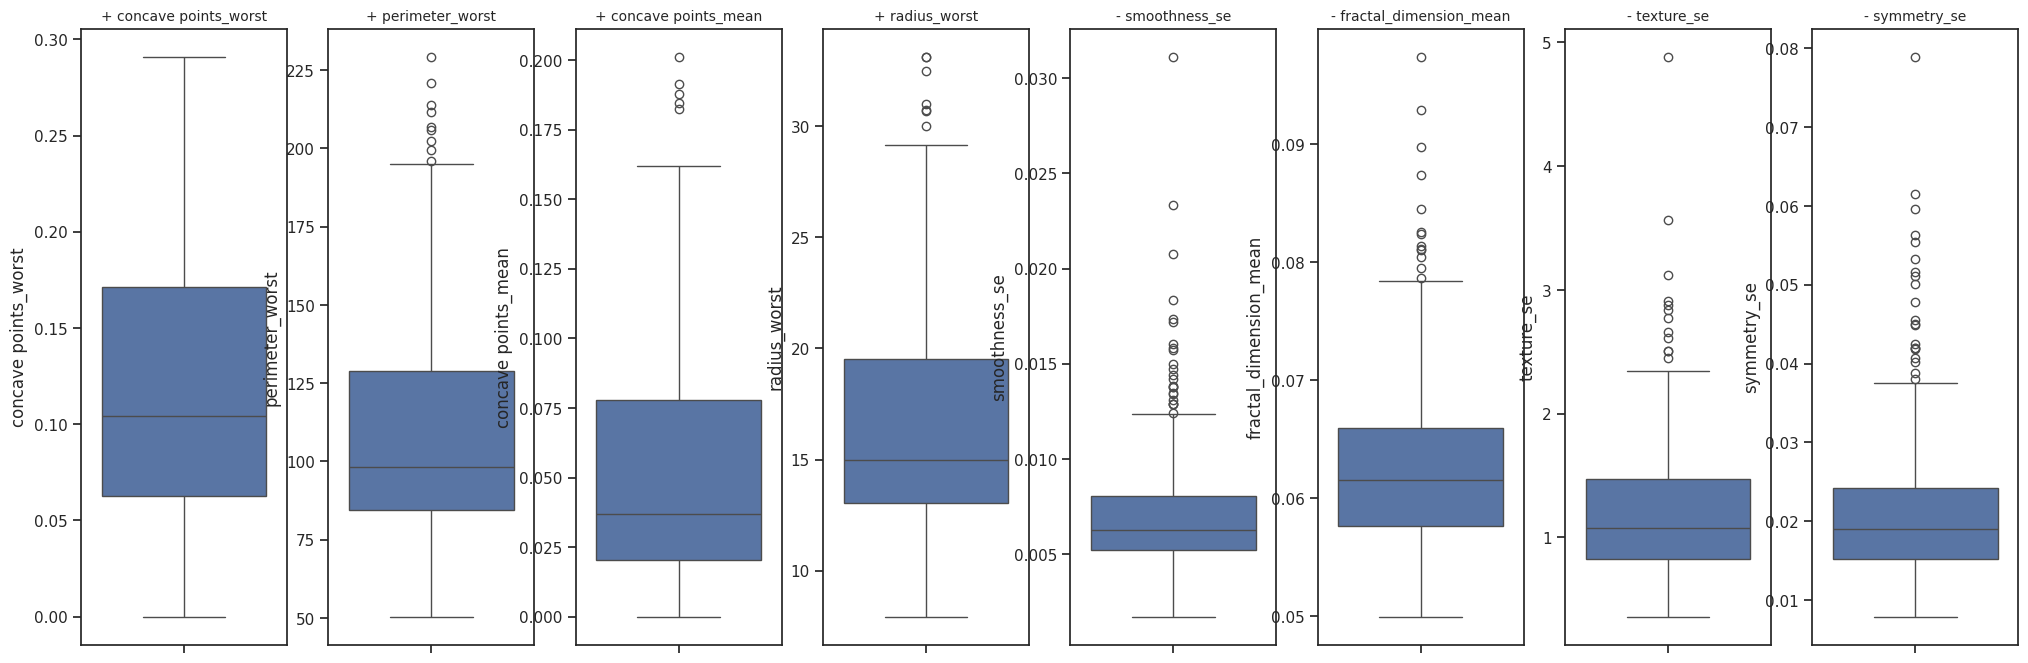

In [ ]:
f, ax = plt.subplots(ncols= 8, figsize=(25,8))

sns.boxplot(df_strade2["concave points_worst"],ax=ax[0])
ax[0].set_title("+ concave points_worst", fontsize=10)

sns.boxplot(df_strade2["perimeter_worst"],ax=ax[1])
ax[1].set_title("+ perimeter_worst", fontsize=10)

sns.boxplot(df_strade2["concave points_mean"],ax=ax[2])
ax[2].set_title("+ concave points_mean", fontsize=10)

sns.boxplot(df_strade2["radius_worst"],ax=ax[3])
ax[3].set_title("+ radius_worst", fontsize=10)

sns.boxplot(df_strade2["smoothness_se"],ax=ax[4])
ax[4].set_title("- smoothness_se", fontsize=10)

sns.boxplot(df_strade2["fractal_dimension_mean"],ax=ax[5])
ax[5].set_title("- fractal_dimension_mean", fontsize=10)

sns.boxplot(df_strade2["texture_se"],ax=ax[6])
ax[6].set_title("- texture_se", fontsize=10)

sns.boxplot(df_strade2["symmetry_se"],ax=ax[7])
ax[7].set_title("- symmetry_se", fontsize=10)

### **Filter for each columns in df_strade2**

In [ ]:
for column in columns_top8:
    Q1 = df_strade2[column].quantile(0.25)
    Q3 = df_strade2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Lọc
    df_strade2= df_strade2[(df_strade2[column] > lower_bound) & (df_strade2[column] < upper_bound)]

In [ ]:
# Review df_strade2
df_strade2

concave points_worst  perimeter_worst  concave points_mean  radius_worst  \
1                 0.18600           158.80             0.070170         24.99   
2                 0.24300           152.50             0.127900         23.57   
4                 0.16250           152.20             0.104300         22.54   
5                 0.17410           103.40             0.080890         15.47   
6                 0.19320           153.20             0.074000         22.88   
..                    ...              ...                  ...           ...   
420               0.06664            86.43             0.014280         13.07   
421               0.11080           114.10             0.063000         16.46   
422               0.11050            81.93             0.044970         12.64   
423               0.14070           101.40             0.048120         15.14   
425               0.02579            69.92             0.005159         11.11   

     smoothness_se  fractal_dimension_mean  texture_se  symmetry_se  diagnosis  
1         0.005225                 0.05667      0.7339      0.01389          1  
2         0.006150                 0.05999      0.7869      0.02250          1  
4         0.011490                 0.05883      0.7813      0.01756          1  
5         0.007510                 0.07613      0.8902      0.02165          1  
6         0.004314                 0.05742      0.7732      0.01369          1  
..             ...                     ...         ...          ...        ...  
420       0.007278                 0.06267      1.4400      0.01868          0  
421       0.009976                 0.07406      1.5110      0.02653          0  
422       0.005884                 0.06320      0.7339      0.01848          0  
423       0.003980                 0.06181      0.8950      0.01581          0  
425       0.005724                 0.06439      1.3410      0.01445          0  

[349 rows x 9 columns]

### **Review 8 column after removing**

Text(0.5, 1.0, '- symmetry_se')

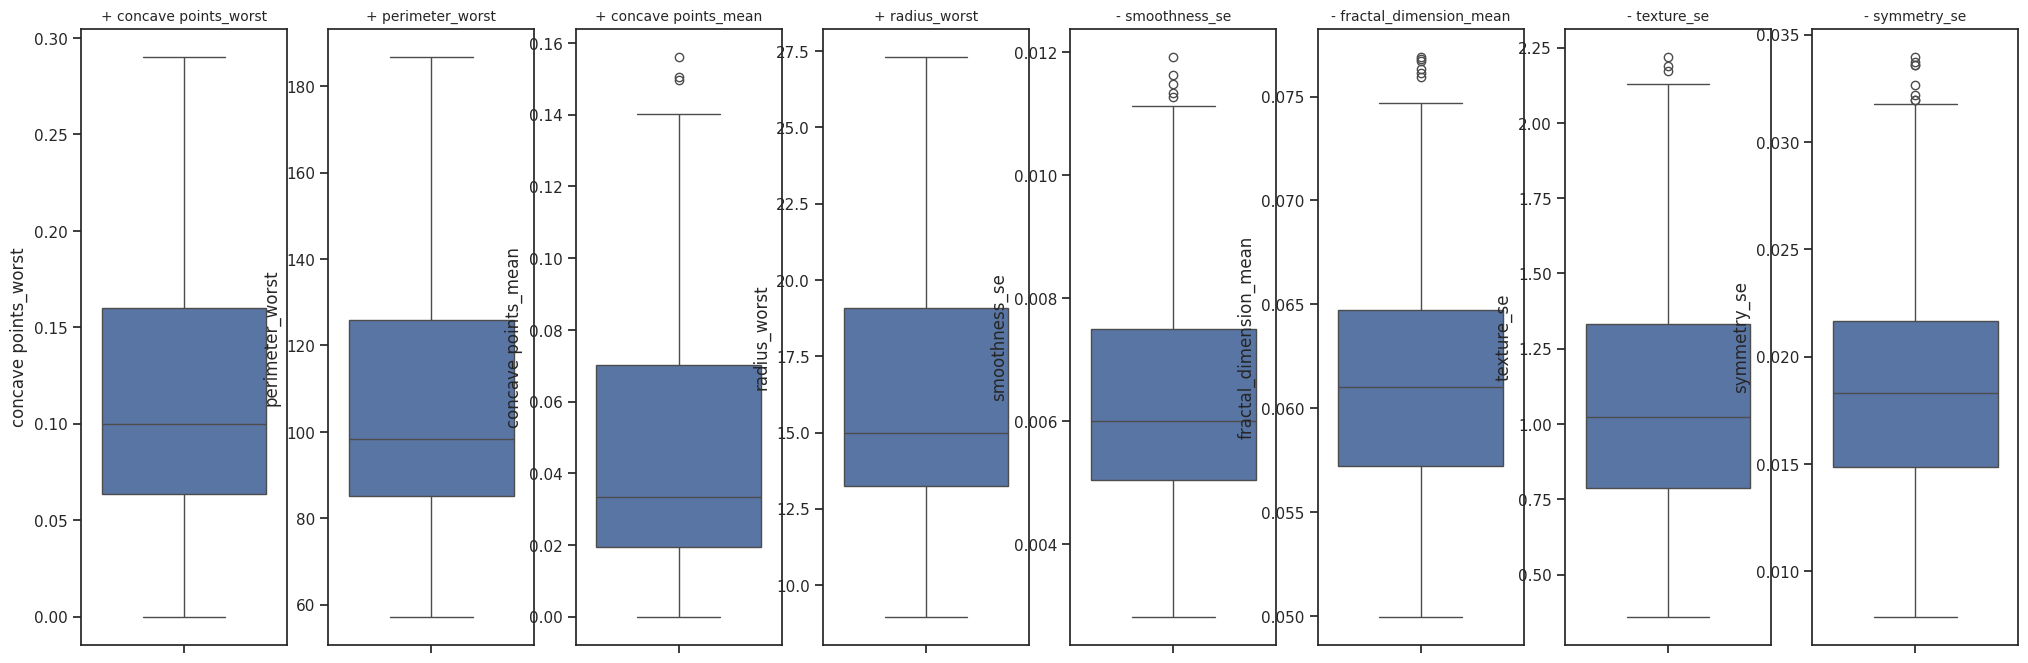

In [ ]:
f, ax = plt.subplots(ncols= 8, figsize=(25,8))

sns.boxplot(df_strade2["concave points_worst"],ax=ax[0])
ax[0].set_title("+ concave points_worst", fontsize=10)

sns.boxplot(df_strade2["perimeter_worst"],ax=ax[1])
ax[1].set_title("+ perimeter_worst", fontsize=10)

sns.boxplot(df_strade2["concave points_mean"],ax=ax[2])
ax[2].set_title("+ concave points_mean", fontsize=10)

sns.boxplot(df_strade2["radius_worst"],ax=ax[3])
ax[3].set_title("+ radius_worst", fontsize=10)

sns.boxplot(df_strade2["smoothness_se"],ax=ax[4])
ax[4].set_title("- smoothness_se", fontsize=10)

sns.boxplot(df_strade2["fractal_dimension_mean"],ax=ax[5])
ax[5].set_title("- fractal_dimension_mean", fontsize=10)

sns.boxplot(df_strade2["texture_se"],ax=ax[6])
ax[6].set_title("- texture_se", fontsize=10)

sns.boxplot(df_strade2["symmetry_se"],ax=ax[7])
ax[7].set_title("- symmetry_se", fontsize=10)

# **3. Create Train / Test dataset and train ML models**

## **A. For straderagy 1: df_strade1**

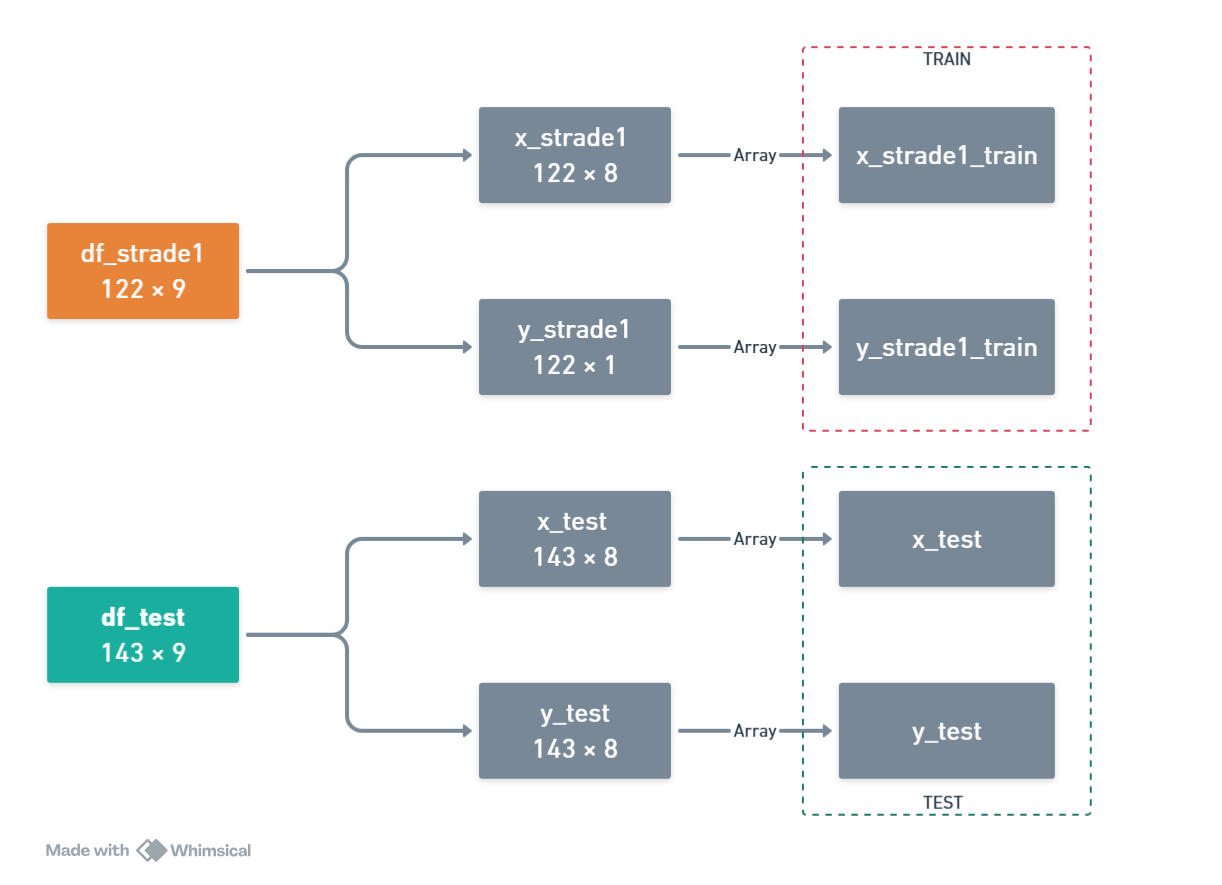

### **Review mức độ phân bố các phần tử trong cột Label của df_strade1**

<Axes: ylabel='count'>

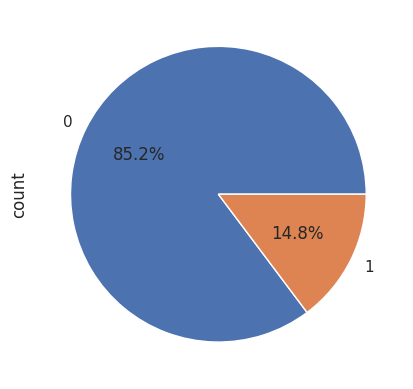

In [ ]:
# Review cột Label có bị chênh lệch tỉ lệ phân bố só lượng nhiều không
df_strade1["diagnosis"].value_counts().plot(kind='pie', autopct='%.1f%%')

### **Tạo tập train và Test**

#### Tạo tập train từ df_strade1

In [ ]:
# Tạo cột mục tiêu và cột feature cho tập train

x_strade1 = df_strade1.drop('diagnosis', axis=1)
y_strade1 = df_strade1['diagnosis']

In [ ]:
x_strade1

concave points_worst  perimeter_worst  concave points_mean  radius_worst  \
13                0.11190           112.00              0.05364         16.84   
19                0.12880            99.70              0.04781         15.11   
20                0.07283            96.09              0.03110         14.50   
36                0.14470           116.20              0.05598         15.89   
40                0.11120           102.50              0.02031         15.93   
..                    ...              ...                  ...           ...   
413               0.13080           110.20              0.03876         16.76   
415               0.08263            85.09              0.02179         13.05   
418               0.08224            88.12              0.02402         13.65   
422               0.11050            81.93              0.04497         12.64   
423               0.14070           101.40              0.04812         15.14   

     smoothness_se  fractal_dimension_mean  texture_se  symmetry_se  
13        0.009769                 0.05338      1.0780      0.02981  
19        0.008462                 0.05766      0.7886      0.01980  
20        0.004097                 0.06811      0.7477      0.01678  
36        0.005878                 0.06125      1.0190      0.02028  
40        0.003280                 0.05587      0.8265      0.01380  
..             ...                     ...         ...          ...  
413       0.004449                 0.05913      1.3360      0.01906  
415       0.009895                 0.06290      1.2030      0.02258  
418       0.006131                 0.06275      0.6457      0.01713  
422       0.005884                 0.06320      0.7339      0.01848  
423       0.003980                 0.06181      0.8950      0.01581  

[122 rows x 8 columns]

#### Tạo tập test từ df_test

In [ ]:
df_test

concave points_worst  perimeter_worst  concave points_mean  radius_worst  \
426               0.09310            81.41              0.02218        12.130   
427               0.07485            83.69              0.01404        12.760   
428               0.04044            74.35              0.01370        11.680   
429               0.03612            88.87              0.01835        13.820   
430               0.24750           125.40              0.09711        16.350   
..                    ...              ...                  ...           ...   
564               0.22160           166.10              0.13890        25.450   
565               0.16280           155.00              0.09791        23.690   
566               0.14180           126.70              0.05302        18.980   
567               0.26500           184.60              0.15200        25.740   
568               0.00000            59.16              0.00000         9.456   

     smoothness_se  fractal_dimension_mean  texture_se  symmetry_se  diagnosis  
426       0.007364                 0.06915      1.1270      0.02161          0  
427       0.006543                 0.05977      1.6210      0.01844          0  
428       0.005883                 0.06148      0.9671      0.02009          0  
429       0.007337                 0.05544      0.8836      0.01940          0  
430       0.006965                 0.06898      0.8749      0.01499          1  
..             ...                     ...         ...          ...        ...  
564       0.010300                 0.05623      1.2560      0.01114          1  
565       0.005769                 0.05533      2.4630      0.01898          1  
566       0.005903                 0.05648      1.0750      0.01318          1  
567       0.006522                 0.07016      1.5950      0.02324          1  
568       0.007189                 0.05884      1.4280      0.02676          0  

[143 rows x 9 columns]

In [ ]:
# Tạo cột mục tiêu và cột feature cho tập train

x_test = df_test.drop('diagnosis', axis=1)
y_test = df_test['diagnosis']

#### Chuyển dữ liệu train và test sang dạng Array

In [ ]:
# Chuyển dữ liệu train và test sang định dạng Array để feeading cho mô hình classification
x_strade1_train = x_strade1.values
x_test = x_test.values
y_strade1_train = y_strade1.values
y_test = y_test.values

### **Use Classification Models**

#### **Logistic Model**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model_logistic = LogisticRegression()

In [ ]:
# Train Model Logistic
model_logistic.fit(x_strade1_train, y_strade1_train)

LogisticRegression()

In [ ]:
# Gọi y_pred bằng x_strade1_test dựa trên model Logisstic
y_strade1_pred_logis = model_logistic.predict(x_test)

In [ ]:
# Validate và plot
print(classification_report(y_test, y_strade1_pred_logis))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       108
           1       0.87      0.94      0.90        35

    accuracy                           0.95       143
   macro avg       0.92      0.95      0.94       143
weighted avg       0.95      0.95      0.95       143



In [ ]:
# Print accuracy
strade1_logis_acc=accuracy_score(y_test, y_strade1_pred_logis)

In [ ]:
# print F1 score
strade1_logis_f1=f1_score(y_test, y_strade1_pred_logis)

#### **Xgboost Model**

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay

In [ ]:
model_xg= XGBClassifier()

In [ ]:
# Train cho model Xgboost
model_xg.fit(x_strade1_train, y_strade1_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Gọi Y-pred
y_strade1_pred_xgb = model_xg.predict(x_test)

In [ ]:
# Validate và plot
print(classification_report(y_test, y_strade1_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.83      0.83      0.83        35

    accuracy                           0.92       143
   macro avg       0.89      0.89      0.89       143
weighted avg       0.92      0.92      0.92       143



In [ ]:
# print accuracy
strade1_xgb_acc=accuracy_score(y_test, y_strade1_pred_xgb)

In [ ]:
# print f1 score
strade1_xgb_f1=f1_score(y_test, y_strade1_pred_xgb)

#### **SVM Model**

In [ ]:
from sklearn import svm

In [ ]:
# Gọi model
model_svm= svm.SVC()

In [ ]:
# Train SVM model
model_svm.fit(x_strade1_train, y_strade1_train)

SVC()

In [ ]:
# Gọi y_pred
y_strade1_pred_svm = model_svm.predict(x_test)

In [ ]:
# Validate và plot
print(classification_report(y_test, y_strade1_pred_svm))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       108
           1       0.00      0.00      0.00        35

    accuracy                           0.76       143
   macro avg       0.38      0.50      0.43       143
weighted avg       0.57      0.76      0.65       143



In [ ]:
# print accuracy
strade1_svm_acc=accuracy_score(y_test, y_strade1_pred_svm)

In [ ]:
# print f1 score
strade1_svm_f1=f1_score(y_test, y_strade1_pred_svm)

#### **Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Gọi Model
model_dt= DecisionTreeClassifier(max_depth=20)

In [ ]:
# train cho model
model_dt.fit(x_strade1_train, y_strade1_train)

DecisionTreeClassifier(max_depth=20)

In [ ]:
# Gọi y_pred
y_strade1_pred_dt = model_dt.predict(x_test)

In [ ]:
# Validate và plot
print(classification_report(y_test, y_strade1_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91       108
           1       0.66      0.94      0.78        35

    accuracy                           0.87       143
   macro avg       0.82      0.89      0.84       143
weighted avg       0.90      0.87      0.87       143



In [ ]:
# print accuracy
strade1_dt_acc=accuracy_score(y_test, y_strade1_pred_dt)

In [ ]:
# print f1 score
strade1_dt_f1=f1_score(y_test, y_strade1_pred_dt)

#### **Catboost Model**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.1 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay

In [ ]:
# Gọi model
model_cb= CatBoostClassifier()

In [ ]:
# Train cho model
model_cb.fit(x_strade1_train, y_strade1_train)

Learning rate set to 0.004196
0:	learn: 0.6877229	total: 47.7ms	remaining: 47.6s
1:	learn: 0.6832579	total: 49.1ms	remaining: 24.5s
2:	learn: 0.6785011	total: 50.5ms	remaining: 16.8s
3:	learn: 0.6732022	total: 51.9ms	remaining: 12.9s
4:	learn: 0.6691814	total: 53ms	remaining: 10.6s
5:	learn: 0.6654870	total: 54.4ms	remaining: 9.01s
6:	learn: 0.6603722	total: 55.8ms	remaining: 7.91s
7:	learn: 0.6557153	total: 57.1ms	remaining: 7.08s
8:	learn: 0.6519452	total: 58.5ms	remaining: 6.44s
9:	learn: 0.6484180	total: 59.8ms	remaining: 5.92s
10:	learn: 0.6436460	total: 61.2ms	remaining: 5.5s
11:	learn: 0.6396251	total: 62.5ms	remaining: 5.15s
12:	learn: 0.6348216	total: 63.9ms	remaining: 4.85s
13:	learn: 0.6305386	total: 65.2ms	remaining: 4.59s
14:	learn: 0.6262516	total: 66.5ms	remaining: 4.37s
15:	learn: 0.6226241	total: 67.9ms	remaining: 4.18s
16:	learn: 0.6185960	total: 69.2ms	remaining: 4s
17:	learn: 0.6140487	total: 70.6ms	remaining: 3.85s
18:	learn: 0.6098274	total: 71.9ms	remaining: 3.71

In [ ]:
# Gọi y_pred
y_strade1_pred_cb = model_cb.predict(x_test)

In [ ]:
# Validate và plot
print(classification_report(y_test, y_strade1_pred_cb))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       108
           1       0.93      0.77      0.84        35

    accuracy                           0.93       143
   macro avg       0.93      0.88      0.90       143
weighted avg       0.93      0.93      0.93       143



In [ ]:
# print accuracy
strade1_cb_acc=accuracy_score(y_test, y_strade1_pred_cb)

In [ ]:
# print f1 score
strade1_cb_f1=f1_score(y_test, y_strade1_pred_cb)

#### **RandomForest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Gọi model
model_rf= RandomForestClassifier()

In [ ]:
# Train model
model_rf.fit(x_strade1_train, y_strade1_train)

RandomForestClassifier()

In [ ]:
# gọi y_pred
y_strade1_pred_rf = model_rf.predict(x_test)

In [ ]:
# validate và plot
print(classification_report(y_test, y_strade1_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       108
           1       0.89      0.97      0.93        35

    accuracy                           0.97       143
   macro avg       0.94      0.97      0.95       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
# print accuracy
strade1_rf_acc=accuracy_score(y_test, y_strade1_pred_rf)

In [ ]:
# print f1 scoreư
strade1_rf_f1=f1_score(y_test, y_strade1_pred_rf)

### **Feature Engineer Principle**

#### **Simple Imputer & Standard Scaler**

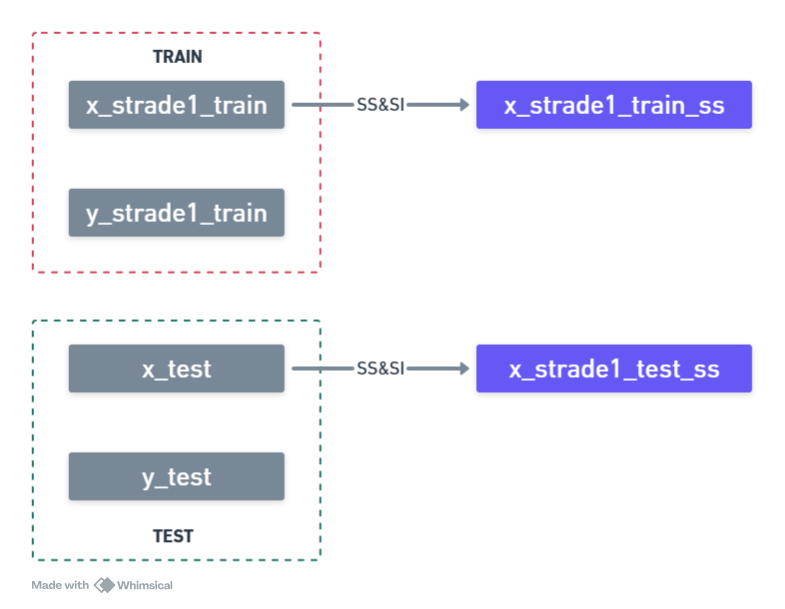

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# Gọi Pipeline
pipe = Pipeline([ ('imp', SimpleImputer()), ('ss', StandardScaler())])
# Cho Pipeline học dữu liệu x_strade1_train
pipe.fit(x_strade1_train)
# Tạo x_strade1_train_ss và x_strade1_test_ss
x_strade1_train_ss = pipe.transform(x_strade1_train)
x_strade1_test_ss = pipe.transform(x_test)

##### **Logistic Model**

In [ ]:
model_logistic_ss = LogisticRegression()
# Train Model Logistic
model_logistic_ss.fit(x_strade1_train_ss, y_strade1_train)

LogisticRegression()

In [ ]:
# Gọi y_pred bằng x_strade1_test dựa trên model Logisstic
y_strade1_pred_logis_ss = model_logistic_ss.predict(x_strade1_test_ss)
# Validate
print(classification_report(y_test, y_strade1_pred_logis_ss))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       108
           1       0.77      0.97      0.86        35

    accuracy                           0.92       143
   macro avg       0.88      0.94      0.90       143
weighted avg       0.94      0.92      0.93       143



In [ ]:
# print accuracy
strade1_logis_ss_acc=accuracy_score(y_test, y_strade1_pred_logis_ss)

In [ ]:
# print f1 score
strade1_logis_ss_f1=f1_score(y_test, y_strade1_pred_logis_ss)

##### **RandomForrest Model**

In [ ]:
model_rf_ss= RandomForestClassifier()
# Train model
model_rf_ss.fit(x_strade1_train_ss, y_strade1_train)
# Gọi y_pred bằng x_strade1_test dựa trên model RF
y_strade1_pred_rf_ss = model_rf_ss.predict(x_strade1_test_ss)
# Validate
print(classification_report(y_test, y_strade1_pred_rf_ss))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.91      0.89      0.90        35

    accuracy                           0.95       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.95      0.95      0.95       143



In [ ]:
# print accuracy
strade1_rf_ss_acc=accuracy_score(y_test, y_strade1_pred_rf_ss)

In [ ]:
# print f1 score
strade1_rf_ss_f1=f1_score(y_test, y_strade1_pred_rf_ss)

##### **XGboost Model**

In [ ]:
model_xg_ss= XGBClassifier()
# Train model
model_xg_ss.fit(x_strade1_train_ss, y_strade1_train)
# Gọi y_pred bằng x_strade1_test dựa trên model xgboost
y_strade1_pred_xg_ss = model_xg_ss.predict(x_strade1_test_ss)
# Validate
print(classification_report(y_test, y_strade1_pred_xg_ss))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.83      0.83      0.83        35

    accuracy                           0.92       143
   macro avg       0.89      0.89      0.89       143
weighted avg       0.92      0.92      0.92       143



In [ ]:
# print accuracy
strade1_xg_ss_acc=accuracy_score(y_test, y_strade1_pred_xg_ss)

In [ ]:
# print f1 score
strade1_xg_ss_f1=f1_score(y_test, y_strade1_pred_xg_ss)

#### **Over/Under Sampling**

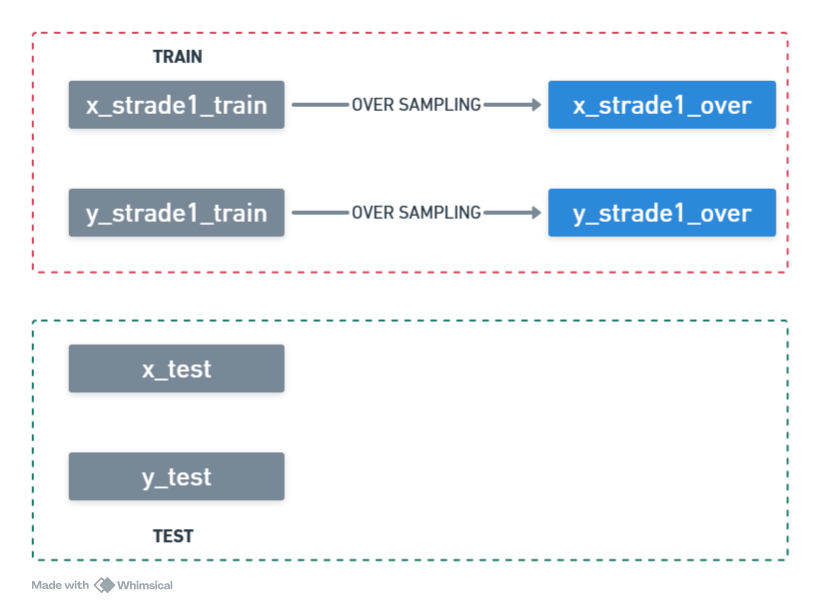

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [ ]:
# Define SMOTE and under-sampling strategy
smote = SMOTE(sampling_strategy=0.8, random_state=42)  # Over-sample

# Create a pipeline
pipeline_over = Pipeline([
    ('smote', smote),
    ])

In [ ]:
x_strade1_over, y_strade1_over = pipeline_over.fit_resample(x_strade1_train, y_strade1_train)

In [ ]:
# Chuyển y_strade1_over thành dạng dataframe
y_strade1_over_df = pd.DataFrame(y_strade1_over)

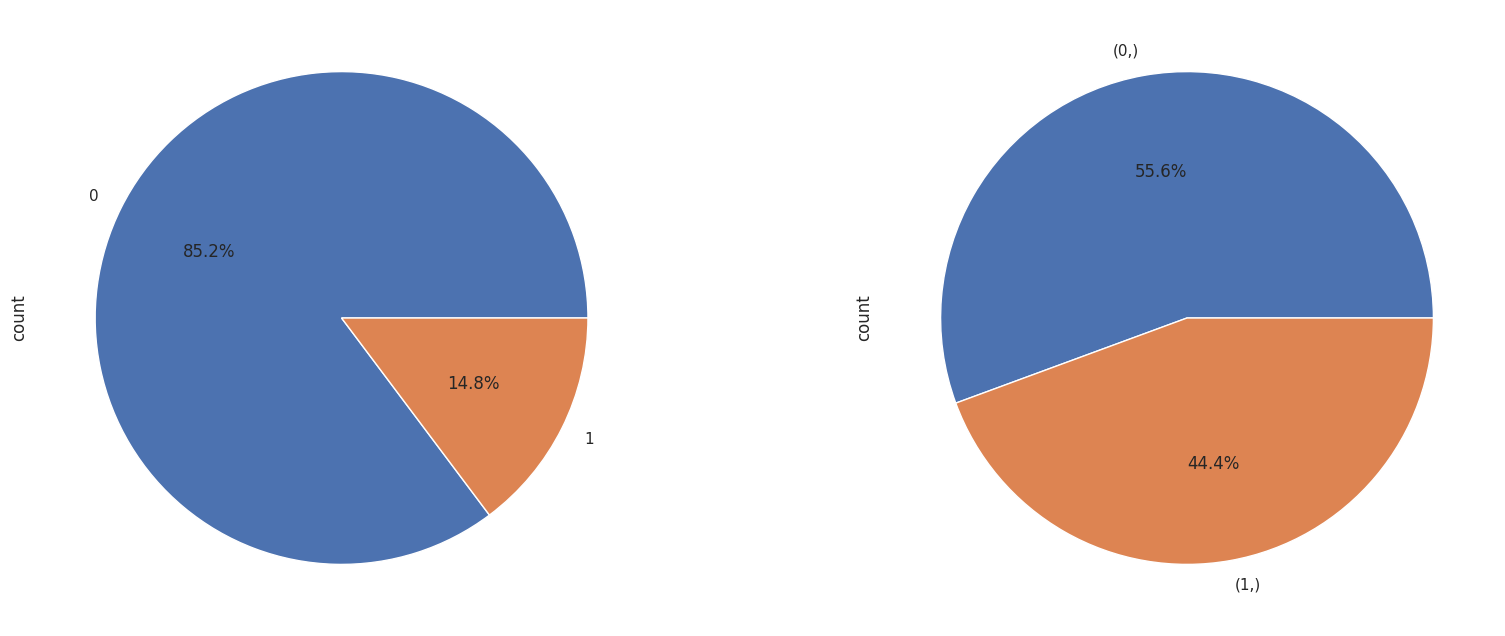

In [ ]:
# Compare between before and after the change of density parameter in both Labels
f, ax = plt.subplots(ncols= 2, figsize=(20,8))

y_strade1.value_counts().plot(kind='pie', autopct='%.1f%%',ax=ax[0])
y_strade1_over_df.value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[1])
plt.show()

##### **Logistic Model**

In [ ]:
model_logistic_over = LogisticRegression()
# Train Model Logistic
model_logistic_over.fit(x_strade1_over, y_strade1_over)
# Gọi y_pred bằng x_strade1_test dựa trên model Logisstic
y_strade1_pred_logis_over = model_logistic_over.predict(x_test)
#validate
print(classification_report(y_test, y_strade1_pred_logis_over))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88       108
           1       0.59      1.00      0.74        35

    accuracy                           0.83       143
   macro avg       0.80      0.89      0.81       143
weighted avg       0.90      0.83      0.84       143



In [ ]:
# print accuracy
strade1_logis_over_acc=accuracy_score(y_test, y_strade1_pred_logis_over)

In [ ]:
# print f1 score
strade1_logis_over_f1=f1_score(y_test, y_strade1_pred_logis_over)

##### **RandomForest Model**

In [ ]:
model_rf_over = RandomForestClassifier()
# Train Model RandomForestClassifier
model_rf_over.fit(x_strade1_over, y_strade1_over)
# Gọi y_pred bằng x_strade1_test dựa trên model rf
y_strade1_pred_rf_over = model_rf_over.predict(x_test)
#validate
print(classification_report(y_test, y_strade1_pred_rf_over))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       108
           1       0.77      0.94      0.85        35

    accuracy                           0.92       143
   macro avg       0.87      0.93      0.89       143
weighted avg       0.93      0.92      0.92       143



In [ ]:
# print accuracy
strade1_rf_over_acc=accuracy_score(y_test, y_strade1_pred_rf_over)

In [ ]:
# print f1 score
strade1_rf_over_f1=f1_score(y_test, y_strade1_pred_rf_over)

##### **Xgboost Model**

In [ ]:
model_xg_over = XGBClassifier()
# Train Model XGBClassifier
model_xg_over.fit(x_strade1_over, y_strade1_over)
# Gọi y_pred bằng x_strade1_test dựa trên model xgboost
y_strade1_pred_xg_over = model_xg_over.predict(x_test)
#validate
print(classification_report(y_test, y_strade1_pred_xg_over))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       108
           1       0.71      0.83      0.76        35

    accuracy                           0.87       143
   macro avg       0.82      0.86      0.84       143
weighted avg       0.88      0.87      0.88       143



In [ ]:
# print accuracy
strade1_xg_over_acc=accuracy_score(y_test, y_strade1_pred_xg_over)

In [ ]:
# print f1 score
strade1_xg_over_f1=f1_score(y_test, y_strade1_pred_xg_over)

## **B. For straderagy 2: df_strade2**

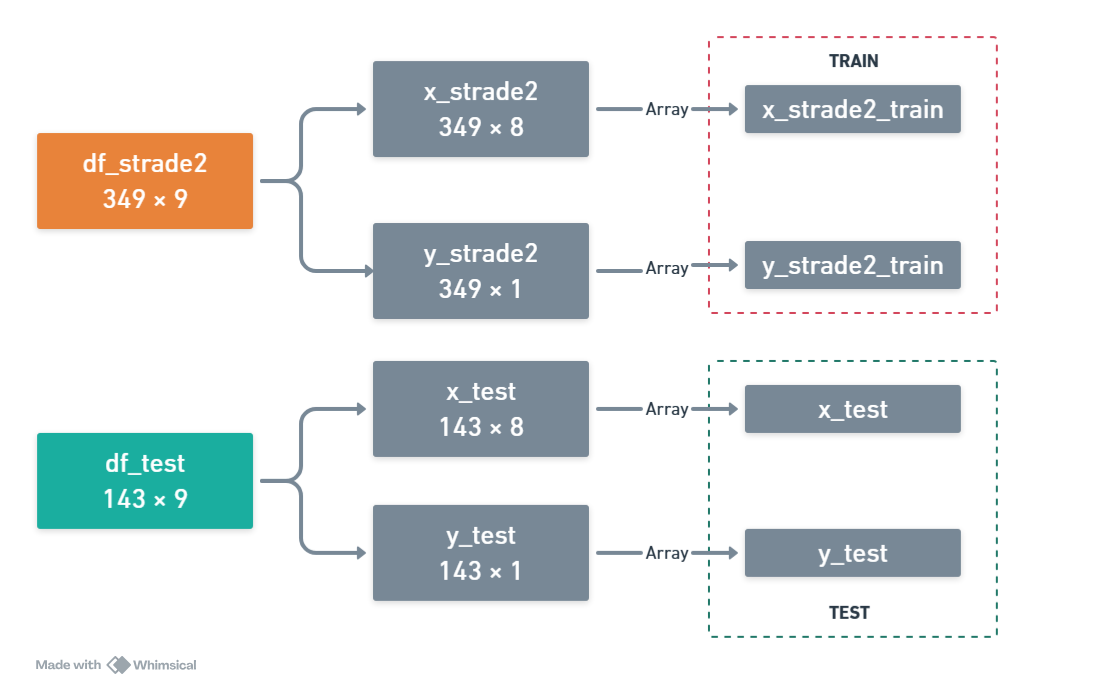

In [ ]:
df_strade2

concave points_worst  perimeter_worst  concave points_mean  radius_worst  \
1                 0.18600           158.80             0.070170         24.99   
2                 0.24300           152.50             0.127900         23.57   
4                 0.16250           152.20             0.104300         22.54   
5                 0.17410           103.40             0.080890         15.47   
6                 0.19320           153.20             0.074000         22.88   
..                    ...              ...                  ...           ...   
420               0.06664            86.43             0.014280         13.07   
421               0.11080           114.10             0.063000         16.46   
422               0.11050            81.93             0.044970         12.64   
423               0.14070           101.40             0.048120         15.14   
425               0.02579            69.92             0.005159         11.11   

     smoothness_se  fractal_dimension_mean  texture_se  symmetry_se  diagnosis  
1         0.005225                 0.05667      0.7339      0.01389          1  
2         0.006150                 0.05999      0.7869      0.02250          1  
4         0.011490                 0.05883      0.7813      0.01756          1  
5         0.007510                 0.07613      0.8902      0.02165          1  
6         0.004314                 0.05742      0.7732      0.01369          1  
..             ...                     ...         ...          ...        ...  
420       0.007278                 0.06267      1.4400      0.01868          0  
421       0.009976                 0.07406      1.5110      0.02653          0  
422       0.005884                 0.06320      0.7339      0.01848          0  
423       0.003980                 0.06181      0.8950      0.01581          0  
425       0.005724                 0.06439      1.3410      0.01445          0  

[349 rows x 9 columns]

### **Tạo tập train từ DF_Strade2**

In [ ]:
# Tạo cột mục tiêu và cột feature cho tập train

x_strade2 = df_strade2.drop('diagnosis', axis=1)
y_strade2 = df_strade2['diagnosis']

In [ ]:
x_strade2

concave points_worst  perimeter_worst  concave points_mean  radius_worst  \
1                 0.18600           158.80             0.070170         24.99   
2                 0.24300           152.50             0.127900         23.57   
4                 0.16250           152.20             0.104300         22.54   
5                 0.17410           103.40             0.080890         15.47   
6                 0.19320           153.20             0.074000         22.88   
..                    ...              ...                  ...           ...   
420               0.06664            86.43             0.014280         13.07   
421               0.11080           114.10             0.063000         16.46   
422               0.11050            81.93             0.044970         12.64   
423               0.14070           101.40             0.048120         15.14   
425               0.02579            69.92             0.005159         11.11   

     smoothness_se  fractal_dimension_mean  texture_se  symmetry_se  
1         0.005225                 0.05667      0.7339      0.01389  
2         0.006150                 0.05999      0.7869      0.02250  
4         0.011490                 0.05883      0.7813      0.01756  
5         0.007510                 0.07613      0.8902      0.02165  
6         0.004314                 0.05742      0.7732      0.01369  
..             ...                     ...         ...          ...  
420       0.007278                 0.06267      1.4400      0.01868  
421       0.009976                 0.07406      1.5110      0.02653  
422       0.005884                 0.06320      0.7339      0.01848  
423       0.003980                 0.06181      0.8950      0.01581  
425       0.005724                 0.06439      1.3410      0.01445  

[349 rows x 8 columns]

#### Chuyển dữ liệu train sang dạng Array

In [ ]:
# Chuyển dữ liệu train và test sang định dạng Array để feeading cho mô hình classification
# riêng x_test và y_test vẫn là từ df ban đầu và đã được khởi tạo từ bước trước
x_strade2_train = x_strade2.values

y_strade2_train = y_strade2.values

### **Use Classification Models**

#### **Logistic Model**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model2_logistic = LogisticRegression()

In [ ]:
# Train Model Logistic
model2_logistic.fit(x_strade2_train, y_strade2_train)

LogisticRegression()

In [ ]:
# Gọi y_pred bằng x_strade1_test dựa trên model Logisstic
y_strade2_pred_logis = model2_logistic.predict(x_test)

In [ ]:
# Validate và plot
print(classification_report(y_test, y_strade2_pred_logis))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       108
           1       0.85      1.00      0.92        35

    accuracy                           0.96       143
   macro avg       0.93      0.97      0.95       143
weighted avg       0.96      0.96      0.96       143



In [ ]:
# Print accuracy
strade2_logis_acc=accuracy_score(y_test, y_strade2_pred_logis)

In [ ]:
# print f1 score
strade2_logis_f1=f1_score(y_test, y_strade2_pred_logis)

#### **Xgboost Model**

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay

In [ ]:
model2_xg= XGBClassifier()

In [ ]:
# Train cho model Xgboost
model2_xg.fit(x_strade2_train, y_strade2_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Gọi Y-pred và Y_prod
y_strade2_pred_xgb = model2_xg.predict(x_test)
y_strade2_prod_xgb = model2_xg.predict_proba(x_test)

In [ ]:
# Validate và plot
print(classification_report(y_test, y_strade2_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       108
           1       0.89      0.97      0.93        35

    accuracy                           0.97       143
   macro avg       0.94      0.97      0.95       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
# print accuracy
strade2_xgb_acc=accuracy_score(y_test, y_strade2_pred_xgb)

In [ ]:
# print f1 score
strade2_xgb_f1=f1_score(y_test, y_strade2_pred_xgb)

#### **SVM Model**

In [ ]:
from sklearn import svm

In [ ]:
# Gọi model
model2_svm= svm.SVC()

In [ ]:
# Train SVM model
model2_svm.fit(x_strade2_train, y_strade2_train)

SVC()

In [ ]:
# Gọi y_pred
y_strade2_pred_svm = model2_svm.predict(x_test)

In [ ]:
# Validate và plot
print(classification_report(y_test, y_strade2_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       108
           1       0.85      0.94      0.89        35

    accuracy                           0.94       143
   macro avg       0.91      0.94      0.93       143
weighted avg       0.95      0.94      0.95       143



In [ ]:
# print accuracy
strade2_svm_acc=accuracy_score(y_test, y_strade2_pred_svm)

In [ ]:
# print f1 score
strade2_svm_f1=f1_score(y_test, y_strade2_pred_svm)

#### **Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Gọi Model
model2_dt= DecisionTreeClassifier(max_depth=20)

In [ ]:
# train cho model
model2_dt.fit(x_strade2_train, y_strade2_train)

DecisionTreeClassifier(max_depth=20)

In [ ]:
# Gọi y_pred
y_strade2_pred_dt = model2_dt.predict(x_test)

In [ ]:
# Validate và plot
print(classification_report(y_test, y_strade2_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       108
           1       0.75      0.94      0.84        35

    accuracy                           0.91       143
   macro avg       0.86      0.92      0.89       143
weighted avg       0.92      0.91      0.91       143



In [ ]:
# print accuracy
strade2_dt_acc=accuracy_score(y_test, y_strade2_pred_dt)

In [ ]:
# print f1 score
strade2_dt_f1=f1_score(y_test, y_strade2_pred_dt)

#### **Catboost Model**

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay

In [ ]:
# Gọi model
model2_cb= CatBoostClassifier()

In [ ]:
# Train cho model
model2_cb.fit(x_strade2_train, y_strade2_train)

Learning rate set to 0.006572
0:	learn: 0.6827795	total: 3.58ms	remaining: 3.57s
1:	learn: 0.6720793	total: 6.37ms	remaining: 3.18s
2:	learn: 0.6619772	total: 8.98ms	remaining: 2.98s
3:	learn: 0.6526792	total: 13.4ms	remaining: 3.34s
4:	learn: 0.6442313	total: 17.9ms	remaining: 3.57s
5:	learn: 0.6350171	total: 20.9ms	remaining: 3.47s
6:	learn: 0.6266586	total: 23.9ms	remaining: 3.39s
7:	learn: 0.6179158	total: 26.5ms	remaining: 3.29s
8:	learn: 0.6106599	total: 31.4ms	remaining: 3.46s
9:	learn: 0.6025585	total: 34.9ms	remaining: 3.46s
10:	learn: 0.5947182	total: 40.3ms	remaining: 3.63s
11:	learn: 0.5864019	total: 44.1ms	remaining: 3.63s
12:	learn: 0.5778169	total: 47.1ms	remaining: 3.57s
13:	learn: 0.5693815	total: 49.9ms	remaining: 3.52s
14:	learn: 0.5620184	total: 52.4ms	remaining: 3.44s
15:	learn: 0.5541937	total: 54.7ms	remaining: 3.37s
16:	learn: 0.5467256	total: 57.7ms	remaining: 3.33s
17:	learn: 0.5394969	total: 59.8ms	remaining: 3.26s
18:	learn: 0.5313806	total: 62.9ms	remaining

In [ ]:
# Gọi y_pred
y_strade2_pred_cb = model2_cb.predict(x_test)

In [ ]:
# Validate và plot
print(classification_report(y_test, y_strade2_pred_cb))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       108
           1       0.90      1.00      0.95        35

    accuracy                           0.97       143
   macro avg       0.95      0.98      0.96       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
# print accuracy
strade2_cb_acc=accuracy_score(y_test, y_strade2_pred_cb)

In [ ]:
# print f1 score
strade2_cb_f1=f1_score(y_test, y_strade2_pred_cb)

#### **RandomForest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Gọi model
model2_rf= RandomForestClassifier()

In [ ]:
# Train model
model2_rf.fit(x_strade2_train, y_strade2_train)

RandomForestClassifier()

In [ ]:
# gọi y_pred
y_strade2_pred_rf = model2_rf.predict(x_test)

In [ ]:
# validate và plot
print(classification_report(y_test, y_strade2_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       108
           1       0.90      1.00      0.95        35

    accuracy                           0.97       143
   macro avg       0.95      0.98      0.96       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
# print accuracy
strade2_rf_acc=accuracy_score(y_test, y_strade2_pred_rf)

In [ ]:
# print f1 score
strade2_rf_f1=f1_score(y_test, y_strade2_pred_rf)

### **Feature Engineer Principle**

#### **Simple Imputer & Standard Scaler**

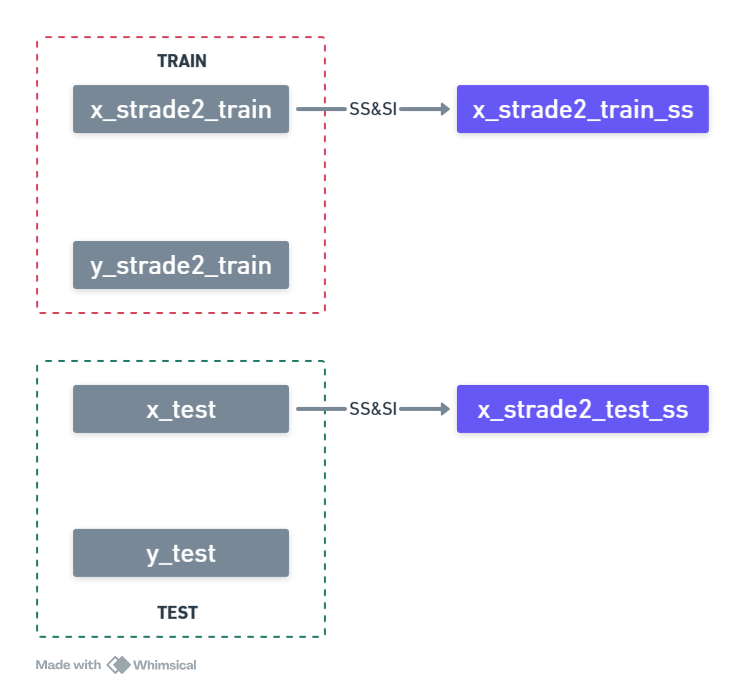

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# Gọi Pipeline
pipe2 = Pipeline([ ('imp', SimpleImputer()), ('ss', StandardScaler())])
# Cho Pipeline học dữu liệu x_strade2_train
pipe2.fit(x_strade2_train)
# Tạo x_strade1_train_ss và x_strade2_test_ss
x_strade2_train_ss = pipe2.transform(x_strade2_train)
x_strade2_test_ss = pipe2.transform(x_test)

##### **Logistic Model**

In [ ]:
model2_logistic_ss = LogisticRegression()
# Train Model Logistic
model2_logistic_ss.fit(x_strade2_train_ss, y_strade2_train)

LogisticRegression()

In [ ]:
# Gọi y_pred bằng x_strade1_test dựa trên model Logisstic
y_strade2_pred_logis_ss = model2_logistic_ss.predict(x_strade2_test_ss)
# Validate
print(classification_report(y_test, y_strade2_pred_logis_ss))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       108
           1       0.81      0.97      0.88        35

    accuracy                           0.94       143
   macro avg       0.90      0.95      0.92       143
weighted avg       0.95      0.94      0.94       143



In [ ]:
# print accuracy
strade2_logis_ss_acc=accuracy_score(y_test, y_strade2_pred_logis_ss)

In [ ]:
# print f1 score
strade2_logis_ss_f1=f1_score(y_test, y_strade2_pred_logis_ss)

##### **RandomForrest Model**

In [ ]:
model2_rf_ss= RandomForestClassifier()
# Train model
model2_rf_ss.fit(x_strade2_train_ss, y_strade2_train)
# Gọi y_pred bằng x_strade1_test dựa trên model RF
y_strade2_pred_rf_ss = model_rf_ss.predict(x_strade2_test_ss)
# Validate
print(classification_report(y_test, y_strade2_pred_rf_ss))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       108
           1       1.00      0.49      0.65        35

    accuracy                           0.87       143
   macro avg       0.93      0.74      0.79       143
weighted avg       0.89      0.87      0.86       143



In [ ]:
# print accuracy
strade2_rf_ss_acc=accuracy_score(y_test, y_strade2_pred_rf_ss)

In [ ]:
# print f1 score
strade2_rf_ss_f1=f1_score(y_test, y_strade2_pred_rf_ss)

##### **XGboost Model**

In [ ]:
model2_xg_ss= XGBClassifier()
# Train model
model2_xg_ss.fit(x_strade2_train_ss, y_strade2_train)
# Gọi y_pred bằng x_strade1_test dựa trên model xgboost
y_strade2_pred_xg_ss = model2_xg_ss.predict(x_strade2_test_ss)
# Validate
print(classification_report(y_test, y_strade2_pred_xg_ss))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       108
           1       0.89      0.97      0.93        35

    accuracy                           0.97       143
   macro avg       0.94      0.97      0.95       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
# print accuracy
strade2_xg_ss_acc=accuracy_score(y_test, y_strade2_pred_xg_ss)

In [ ]:
# print f1 score
strade2_xg_ss_f1=f1_score(y_test, y_strade2_pred_xg_ss)

#### **Over/Under Sampling**

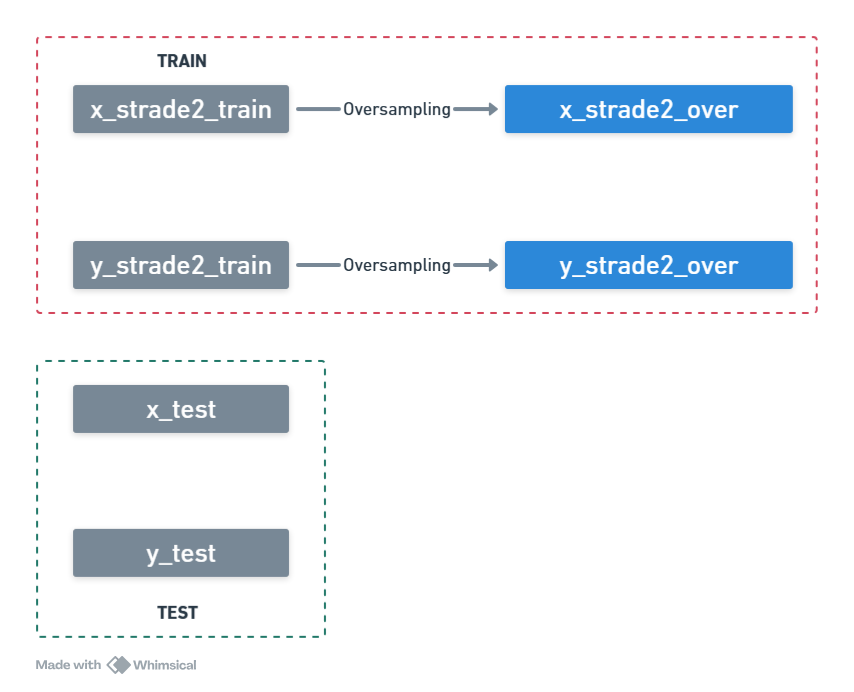

<Axes: ylabel='count'>

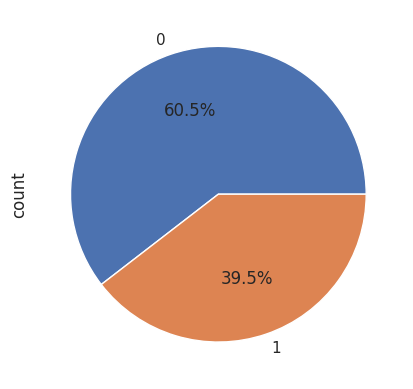

In [ ]:
# Before we start, let's review
y_strade2.value_counts().plot(kind='pie', autopct='%.1f%%')

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [ ]:
# Define SMOTE and under-sampling strategy
smote2 = SMOTE(sampling_strategy=0.8, random_state=42)  # Over-sample

# Create a pipeline
pipeline2_over = Pipeline([
    ('smote', smote2),
    ])

In [ ]:
x_strade2_over, y_strade2_over = pipeline2_over.fit_resample(x_strade2_train, y_strade2_train)

In [ ]:
# Chuyển y_strade2_over thành dạng dataframe
y_strade2_over_df = pd.DataFrame(y_strade2_over)

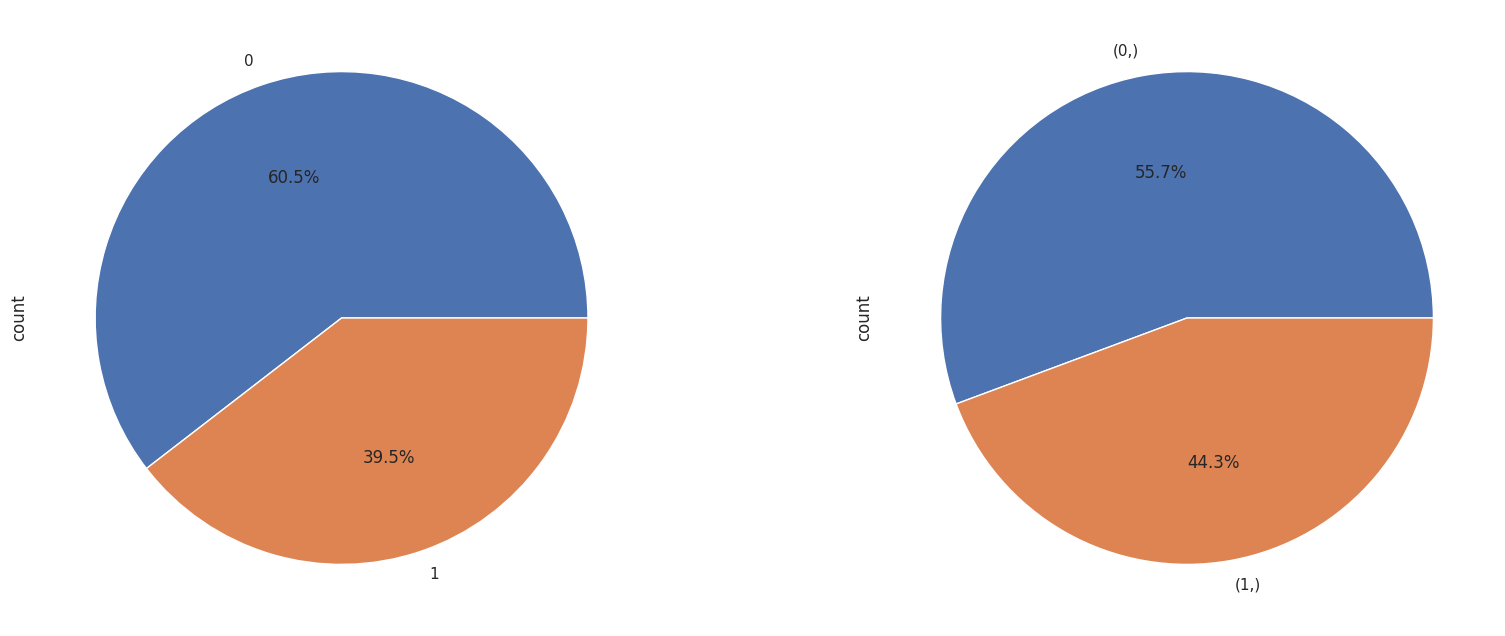

In [ ]:
# Compare between before and after the change of density parameter in both Labels
f, ax = plt.subplots(ncols= 2, figsize=(20,8))

y_strade2.value_counts().plot(kind='pie', autopct='%.1f%%',ax=ax[0])
y_strade2_over_df.value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[1])
plt.show()

In [ ]:
### Notice: Tập Test phải là df gốc

##### **Logistic Model**

In [ ]:
model2_logistic_over = LogisticRegression()
# Train Model Logistic
model2_logistic_over.fit(x_strade2_over, y_strade2_over)
# Gọi y_pred bằng x_strade1_test dựa trên model Logisstic
y_strade2_pred_logis_over = model2_logistic_over.predict(x_test)
#validate
print(classification_report(y_test, y_strade2_pred_logis_over))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       108
           1       0.78      1.00      0.88        35

    accuracy                           0.93       143
   macro avg       0.89      0.95      0.91       143
weighted avg       0.95      0.93      0.93       143



In [ ]:
# print accuracy
strade2_logis_over_acc=accuracy_score(y_test, y_strade2_pred_logis_over)

In [ ]:
# print f1 score
strade2_logis_over_f1=f1_score(y_test, y_strade2_pred_logis_over)

##### **RandomForest Model**

In [ ]:
model2_rf_over = RandomForestClassifier()
# Train Model RandomForestClassifier
model2_rf_over.fit(x_strade2_over, y_strade2_over)
# Gọi y_pred bằng x_strade1_test dựa trên model rf
y_strade2_pred_rf_over = model2_rf_over.predict(x_test)
#validate
print(classification_report(y_test, y_strade2_pred_rf_over))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       108
           1       0.90      1.00      0.95        35

    accuracy                           0.97       143
   macro avg       0.95      0.98      0.96       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
# print accuracy
strade2_rf_over_acc=accuracy_score(y_test, y_strade2_pred_rf_over)

In [ ]:
# print f1 score
strade2_rf_over_f1=f1_score(y_test, y_strade2_pred_rf_over)

##### **Xgboost Model**

In [ ]:
model2_xg_over = XGBClassifier()
# Train Model XGBClassifier
model2_xg_over.fit(x_strade2_over, y_strade2_over)
# Gọi y_pred bằng x_strade1_test dựa trên model xgboost
y_strade2_pred_xg_over = model2_xg_over.predict(x_test)
#validate
print(classification_report(y_test, y_strade2_pred_xg_over))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       108
           1       0.89      0.97      0.93        35

    accuracy                           0.97       143
   macro avg       0.94      0.97      0.95       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
# print accuracy
strade2_xg_over_acc=accuracy_score(y_test, y_strade2_pred_xg_over)

In [ ]:
# print f1 score
strade2_xg_over_f1=f1_score(y_test, y_strade2_pred_xg_over)

# **4. Conclusion with ML algothm**

In [ ]:
# We gonna summary and concluse all ML algothm that we attempt to implement to compare the results
# Firt, make a list contain values of each columns
list_ml = [["PP1","Logistic","none", 100*(strade1_logis_acc), 100*(strade1_logis_f1)],["PP1","XGB","none", 100*(strade1_xgb_acc),100*(strade1_xgb_f1)], ["PP1","SVM","none", 100*(strade1_svm_acc), 100*(strade1_svm_f1)] , ["PP1","DecisionTree","none", (strade1_dt_acc)*100, (strade1_dt_f1)*100], ["PP1","Catboost","none",(strade1_cb_acc)*100, (strade1_cb_f1)*100] , ["PP1","RandomForest","none", 100*(strade1_rf_acc), 100*(strade1_rf_f1)]
 , ["PP1","Logistic","SS&SI", 100*(strade1_logis_ss_acc), 100*(strade1_logis_ss_f1)] , ["PP1","RandomForest","SS&SI", 100*(strade1_rf_ss_acc), 100*(strade1_rf_ss_f1)],
["PP1","XGB","SS&SI", (strade1_xg_ss_acc)*100, (strade1_xg_ss_f1)*100], ["PP1","Logistic","OverSample", 100*(strade1_logis_over_acc), 100*(strade1_logis_over_f1)], ["PP1","RandomForest","OverSample", 100*(strade1_rf_over_acc), 100*(strade1_rf_over_f1)], ["PP1","XGB","OverSample", 100*(strade1_xg_over_acc), 100*(strade1_xg_over_f1)]
, ["PP2","Logistic","none", 100*(strade2_logis_acc), 100*(strade2_logis_f1)],["PP2","XGB","none", (strade2_xgb_acc)*100, (strade2_xgb_f1)*100], ["PP2","SVM","none", (strade2_svm_acc)*100, (strade2_svm_f1)*100] , ["PP2","DecisionTree","none", 100*(strade2_dt_acc), 100*(strade2_dt_f1)], ["PP2","Catboost","none",100*(strade2_cb_acc),100*(strade2_cb_f1)], ["PP2","RandomForest","none", 100*(strade2_rf_acc), 100*(strade2_rf_f1)]
 ,["PP2","Logistic","SS&SI", 100*(strade2_logis_ss_acc), 100*(strade2_logis_ss_f1)], ["PP2","RandomForest","SS&SI", 100*(strade2_rf_ss_acc), 100*(strade2_rf_ss_f1)], ["PP2","XGB","SS&SI", (strade2_xg_ss_acc)*100, (strade2_xg_ss_f1)*100], ["PP2","Logistic","OverSample", 100*(strade2_logis_over_acc), 100*(strade2_logis_over_f1)], ["PP2","RandomForest","OverSample", 100*(strade2_rf_over_acc), 100*(strade2_rf_over_f1)], ["PP2","XGB","OverSample", 100*(strade2_xg_over_acc), 100*(strade2_xg_over_f1)]]


In [ ]:
# Create a dataframe to vizuallize the results after comparing
compare_ml= pd.DataFrame(list_ml, columns=['Stradetagy of Moving Outlier', 'Model Classification',
                                           'Use Feature Engineer Principle', 'Accuracy of Model', 'F1 score of Model']).sort_values(by='F1 score of Model', ascending=False)
# Add "%" symbol at the end of number appear in "Accuracy of Model"
compare_ml['Accuracy of Model'] = compare_ml['Accuracy of Model'].apply(lambda x: f"{round(x, 2)}%")
compare_ml['F1 score of Model'] = compare_ml['F1 score of Model'].apply(lambda x: f"{round(x, 2)}%")

# It's time to enjoy the score rank
display(compare_ml)

Stradetagy of Moving Outlier Model Classification  \
22                          PP2         RandomForest   
17                          PP2         RandomForest   
16                          PP2             Catboost   
23                          PP2                  XGB   
13                          PP2                  XGB   
20                          PP2                  XGB   
5                           PP1         RandomForest   
12                          PP2             Logistic   
0                           PP1             Logistic   
7                           PP1         RandomForest   
14                          PP2                  SVM   
18                          PP2             Logistic   
21                          PP2             Logistic   
6                           PP1             Logistic   
10                          PP1         RandomForest   
4                           PP1             Catboost   
15                          PP2         DecisionTree   
8                           PP1                  XGB   
1                           PP1                  XGB   
3                           PP1         DecisionTree   
11                          PP1                  XGB   
9                           PP1             Logistic   
19                          PP2         RandomForest   
2                           PP1                  SVM   

   Use Feature Engineer Principle Accuracy of Model F1 score of Model  
22                     OverSample             97.2%            94.59%  
17                           none             97.2%            94.59%  
16                           none             97.2%            94.59%  
23                     OverSample             96.5%            93.15%  
13                           none             96.5%            93.15%  
20                          SS&SI             96.5%            93.15%  
5                            none             96.5%            93.15%  
12                           none             95.8%            92.11%  
0                            none             95.1%            90.41%  
7                           SS&SI             95.1%            89.86%  
14                           none            94.41%            89.19%  
18                          SS&SI            93.71%            88.31%  
21                     OverSample            93.01%             87.5%  
6                           SS&SI            92.31%            86.08%  
10                     OverSample            91.61%            84.62%  
4                            none            93.01%            84.38%  
15                           none            90.91%            83.54%  
8                           SS&SI            91.61%            82.86%  
1                            none            91.61%            82.86%  
3                            none            86.71%            77.65%  
11                     OverSample            87.41%            76.32%  
9                      OverSample            83.22%            74.47%  
19                          SS&SI            87.41%            65.38%  
2                            none            75.52%              0.0%

# **5. Nereul Network for Deep Learning**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Precision, Recall

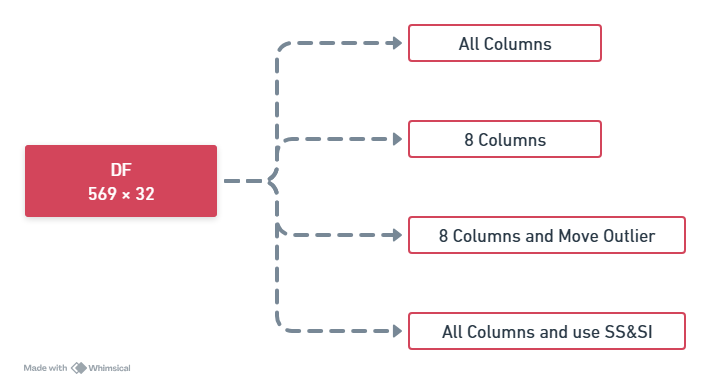

## **A. With All Columns from Origin DF**

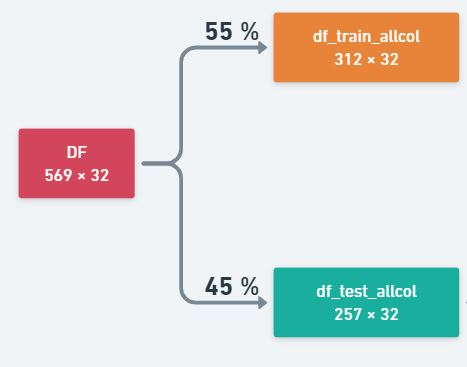

### **Split initial DF into Train and Test (55%)**

In [ ]:
# Tách df thành df cho train và test
N2 =0.55
split_point2 = int(len(df) * N2)

In [ ]:
# Tập Train
df_train_allcol = df.iloc[:split_point2]

In [ ]:
# Tập Test
df_test_allcol = df.iloc[split_point2:]

In [ ]:
df_train_allcol

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
307     89346          0         9.00         14.40           56.36   
308    893526          0        13.50         12.71           85.69   
309    893548          0        13.05         13.84           82.71   
310    893783          0        11.70         19.11           74.33   
311  89382601          0        14.61         15.69           92.68   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760        0.300100   
1       1326.0          0.08474           0.07864        0.086900   
2       1203.0          0.10960           0.15990        0.197400   
3        386.1          0.14250           0.28390        0.241400   
4       1297.0          0.10030           0.13280        0.198000   
..         ...              ...               ...             ...   
307      246.3          0.07005           0.03116        0.003681   
308      566.2          0.07376           0.03614        0.002758   
309      530.6          0.08352           0.03735        0.004559   
310      418.7          0.08814           0.05253        0.015830   
311      664.9          0.07618           0.03515        0.014470   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0               0.147100  ...        25.380          17.33           184.60   
1               0.070170  ...        24.990          23.41           158.80   
2               0.127900  ...        23.570          25.53           152.50   
3               0.105200  ...        14.910          26.50            98.87   
4               0.104300  ...        22.540          16.67           152.20   
..                   ...  ...           ...            ...              ...   
307             0.003472  ...         9.699          20.07            60.90   
308             0.004419  ...        14.970          16.94            95.48   
309             0.008829  ...        14.730          17.40            93.96   
310             0.011480  ...        12.610          26.55            80.92   
311             0.018770  ...        16.460          21.75           103.70   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560          0.71190   
1        1956.0           0.12380            0.18660          0.24160   
2        1709.0           0.14440            0.42450          0.45040   
3         567.7           0.20980            0.86630          0.68690   
4        1575.0           0.13740            0.20500          0.40000   
..          ...               ...                ...              ...   
307       285.5           0.09861            0.05232          0.01472   
308       698.7           0.09023            0.05836          0.01379   
309       672.4           0.10160            0.05847          0.01824   
310       483.1           0.12230            0.10870          0.07915   
311       840.8           0.10110            0.07087          0.04746   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                 0.26540          0.4601                  0.11890  
1                 0.18600          0.2750                  0.08902  
2                 0.24300          0.3613                  0.08758  
3                 0.25750          0.6638                  0.17300  
4                 0.16250          0.2364                  0.07678  
..                    ...             ...                      ...  
307               0.

In [ ]:
df_test_allcol

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
312  89382602          0       12.760         13.37           82.29   
313    893988          0       11.540         10.72           73.73   
314    894047          0        8.597         18.60           54.09   
315    894089          0       12.490         16.85           79.19   
316    894090          0       12.180         14.08           77.25   
..        ...        ...          ...           ...             ...   
564    926424          1       21.560         22.39          142.00   
565    926682          1       20.130         28.25          131.20   
566    926954          1       16.600         28.08          108.30   
567    927241          1       20.600         29.33          140.10   
568     92751          0        7.760         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
312      504.1          0.08794           0.07948        0.040520   
313      409.1          0.08597           0.05969        0.013670   
314      221.2          0.10740           0.05847        0.000000   
315      481.6          0.08511           0.03834        0.004473   
316      461.4          0.07734           0.03212        0.011230   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590        0.243900   
565     1261.0          0.09780           0.10340        0.144000   
566      858.1          0.08455           0.10230        0.092510   
567     1265.0          0.11780           0.27700        0.351400   
568      181.0          0.05263           0.04362        0.000000   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
312             0.025480  ...        14.190          16.40            92.04   
313             0.008907  ...        12.340          12.87            81.23   
314             0.000000  ...         8.952          22.44            56.65   
315             0.006423  ...        13.340          19.71            84.48   
316             0.005051  ...        12.850          16.47            81.60   
..                   ...  ...           ...            ...              ...   
564             0.138900  ...        25.450          26.40           166.10   
565             0.097910  ...        23.690          38.25           155.00   
566             0.053020  ...        18.980          34.12           126.70   
567             0.152000  ...        25.740          39.42           184.60   
568             0.000000  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
312       618.8           0.11940            0.22080          0.17690   
313       467.8           0.10920            0.16260          0.08324   
314       240.1           0.13470            0.07767          0.00000   
315       544.2           0.11040            0.04953          0.01938   
316       513.1           0.10010            0.05332          0.04116   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130          0.41070   
565      1731.0           0.11660            0.19220          0.32150   
566      1124.0           0.11390            0.30940          0.34030   
567      1821.0           0.16500            0.86810          0.93870   
568       268.6           0.08996            0.06444          0.00000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
312               0.08411          0.2564                  0.08253  
313               0.04715          0.3390                  0.07434  
314               0.00000          0.3142                  0.08116  
315               0.02784          0.1917                  0.06174  
316               0.01852          0.2293                  0.06037  
..                    ...             ...                      ...  
564               0.

### **KERAS TENSORFLOW NN**

#### **Thiết lập hàm "df_to_dataset"** [dataframe -> tf.data.tensorflow]

In [ ]:
tar_column='diagnosis'

In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=60):
    df = dataframe.copy()
    labels = df.pop(tar_column)
    df = {key: value.to_numpy()[:,tf.newaxis] for key, value in dataframe.items()}
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    return ds

In [ ]:
# Áp dụng hàm df_to_dataset lên tập train và lên tập test
train_ds = df_to_dataset(df_train_allcol, batch_size=60)
test_ds = df_to_dataset(df_test_allcol, shuffle=False, batch_size=60)

In [ ]:
# Thiết lập "train_features": lấy tất cả các cột feature kèm 30 phần tử trong đó (theo Batch-size) của tập train dưới dạng tf.tensor
# Thiết lập "label_batch": lấy 30 phần tử (theo Batch-size) trong cột Label của tập train dưới dạng tf.tensor
[(train_features_batch, label_batch)] = train_ds.take(1)
print(train_features_batch)

{'id': <tf.Tensor: shape=(60, 1), dtype=int64, numpy=
array([[    87127],
       [   874662],
       [   873701],
       [   843786],
       [    86208],
       [   866203],
       [   888264],
       [     8670],
       [   862722],
       [   859464],
       [   878796],
       [  8913049],
       [  8712289],
       [ 84358402],
       [    86211],
       [  8711216],
       [   859471],
       [  8812816],
       [    86517],
       [ 89263202],
       [   862980],
       [   866674],
       [  8612399],
       [  8611792],
       [   874839],
       [   881861],
       [   849014],
       [   848406],
       [ 84300903],
       [   859283],
       [ 89143602],
       [  8910251],
       [   865468],
       [871001501],
       [   868999],
       [  8911164],
       [   867387],
       [   864018],
       [ 88206102],
       [   858477],
       [ 88249602],
       [   874217],
       [   873593],
       [   879804],
       [  8910499],
       [  8712291],
       [  8912909],
      

In [ ]:
print(label_batch)

tf.Tensor(
[0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1], shape=(60,), dtype=int64)


#### **Thiết lập hàm "get_normalization_layer"**:

In [ ]:
# Normalize= standardlize the numeric column
def get_normalization_layer(name, dataset):
  normalizer = layers.Normalization(axis=None)
  feature_ds = dataset.map(lambda x, y: x[name])
  normalizer.adapt(feature_ds)
  return normalizer

In [ ]:
# Check how it work
# Lấy dữ liệu của cột concave_points_mean từ train_features_batch
concave_points_mean_tf=train_features_batch['concave points_mean']
concave_points_mean_tf

<tf.Tensor: shape=(60, 1), dtype=float64, numpy=
array([[0.01698 ],
       [0.01553 ],
       [0.05189 ],
       [0.08089 ],
       [0.08683 ],
       [0.05627 ],
       [0.02837 ],
       [0.08087 ],
       [0.      ],
       [0.01504 ],
       [0.162   ],
       [0.05588 ],
       [0.09702 ],
       [0.1043  ],
       [0.02941 ],
       [0.02771 ],
       [0.04375 ],
       [0.02563 ],
       [0.08665 ],
       [0.128   ],
       [0.03029 ],
       [0.1149  ],
       [0.08795 ],
       [0.1469  ],
       [0.01654 ],
       [0.06861 ],
       [0.09498 ],
       [0.05259 ],
       [0.1279  ],
       [0.09029 ],
       [0.06602 ],
       [0.02642 ],
       [0.028   ],
       [0.02645 ],
       [0.      ],
       [0.07404 ],
       [0.05933 ],
       [0.01899 ],
       [0.0834  ],
       [0.007799],
       [0.01896 ],
       [0.05814 ],
       [0.1496  ],
       [0.01952 ],
       [0.02142 ],
       [0.01939 ],
       [0.03791 ],
       [0.1054  ],
       [0.02272 ],
       [0.02704 ],
 

In [ ]:
#Gọi Layer chuẩn hóa ra
layer_normalize_fornum= get_normalization_layer('concave points_mean', train_ds)

# Áp dụng lên cột 'concave points_mean'
layer_normalize_fornum(concave_points_mean_tf)

<tf.Tensor: shape=(60, 1), dtype=float32, numpy=
array([[-0.92781186],
       [-0.9646898 ],
       [-0.03994268],
       [ 0.69761693],
       [ 0.84868944],
       [ 0.07145423],
       [-0.63812894],
       [ 0.6971083 ],
       [-1.3596658 ],
       [-0.9771521 ],
       [ 2.760495  ],
       [ 0.06153531],
       [ 1.1078527 ],
       [ 1.2930056 ],
       [-0.61167854],
       [-0.6549148 ],
       [-0.24696808],
       [-0.70781565],
       [ 0.8441115 ],
       [ 1.89577   ],
       [-0.5892974 ],
       [ 1.5625963 ],
       [ 0.8771745 ],
       [ 2.376455  ],
       [-0.93900245],
       [ 0.38529852],
       [ 1.0559692 ],
       [-0.0221395 ],
       [ 1.8932266 ],
       [ 0.936688  ],
       [ 0.31942677],
       [-0.6877235 ],
       [-0.6475392 ],
       [-0.6869605 ],
       [-1.3596658 ],
       [ 0.5234003 ],
       [ 0.14927953],
       [-0.8766913 ],
       [ 0.76145405],
       [-1.161313  ],
       [-0.8774544 ],
       [ 0.11901408],
       [ 2.4451246 ],
     

#### **Khởi tạo all_inputs và encoded_features**

In [ ]:
column_names

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [ ]:
all_inputs = {}
encoded_features = []

for header in column_names:
    numeric_col = tf.keras.Input(shape=(1,), name=header)              #tạo input layer cho mỗi cột numeric
    normalization_layer = get_normalization_layer(header, train_ds)    #tạo layer chuẩn hóa cột numeric bằng hàm đã tạo trc đó
    encoded_numeric_col = normalization_layer(numeric_col)             #áp dụng chuẩn hóa lên input
    all_inputs[header] = numeric_col                                   #Lưu input vào "all_inputs"
    encoded_features.append(encoded_numeric_col)                       #thêm feature đã chuẩn hóa vào list

In [ ]:
all_inputs #lưu trữ các đầu vào (inputs) của mô hình

{'diagnosis': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=diagnosis>,
 'radius_mean': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=radius_mean>,
 'texture_mean': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=texture_mean>,
 'perimeter_mean': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=perimeter_mean>,
 'area_mean': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=area_mean>,
 'smoothness_mean': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=smoothness_mean>,
 'compactness_mean': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=compactness_mean>,
 'concavity_mean': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=concavity_mean>,
 'concave points_mean': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=concave points_mean>,
 'symmetry_mean': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=symmetry_mean>,
 'fractal_dimens

In [ ]:
encoded_features #lưu trữ các đặc trưng đã được Normailze hóa

[<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_1>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_2>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_3>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_4>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_5>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_6>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_7>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_8>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_9>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_10>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_11>,
 <KerasTensor sh

#### **Tạo và train cho Model**

##### **Setup các Layer cho Model**

In [ ]:
#Kết hợp tất cả features đã được encode vào một tensor duy nhất
all_features = tf.keras.layers.concatenate(encoded_features)
all_features

<KerasTensor shape=(None, 31), dtype=float32, sparse=False, name=keras_tensor_31>

In [ ]:
# tạo Dense Layer đầu tiên
x = tf.keras.layers.Dense(400, activation="relu")(all_features) # 128 Neural và hàm kích hoạt Relu để truyền thông tin
x = tf.keras.layers.LayerNormalization()(x) # áp dụng LayerNormalization:chuẩn hóa dữ liệu trong mỗi lớp để có giá trị trung bình bằng 0 và độ lệch chuẩn bằng 1
x

<KerasTensor shape=(None, 400), dtype=float32, sparse=False, name=keras_tensor_33>

In [ ]:
# Tạo Lớp Dense thứ 2
x = tf.keras.layers.Dense(200, activation="relu")(x)
x = tf.keras.layers.LayerNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)
x

<KerasTensor shape=(None, 200), dtype=float32, sparse=False, name=keras_tensor_36>

In [ ]:
#Thêm  lớp Dense Layer thứ 3
x = tf.keras.layers.Dense(180, activation="relu")(x)
x = tf.keras.layers.LayerNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)
x

<KerasTensor shape=(None, 180), dtype=float32, sparse=False, name=keras_tensor_39>

In [ ]:
#Thêm  lớp Dense Layer thứ 4
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.LayerNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)
x

<KerasTensor shape=(None, 128), dtype=float32, sparse=False, name=keras_tensor_42>

In [ ]:
# Tạo lớp Residual Connection đầu tiên (Lớp Residual, hay còn gọi là Skip Connection giúp mô hình học tốt hơn và liên kết với Input để giữ thông tin Input thay vì để Input đi qua nhiều Layer)
#residual1 = tf.keras.layers.Dense(130, activation="relu")(all_features) #128 Neural (phải bằng lớp trước=128) và hàm kích hoạt Relu
#residual1 = tf.keras.layers.LayerNormalization()(residual1) #Áp dụng LayerNormalization cho tensor residual1
#x = tf.keras.layers.add([x, residual1]) # Thêm tensor residual1 vào tensor x để tạo Layer Residual Connection hoàn chỉnh
#x = tf.keras.layers.Activation("relu")(x) # Áp dụng hàm kích hoạt ReLU cho tensor x
#x = tf.keras.layers.Dropout(0.4)(x) # áp dụng Dropout 40% để tránh Overfit
#x

In [ ]:
#Tạo lớp Residual Connection thứ 2 kết nối với lớp REsidual Connection 1
#residual2 = tf.keras.layers.Dense(257, activation="relu")(residual1)
#residual2 = tf.keras.layers.LayerNormalization()(residual2)
#x = tf.keras.layers.add([x, residual2])
#x = tf.keras.layers.Activation("relu")(x)
#x = tf.keras.layers.Dropout(0.4)(x)
#x

In [ ]:
#Thêm cơ chế attention với 4 heads
#x = tf.keras.layers.Reshape((1, x.shape[-1]))(x)
#attention_output = tf.keras.layers.MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
#x = tf.keras.layers.add([x, attention_output])
#x = tf.keras.layers.Reshape((-1,))(x)
#x = tf.keras.layers.LayerNormalization()(x)
#x = tf.keras.layers.Dropout(0.3)(x)
#x

In [ ]:
#Output Layer
output = tf.keras.layers.Dense(1)(x)
output

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_43>

##### **Xác định Weight_decay & Learning Rate**

In [ ]:
#Xác định Weight Decay
weight_decay = 1e-4
#xác định learning rate schedule
LR_Sche= tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1000,
    decay_rate=0.7,
    staircase=True
    )
#Xác định optimizer bởi weight decay và learning rate schedule
optimizer = tf.keras.optimizers.AdamW(learning_rate=LR_Sche, weight_decay=weight_decay)

##### **Gọi tên và tổng hợp vào Model**

In [ ]:
# Xác định CustomLoggingCallback
class CustomLoggingCallback(tf.keras.callbacks.Callback):
    def __init__(self, log_interval=10):
        super(CustomLoggingCallback, self).__init__()
        self.log_interval = log_interval

    def on_epoch_end(self, epoch, logs=None):
        # Only log at the specified interval
        if (epoch + 1) % self.log_interval == 0:
            logs = logs or {}
            print(f"Epoch {epoch + 1}:", end=" ")
            for key, value in logs.items():
                print(f"{key}: {value:.4f}", end=", ")
            print()

In [ ]:
model_krtf = tf.keras.Model(inputs=all_inputs, outputs=output)

In [ ]:
# Kết hơp mô hình và chọn hàm loss kèm metric phù hợp với tính chất bài toán

model_krtf.compile(optimizer=optimizer,
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=["accuracy"])  # Dùng Precision: metrics=[Precision()]
                                         # Dùng Recall: metrics=[Recall()]

##### **Train Model với Epoch**

In [ ]:
history = model_krtf.fit(train_ds,
                        validation_data=test_ds,
                        epochs=1000,
                        callbacks=[CustomLoggingCallback(log_interval=10)],
                        verbose=0)

Epoch 10: accuracy: 0.5256, loss: 7.6458, val_accuracy: 0.7510, val_loss: 4.0138, 
Epoch 20: accuracy: 0.5256, loss: 7.6458, val_accuracy: 0.7510, val_loss: 4.0138, 
Epoch 30: accuracy: 0.5256, loss: 7.6458, val_accuracy: 0.7510, val_loss: 4.0138, 
Epoch 40: accuracy: 0.5256, loss: 7.6458, val_accuracy: 0.7510, val_loss: 4.0138, 
Epoch 50: accuracy: 0.5256, loss: 7.6458, val_accuracy: 0.7510, val_loss: 4.0138, 
Epoch 60: accuracy: 0.5256, loss: 7.6458, val_accuracy: 0.7510, val_loss: 4.0138, 
Epoch 70: accuracy: 0.5256, loss: 7.6458, val_accuracy: 0.7510, val_loss: 4.0138, 
Epoch 80: accuracy: 0.5256, loss: 7.6458, val_accuracy: 0.7510, val_loss: 4.0138, 
Epoch 90: accuracy: 0.5256, loss: 7.6458, val_accuracy: 0.7510, val_loss: 4.0138, 
Epoch 100: accuracy: 0.5256, loss: 7.6458, val_accuracy: 0.7510, val_loss: 4.0138, 
Epoch 110: accuracy: 0.5256, loss: 7.6458, val_accuracy: 0.7510, val_loss: 4.0138, 
Epoch 120: accuracy: 0.5256, loss: 7.6458, val_accuracy: 0.7510, val_loss: 4.0138, 
E

#### **Vizualize Loss value và hiệu suất mô hình**



In [ ]:
# Extract loss data from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

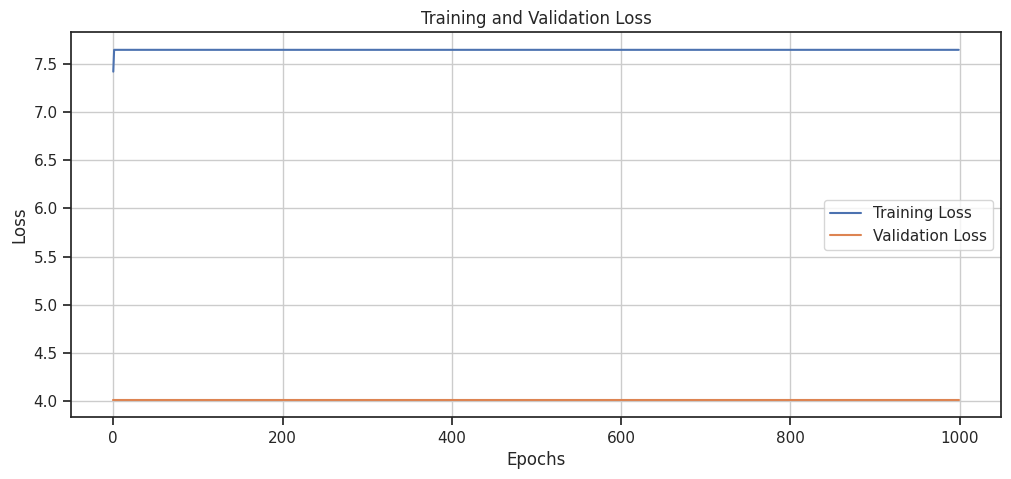

In [ ]:
# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 1, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#### TÔNG HỢP KẾT QUẢ

result = model_krtf.evaluate(test_ds, return_dict=True)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7443 - loss: 4.1213 


In [ ]:
# Xem các thông số có sẵn trong history
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
# Đánh giá kết quả
print("Giá trị accuracy trung bình sau khi train là: ", result['accuracy'])
print("Giá trị loss trung bình sau khi train là: ", result['loss'])

Giá trị accuracy trung bình sau khi train là:  0.7509727478027344
Giá trị loss trung bình sau khi train là:  4.013844966888428


#### **Đánh giá Classification_report**

In [ ]:
import numpy as np

# Khởi tạo các danh sách để lưu trữ dữ liệu
test_images_list = []
test_labels_list = []

# Lặp qua từng batch trong test_ds
for x, y in test_ds:
    # Trích xuất dữ liệu từ dict
    x_dict = {key: value.numpy() for key, value in x.items()}
    test_images_list.append(x_dict)
    test_labels_list.append(y.numpy())

# Ghép các batch lại thành một mảng numpy
test_images = {key: np.concatenate([batch[key] for batch in test_images_list], axis=0) for key in test_images_list[0]}
test_labels = np.concatenate(test_labels_list, axis=0)

In [ ]:
predicted_labels = model_krtf.predict(test_images)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


In [ ]:
# Chuyển về giá tị nhị phân
predicted_binary = (predicted_labels > 0).astype(int)

In [ ]:
print(classification_report(test_labels, predicted_binary))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       193
           1       0.00      0.00      0.00        64

    accuracy                           0.75       257
   macro avg       0.38      0.50      0.43       257
weighted avg       0.56      0.75      0.64       257



In [ ]:
# Lấy Accuracy
acc_krtf=accuracy_score(test_labels, predicted_binary)
# Lấy F1 score
f1_krtf=f1_score(test_labels, predicted_binary)

### **PYTORCH NN (sử dụng LSTM)**

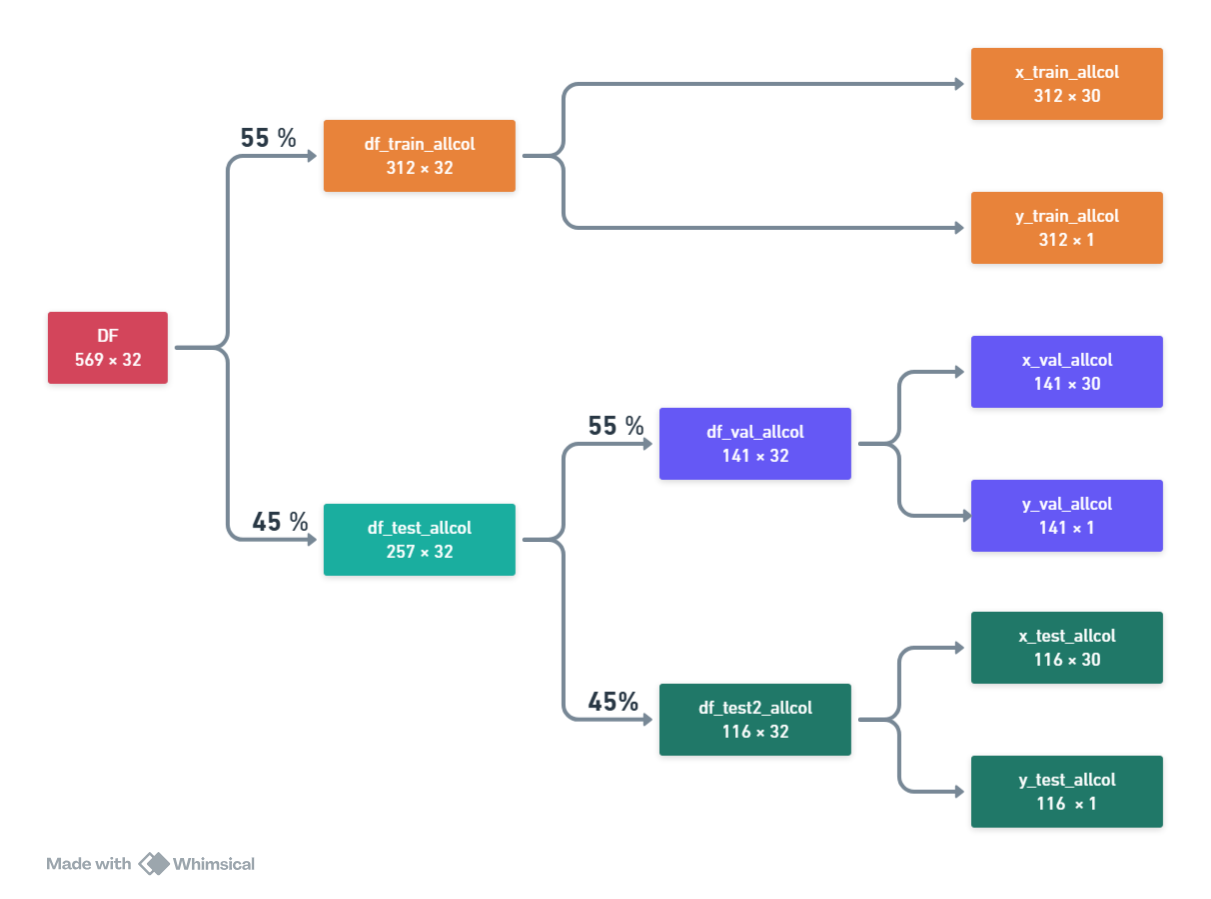

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

#### **Thiết lập cấu trúc Pytorch NN**

In [ ]:
class PYModel(nn.Module):
      def __init__(self, input_size, output_size, dropout_rate=0.3):
        super(PYModel, self).__init__()

        # Định nghĩa các lớp đầu vào:
        self.fc1 = nn.Linear(input_size, 100) # Lớp fully connected: đầu vào kích thước là input_size, đầu ra có kích thước là 100
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(100, output_size)

        # Hướng đãn data chạy trong từng Layer như thế nào
      def forward(self, x):
        # Đưa dữ liệu qua lớp fully connected thứ hai
        out = self.fc1(x)
        out = self.dropout(out)
        # Đưa dữ liệu qua lớp fully connected thứ hai
        out = self.fc2(out)

        return out

#### **Setup Hyper Parameter and Complile Model**

In [ ]:
#Chuẩn bị các Hyper Parameter
input_size = 30          #### Đại diện cho số lượng cột (columns) trong dữ liệu đầu vào (x_train, x_val, x_test)

#hidden_size = 250        #### là số lượng đơn vị ẩn (hidden units, như Neural) trong mỗi lớp, quyết định sức mạnh biểu diễn của mô hình.
                         #### Mỗi đơn vị ẩn là một "bộ não" nhỏ giúp mô hình học các mối quan hệ phức tạp trong dữ liệu.
                         #### bé thì không đủ khả năng học, lớn thì dẽ bị overfit

output_size = 1          # Số chiều đầu ra

#num_layers = 20          #### Số lớp xếp chồng
                         #### bé thì mô hình có thể không đủ độ sâu để học các mối quan hệ phức tạp trong dữ liệu, lớn wa thì overfit

dropout_rate = 0.5       # Tỷ lệ dropout

#Khởi tạo model và các thành phần/ Đây là một mô hình LSTM phức hợp được thiết kế cho bài toán regression, với nhiều tính năng như:
#Learning rate scheduling
#GPU support
#L2 regularization
model = PYModel(input_size, output_size, dropout_rate)
criterion = nn.BCEWithLogitsLoss() # Sử dụng MSE làm hàm loss cho bài toán regression
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-6)  #Sử dụng Adam optimizer với learning rate 0.001
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, min_lr=1e-5) #Sử dụng ReduceLROnPlateau để điều chỉnh learning rate
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #Kiểm tra và sử dụng GPU nếu có, ngược lại sử dụng CPU
model.to(device)

PYModel(
  (fc1): Linear(in_features=30, out_features=100, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=100, out_features=1, bias=True)
)

#### **Chuẩn bị dữ liệu Train, Test, Validation**

In [ ]:
df_train_allcol

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
307     89346          0         9.00         14.40           56.36   
308    893526          0        13.50         12.71           85.69   
309    893548          0        13.05         13.84           82.71   
310    893783          0        11.70         19.11           74.33   
311  89382601          0        14.61         15.69           92.68   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760        0.300100   
1       1326.0          0.08474           0.07864        0.086900   
2       1203.0          0.10960           0.15990        0.197400   
3        386.1          0.14250           0.28390        0.241400   
4       1297.0          0.10030           0.13280        0.198000   
..         ...              ...               ...             ...   
307      246.3          0.07005           0.03116        0.003681   
308      566.2          0.07376           0.03614        0.002758   
309      530.6          0.08352           0.03735        0.004559   
310      418.7          0.08814           0.05253        0.015830   
311      664.9          0.07618           0.03515        0.014470   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0               0.147100  ...        25.380          17.33           184.60   
1               0.070170  ...        24.990          23.41           158.80   
2               0.127900  ...        23.570          25.53           152.50   
3               0.105200  ...        14.910          26.50            98.87   
4               0.104300  ...        22.540          16.67           152.20   
..                   ...  ...           ...            ...              ...   
307             0.003472  ...         9.699          20.07            60.90   
308             0.004419  ...        14.970          16.94            95.48   
309             0.008829  ...        14.730          17.40            93.96   
310             0.011480  ...        12.610          26.55            80.92   
311             0.018770  ...        16.460          21.75           103.70   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560          0.71190   
1        1956.0           0.12380            0.18660          0.24160   
2        1709.0           0.14440            0.42450          0.45040   
3         567.7           0.20980            0.86630          0.68690   
4        1575.0           0.13740            0.20500          0.40000   
..          ...               ...                ...              ...   
307       285.5           0.09861            0.05232          0.01472   
308       698.7           0.09023            0.05836          0.01379   
309       672.4           0.10160            0.05847          0.01824   
310       483.1           0.12230            0.10870          0.07915   
311       840.8           0.10110            0.07087          0.04746   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                 0.26540          0.4601                  0.11890  
1                 0.18600          0.2750                  0.08902  
2                 0.24300          0.3613                  0.08758  
3                 0.25750          0.6638                  0.17300  
4                 0.16250          0.2364                  0.07678  
..                    ...             ...                      ...  
307               0.

In [ ]:
df_test_allcol

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
312  89382602          0       12.760         13.37           82.29   
313    893988          0       11.540         10.72           73.73   
314    894047          0        8.597         18.60           54.09   
315    894089          0       12.490         16.85           79.19   
316    894090          0       12.180         14.08           77.25   
..        ...        ...          ...           ...             ...   
564    926424          1       21.560         22.39          142.00   
565    926682          1       20.130         28.25          131.20   
566    926954          1       16.600         28.08          108.30   
567    927241          1       20.600         29.33          140.10   
568     92751          0        7.760         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
312      504.1          0.08794           0.07948        0.040520   
313      409.1          0.08597           0.05969        0.013670   
314      221.2          0.10740           0.05847        0.000000   
315      481.6          0.08511           0.03834        0.004473   
316      461.4          0.07734           0.03212        0.011230   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590        0.243900   
565     1261.0          0.09780           0.10340        0.144000   
566      858.1          0.08455           0.10230        0.092510   
567     1265.0          0.11780           0.27700        0.351400   
568      181.0          0.05263           0.04362        0.000000   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
312             0.025480  ...        14.190          16.40            92.04   
313             0.008907  ...        12.340          12.87            81.23   
314             0.000000  ...         8.952          22.44            56.65   
315             0.006423  ...        13.340          19.71            84.48   
316             0.005051  ...        12.850          16.47            81.60   
..                   ...  ...           ...            ...              ...   
564             0.138900  ...        25.450          26.40           166.10   
565             0.097910  ...        23.690          38.25           155.00   
566             0.053020  ...        18.980          34.12           126.70   
567             0.152000  ...        25.740          39.42           184.60   
568             0.000000  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
312       618.8           0.11940            0.22080          0.17690   
313       467.8           0.10920            0.16260          0.08324   
314       240.1           0.13470            0.07767          0.00000   
315       544.2           0.11040            0.04953          0.01938   
316       513.1           0.10010            0.05332          0.04116   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130          0.41070   
565      1731.0           0.11660            0.19220          0.32150   
566      1124.0           0.11390            0.30940          0.34030   
567      1821.0           0.16500            0.86810          0.93870   
568       268.6           0.08996            0.06444          0.00000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
312               0.08411          0.2564                  0.08253  
313               0.04715          0.3390                  0.07434  
314               0.00000          0.3142                  0.08116  
315               0.02784          0.1917                  0.06174  
316               0.01852          0.2293                  0.06037  
..                    ...             ...                      ...  
564               0.

In [ ]:
# Tách từ tập Test ra tập Validation theo tỉ lệ của N2 %
df_val_allcol = df_test_allcol.iloc[:(int(len(df_test_allcol) * N2))]
df_test2_allcol = df_test_allcol.iloc[(int(len(df_test_allcol) * N2)):]

In [ ]:
df_val_allcol

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
312   89382602          0       12.760         13.37           82.29   
313     893988          0       11.540         10.72           73.73   
314     894047          0        8.597         18.60           54.09   
315     894089          0       12.490         16.85           79.19   
316     894090          0       12.180         14.08           77.25   
..         ...        ...          ...           ...             ...   
448     911150          0       14.530         19.34           94.25   
449  911157302          1       21.100         20.52          138.10   
450    9111596          0       11.870         21.54           76.83   
451    9111805          1       19.590         25.00          127.70   
452    9111843          0       12.000         28.23           76.77   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
312      504.1          0.08794           0.07948        0.040520   
313      409.1          0.08597           0.05969        0.013670   
314      221.2          0.10740           0.05847        0.000000   
315      481.6          0.08511           0.03834        0.004473   
316      461.4          0.07734           0.03212        0.011230   
..         ...              ...               ...             ...   
448      659.7          0.08388           0.07800        0.088170   
449     1384.0          0.09684           0.11750        0.157200   
450      432.0          0.06613           0.10640        0.087770   
451     1191.0          0.10320           0.09871        0.165500   
452      442.5          0.08437           0.06450        0.040550   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
312             0.025480  ...        14.190          16.40            92.04   
313             0.008907  ...        12.340          12.87            81.23   
314             0.000000  ...         8.952          22.44            56.65   
315             0.006423  ...        13.340          19.71            84.48   
316             0.005051  ...        12.850          16.47            81.60   
..                   ...  ...           ...            ...              ...   
448             0.029250  ...        16.300          28.39           108.10   
449             0.115500  ...        25.680          32.07           168.20   
450             0.023860  ...        12.790          28.18            83.51   
451             0.090630  ...        21.440          30.96           139.80   
452             0.019450  ...        13.090          37.88            85.07   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
312       618.8           0.11940            0.22080          0.17690   
313       467.8           0.10920            0.16260          0.08324   
314       240.1           0.13470            0.07767          0.00000   
315       544.2           0.11040            0.04953          0.01938   
316       513.1           0.10010            0.05332          0.04116   
..          ...               ...                ...              ...   
448       830.5           0.10890            0.26490          0.37790   
449      2022.0           0.13680            0.31010          0.43990   
450       507.2           0.09457            0.33990          0.32180   
451      1421.0           0.15280            0.18450          0.39770   
452       523.7           0.12080            0.18560          0.18110   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
312               0.08411          0.2564                  0.08253  
313               0.04715          0.3390                  0.07434  
314               0.00000          0.3142                  0.08116  
315               0.02784          0.1917                  0.06174  
316               0.01852          0.2293                  0.06037  
..                    ...             ...                      ...  
448      

In [ ]:
df_test2_allcol

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
453   911201          0        14.53         13.98           93.86      644.2   
454   911202          0        12.62         17.15           80.62      492.9   
455  9112085          0        13.38         30.72           86.34      557.2   
456  9112366          0        11.63         29.29           74.87      415.1   
457  9112367          0        13.21         25.25           84.10      537.9   
..       ...        ...          ...           ...             ...        ...   
564   926424          1        21.56         22.39          142.00     1479.0   
565   926682          1        20.13         28.25          131.20     1261.0   
566   926954          1        16.60         28.08          108.30      858.1   
567   927241          1        20.60         29.33          140.10     1265.0   
568    92751          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
453          0.10990           0.09242         0.06895              0.06495   
454          0.08583           0.05430         0.02966              0.02272   
455          0.09245           0.07426         0.02819              0.03264   
456          0.09357           0.08574         0.07160              0.02017   
457          0.08791           0.05205         0.02772              0.02068   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
453  ...        15.800          16.93           103.10       749.9   
454  ...        14.340          22.15            91.62       633.5   
455  ...        15.050          41.61            96.69       705.6   
456  ...        13.120          38.81            86.04       527.8   
457  ...        14.350          34.23            91.29       632.9   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
453           0.13470            0.14780          0.13730   
454           0.12250            0.15170          0.18870   
455           0.11720            0.14210          0.07003   
456           0.14060            0.20310          0.29230   
457           0.12890            0.10630          0.13900   
..                ...                ...              ...   
564           0.14100            0.21130          0.41070   
565           0.11660            0.19220          0.32150   
566           0.11390            0.30940          0.34030   
567           0.16500            0.86810          0.93870   
568           0.08996            0.06444          0.00000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
453               0.10690          0.2606                  0.07810  
454               0.09851          0.3270                  0.07330  
455               0.07763          0.2196                  0.07675  
456               0.06835          0.2884                  0.07220  
457               0.06005          0.2444                  0.06788  
..                    ...             ...                      ...  
564               0.22160      

In [ ]:
# Tách x và Y
x_train_allcol, x_test_allcol, x_val_allcol= df_train_allcol.drop(["id",tar_column],axis=1), df_test2_allcol.drop(["id",tar_column], axis=1),df_val_allcol.drop(["id",tar_column], axis=1)

In [ ]:
y_train_allcol, y_test_allcol, y_val_allcol= df_train_allcol[tar_column], df_test2_allcol[tar_column],df_val_allcol[tar_column]

In [ ]:
x_test_allcol.shape

(116, 30)

#### **Chuyển train, test, validation thành Tensor và tạo Dataloader**

In [ ]:
# chuyển dữ liệu Numpy Array full numeric sang torch.tensor (dạng array dùng cho Pytorch)
# Thêm .values để chắc chắn dữ liệu Dataframe (hoặc series) thành dạng Numpy
x_train_allcol_tensor = torch.tensor(x_train_allcol.values, dtype=torch.float32)
y_train_allcol_tensor = torch.tensor(y_train_allcol.values, dtype=torch.float32)
x_test_allcol_tensor  = torch.tensor(x_test_allcol.values, dtype=torch.float32)
y_test_allcol_tensor  = torch.tensor(y_test_allcol.values, dtype=torch.float32)
x_val_allcol_tensor   = torch.tensor(x_val_allcol.values, dtype=torch.float32)
y_val_allcol_tensor   = torch.tensor(y_val_allcol.values, dtype=torch.float32)

In [ ]:
# khởi tạo Dataloader
train_allcol_loader = torch.utils.data.DataLoader(
    list(zip(x_train_allcol_tensor, y_train_allcol_tensor)), batch_size=40, shuffle=True)
val_allcol_loader = torch.utils.data.DataLoader(
    list(zip(x_val_allcol_tensor, y_val_allcol_tensor)), batch_size=40, shuffle=False)
test_allcol_loader = torch.utils.data.DataLoader(
    list(zip(x_test_allcol_tensor, y_test_allcol_tensor)), batch_size=40, shuffle=True)


#### **Train Model**

In [ ]:
# Lists to store loss history
train_loss_history_allcol = []
val_loss_history_allcol = []
num_epochs_allcol= 200

for epoch in range(num_epochs_allcol):
    model.train()
    running_loss = 0.0
        #LẤY DATA RA
    for i, (inputs, targets) in enumerate(train_allcol_loader):
        inputs, targets = inputs.float().to(device), targets.float().to(device)
        #inputs = inputs.unsqueeze(1)
        targets = targets.unsqueeze(1)

        # ĐI QUA MODEL ĐỂ CHẠY RA OUTPUT VÀ DỰA TRÊN HÀM LOSS ĐỂ TÍNH TOÁN OUTPUT ĐÓ
        # Check lại xem input_size có bằng số Feature (cột) của x_train_allcol hay không
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Cập nhật tham số mô hình:
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation
    model.eval()
    val_running_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_allcol_loader:
            inputs, targets = inputs.float().to(device), targets.float().to(device)
            #inputs = inputs.unsqueeze(1)
            targets = targets.unsqueeze(1)

            outputs = model(inputs)
            loss = criterion(outputs, targets)

            val_running_loss += loss.item()

    # Tính avarage train loss và avarage val loss cho mỗi epoch
    avg_train_loss = running_loss / len(train_allcol_loader)
    train_loss_history_allcol.append(avg_train_loss)
    avg_val_loss = val_running_loss / len(val_allcol_loader)
    val_loss_history_allcol.append(avg_val_loss)

    if epoch % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs_allcol}], Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

Epoch [1/200], Training Loss: 23.3898, Validation Loss: 6.2055
Epoch [11/200], Training Loss: 4.6941, Validation Loss: 1.6006
Epoch [21/200], Training Loss: 1.7789, Validation Loss: 0.4435
Epoch [31/200], Training Loss: 0.8424, Validation Loss: 0.4073
Epoch [41/200], Training Loss: 1.2426, Validation Loss: 0.3627
Epoch [51/200], Training Loss: 0.8563, Validation Loss: 0.3179
Epoch [61/200], Training Loss: 0.5487, Validation Loss: 0.3022
Epoch [71/200], Training Loss: 0.4746, Validation Loss: 0.3146
Epoch [81/200], Training Loss: 0.2933, Validation Loss: 0.2737
Epoch [91/200], Training Loss: 0.2573, Validation Loss: 0.1695
Epoch [101/200], Training Loss: 0.3139, Validation Loss: 0.1644
Epoch [111/200], Training Loss: 0.2740, Validation Loss: 0.1989
Epoch [121/200], Training Loss: 0.2399, Validation Loss: 0.1146
Epoch [131/200], Training Loss: 0.2014, Validation Loss: 0.2133
Epoch [141/200], Training Loss: 0.2246, Validation Loss: 0.1202
Epoch [151/200], Training Loss: 0.2003, Validation

#### **Vizulaize LOSS**

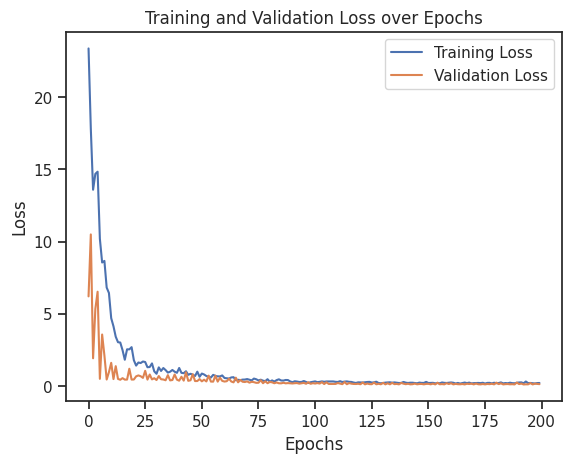

In [ ]:
# Plot training and validation loss
plt.plot(train_loss_history_allcol, label='Training Loss')
plt.plot(val_loss_history_allcol, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

#### **Đánh giá Classification_report**

In [ ]:
# Định nghĩa hàm get_prediction

def get_predictions(model, data_loader):
    model.eval()  # Set model to evaluation mode
    predictions = []
    actuals = []
    with torch.no_grad():  # Disable gradient calculation
        for inputs, targets in data_loader:
            inputs = inputs.float().to(device)
            targets = targets.to(device)
            inputs = inputs.unsqueeze(1)
            targets = targets.unsqueeze(1)

            # Forward pass to get outputs
            outputs = model(inputs)

            # Move outputs and targets to CPU and convert to numpy arrays
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(targets.cpu().numpy())

    # Convert lists to numpy arrays for easy handling
    predictions = np.array(predictions).squeeze()
    actuals = np.array(actuals).squeeze().astype(int)

    return predictions, actuals

In [ ]:
# Thiết lập dự đoán

test_allcol_predictions, test_allcol_actuals = get_predictions(model, test_allcol_loader)

In [ ]:
# Giá trị của test_allcol_predictions là dạng số liên tục nên chỉ phù hợp với bài toán loss MSE
# Chuyển đổi test_allcol_predictions sang dạng Binary dựa trên threshold=0.5, test_allcol_actuals đã là dạng nhị phân rồi nên tha
predictions_allcol_binary = np.where(test_allcol_predictions >= 0.5, 1, 0)

In [ ]:
print(f"test_allcol_actuals shape: {test_allcol_actuals.shape}, type: {test_allcol_actuals.dtype}")
print(f"predictions_allcol_binary shape: {predictions_allcol_binary.shape}, type: {predictions_allcol_binary.dtype}")

test_allcol_actuals shape: (116,), type: int64
predictions_allcol_binary shape: (116,), type: int64


In [ ]:
print(classification_report(test_allcol_actuals, predictions_allcol_binary))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        90
           1       0.80      0.92      0.86        26

    accuracy                           0.93       116
   macro avg       0.89      0.93      0.91       116
weighted avg       0.94      0.93      0.93       116



In [ ]:
# Lấy accuracy
acc_pyt=accuracy_score(test_allcol_actuals, predictions_allcol_binary)
# Lấy F1 score
f1_pyt=f1_score(test_allcol_actuals, predictions_allcol_binary)

## **B. With Top8 Columns from origin DF**

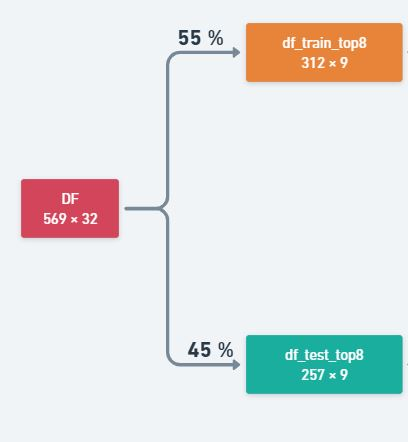

### **Chuẩn bị tập Train và Test**

In [ ]:
df

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590         0.24390   
565     1261.0          0.09780           0.10340         0.14400   
566      858.1          0.08455           0.10230         0.09251   
567     1265.0          0.11780           0.27700         0.35140   
568      181.0          0.05263           0.04362         0.00000   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                0.14710  ...        25.380          17.33           184.60   
1                0.07017  ...        24.990          23.41           158.80   
2                0.12790  ...        23.570          25.53           152.50   
3                0.10520  ...        14.910          26.50            98.87   
4                0.10430  ...        22.540          16.67           152.20   
..                   ...  ...           ...            ...              ...   
564              0.13890  ...        25.450          26.40           166.10   
565              0.09791  ...        23.690          38.25           155.00   
566              0.05302  ...        18.980          34.12           126.70   
567              0.15200  ...        25.740          39.42           184.60   
568              0.00000  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0

In [ ]:
# Tập Train
df_train_top8 = df.iloc[:split_point2][columns_top8withtar]

In [ ]:
# Tập Test
df_test_top8 = df.iloc[split_point2:][columns_top8withtar]

In [ ]:
df_train_top8

concave points_worst  perimeter_worst  concave points_mean  radius_worst  \
0                 0.26540           184.60             0.147100        25.380   
1                 0.18600           158.80             0.070170        24.990   
2                 0.24300           152.50             0.127900        23.570   
3                 0.25750            98.87             0.105200        14.910   
4                 0.16250           152.20             0.104300        22.540   
..                    ...              ...                  ...           ...   
307               0.01389            60.90             0.003472         9.699   
308               0.02210            95.48             0.004419        14.970   
309               0.03532            93.96             0.008829        14.730   
310               0.05741            80.92             0.011480        12.610   
311               0.05813           103.70             0.018770        16.460   

     smoothness_se  fractal_dimension_mean  texture_se  symmetry_se  diagnosis  
0         0.006399                 0.07871      0.9053      0.03003          1  
1         0.005225                 0.05667      0.7339      0.01389          1  
2         0.006150                 0.05999      0.7869      0.02250          1  
3         0.009110                 0.09744      1.1560      0.05963          1  
4         0.011490                 0.05883      0.7813      0.01756          1  
..             ...                     ...         ...          ...        ...  
307       0.007389                 0.06833      1.3050      0.02701          0  
308       0.003338                 0.05335      0.6864      0.01480          0  
309       0.004148                 0.05518      0.8285      0.01422          0  
310       0.006064                 0.06128      1.4300      0.02349          0  
311       0.005031                 0.05255      0.9115      0.01494          0  

[312 rows x 9 columns]

In [ ]:
df_test_top8

concave points_worst  perimeter_worst  concave points_mean  radius_worst  \
312               0.08411            92.04             0.025480        14.190   
313               0.04715            81.23             0.008907        12.340   
314               0.00000            56.65             0.000000         8.952   
315               0.02784            84.48             0.006423        13.340   
316               0.01852            81.60             0.005051        12.850   
..                    ...              ...                  ...           ...   
564               0.22160           166.10             0.138900        25.450   
565               0.16280           155.00             0.097910        23.690   
566               0.14180           126.70             0.053020        18.980   
567               0.26500           184.60             0.152000        25.740   
568               0.00000            59.16             0.000000         9.456   

     smoothness_se  fractal_dimension_mean  texture_se  symmetry_se  diagnosis  
312       0.006494                 0.06140      0.6594      0.01731          0  
313       0.004124                 0.06100      0.3602      0.02032          0  
314       0.020750                 0.07359      2.7770      0.06146          0  
315       0.004928                 0.05673      0.7151      0.01393          0  
316       0.005343                 0.05649      0.5996      0.01977          0  
..             ...                     ...         ...          ...        ...  
564       0.010300                 0.05623      1.2560      0.01114          1  
565       0.005769                 0.05533      2.4630      0.01898          1  
566       0.005903                 0.05648      1.0750      0.01318          1  
567       0.006522                 0.07016      1.5950      0.02324          1  
568       0.007189                 0.05884      1.4280      0.02676          0  

[257 rows x 9 columns]

### **KERAS TENSORFLOW NN**

#### **Chuyển DF sang dạng tf.data.tensorflow**

In [ ]:
# Áp dụng hàm df_to_dataset lên tập train và lên tập test
train_ds_top8 = df_to_dataset(df_train_top8, batch_size=60)
test_ds_top8 = df_to_dataset(df_test_top8, shuffle=False, batch_size=60)

#### **Khởi tạo all_inputs và encoded_features**

In [ ]:
columns_top8withtar

['concave points_worst',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst',
 'smoothness_se',
 'fractal_dimension_mean',
 'texture_se',
 'symmetry_se',
 'diagnosis']

In [ ]:
all_inputs_top8 = {} #lưu trữ các đầu vào (inputs) của mô hình
encoded_features_top8 = []  #lưu trữ các đặc trưng đã được Normailze hóa

for header in columns_top8withtar:
    numeric_col_top8 = tf.keras.Input(shape=(1,), name=header)                   #tạo input layer cho mỗi cột numeric
    normalization_layer_top8 = get_normalization_layer(header, train_ds_top8)    #tạo layer chuẩn hóa cột numeric bằng hàm đã tạo trc đó
    encoded_numeric_col_top8 = normalization_layer_top8(numeric_col_top8)        #áp dụng chuẩn hóa lên input
    all_inputs_top8[header] = numeric_col_top8                                   #Lưu input vào "all_inputs"
    encoded_features_top8.append(encoded_numeric_col_top8)                       #thêm feature đã chuẩn hóa vào list

In [ ]:
all_inputs_top8

{'concave points_worst': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=concave points_worst>,
 'perimeter_worst': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=perimeter_worst>,
 'concave points_mean': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=concave points_mean>,
 'radius_worst': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=radius_worst>,
 'smoothness_se': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=smoothness_se>,
 'fractal_dimension_mean': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=fractal_dimension_mean>,
 'texture_se': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=texture_se>,
 'symmetry_se': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=symmetry_se>,
 'diagnosis': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=diagnosis>}

In [ ]:
encoded_features_top8

[<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_44>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_45>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_46>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_47>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_48>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_49>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_50>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_51>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_52>]

#### **Tạo và train cho model**

##### **Setup các Layer cho Model**

In [ ]:
#Kết hợp tất cả features đã được encode vào một tensor duy nhất
all_features_top8 = tf.keras.layers.concatenate(encoded_features_top8)
all_features_top8

<KerasTensor shape=(None, 9), dtype=float32, sparse=False, name=keras_tensor_53>

In [ ]:
# tạo Dense Layer đầu tiên
x2 = tf.keras.layers.Dense(128, activation="relu")(all_features_top8) # 128 Neural và hàm kích hoạt Relu để truyền thông tin
x2 = tf.keras.layers.LayerNormalization()(x2) # áp dụng LayerNormalization:chuẩn hóa dữ liệu trong mỗi lớp để có giá trị trung bình bằng 0 và độ lệch chuẩn bằng 1
x2

<KerasTensor shape=(None, 128), dtype=float32, sparse=False, name=keras_tensor_55>

In [ ]:
# Tạo Lớp Dense thứ 2
x2 = tf.keras.layers.Dense(78, activation="relu")(x2)
x2 = tf.keras.layers.LayerNormalization()(x2)
x2 = tf.keras.layers.Dropout(0.4)(x2)
x2

<KerasTensor shape=(None, 78), dtype=float32, sparse=False, name=keras_tensor_58>

In [ ]:
#Thêm  lớp Dense Layer thứ 3
x2 = tf.keras.layers.Dense(70, activation="relu")(x2)
x2 = tf.keras.layers.LayerNormalization()(x2)
x2 = tf.keras.layers.Dropout(0.3)(x2)
x2

<KerasTensor shape=(None, 70), dtype=float32, sparse=False, name=keras_tensor_61>

In [ ]:
#Thêm  lớp Dense Layer thứ 4
x2 = tf.keras.layers.Dense(40, activation="relu")(x2)
x2 = tf.keras.layers.LayerNormalization()(x2)
x2 = tf.keras.layers.Dropout(0.3)(x2)
x2

<KerasTensor shape=(None, 40), dtype=float32, sparse=False, name=keras_tensor_64>

In [ ]:
#Output Layer
output_top8 = tf.keras.layers.Dense(1)(x2)
output_top8

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_65>

##### **Xác định Weight_decay & Learning Rate**

In [ ]:
#Xác định Weight Decay
weight_decay = 1e-4
#xác định learning rate schedule
LR_Sche= tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.02,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True
    )
#Xác định optimizer bởi weight decay và learning rate schedule
optimizer = tf.keras.optimizers.AdamW(learning_rate=LR_Sche, weight_decay=weight_decay)

##### **Gọi tên và tổng hợp vào Model**

In [ ]:
# Xác định CustomLoggingCallback: là 1 lớp tùy chỉnh để theo dõi và ghi lại quá trình training sau mỗi epoch
class CustomLoggingCallback(tf.keras.callbacks.Callback):
    def __init__(self, log_interval=10):
        super(CustomLoggingCallback, self).__init__()
        self.log_interval = log_interval

    def on_epoch_end(self, epoch, logs=None):
        # Only log at the specified interval
        if (epoch + 1) % self.log_interval == 0:
            logs = logs or {}
            print(f"Epoch {epoch + 1}:", end=" ")
            for key, value in logs.items():
                print(f"{key}: {value:.4f}", end=", ")
            print()

In [ ]:
model_krtf_top8 = tf.keras.Model(inputs=all_inputs_top8, outputs=output_top8)

In [ ]:
# Kết hơp mô hình và chọn hàm loss kèm metric phù hợp với tính chất bài toán

model_krtf_top8.compile(optimizer=optimizer,
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=["accuracy"])  # Dùng Precision: metrics=[Precision()]
                                         # Dùng Recall: metrics=[Recall()]

##### **Train Model với Epoch**

In [ ]:
history_top8 = model_krtf_top8.fit(train_ds_top8,
                              validation_data=test_ds_top8,
                              epochs=1200,
                              callbacks=[CustomLoggingCallback(log_interval=10)],
                              verbose=0)

Epoch 10: accuracy: 0.9904, loss: 0.1544, val_accuracy: 1.0000, val_loss: 0.0000, 
Epoch 20: accuracy: 0.9904, loss: 0.1544, val_accuracy: 1.0000, val_loss: 0.0000, 
Epoch 30: accuracy: 0.9968, loss: 0.0522, val_accuracy: 1.0000, val_loss: 0.0000, 
Epoch 40: accuracy: 0.9744, loss: 0.4099, val_accuracy: 0.9805, val_loss: 0.3102, 
Epoch 50: accuracy: 0.9904, loss: 0.1533, val_accuracy: 0.9961, val_loss: 0.0620, 
Epoch 60: accuracy: 0.9872, loss: 0.2044, val_accuracy: 0.9961, val_loss: 0.0620, 
Epoch 70: accuracy: 0.9904, loss: 0.1533, val_accuracy: 0.9961, val_loss: 0.0620, 
Epoch 80: accuracy: 0.9904, loss: 0.1563, val_accuracy: 1.0000, val_loss: 0.0000, 
Epoch 90: accuracy: 0.9968, loss: 0.0517, val_accuracy: 1.0000, val_loss: 0.0000, 
Epoch 100: accuracy: 0.9968, loss: 0.0517, val_accuracy: 1.0000, val_loss: 0.0000, 
Epoch 110: accuracy: 1.0000, loss: 0.0000, val_accuracy: 1.0000, val_loss: 0.0000, 
Epoch 120: accuracy: 0.9968, loss: 0.0025, val_accuracy: 1.0000, val_loss: 0.0000, 
E

#### **Vizualize LOSS Value và hiệu suất model**



In [ ]:
# Extract loss data from history
train_loss_top8 = history_top8.history['loss']
val_loss_top8 = history_top8.history['val_loss']

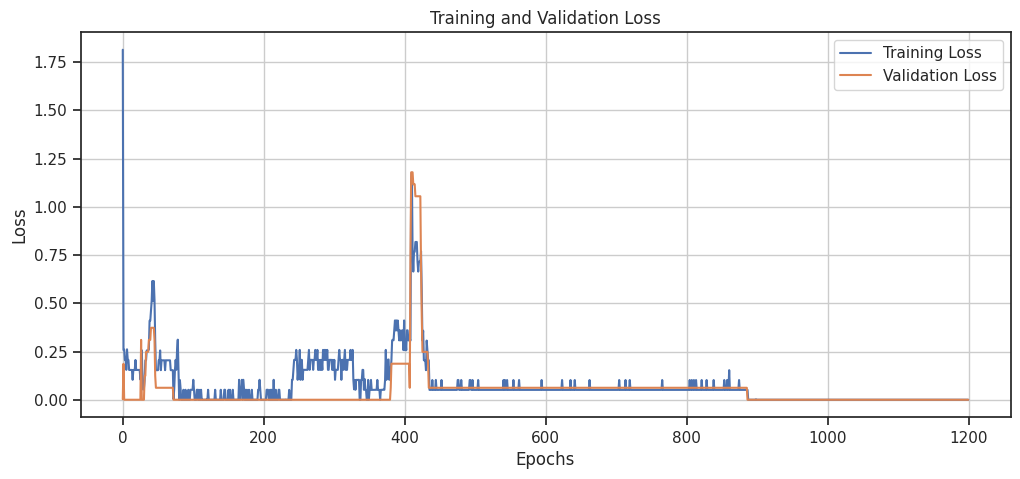

In [ ]:
# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 1, 1)
plt.plot(train_loss_top8, label='Training Loss')
plt.plot(val_loss_top8, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#### TÔNG HỢP KẾT QUẢ
# evaluate() tính trung bình cộng trên tất cả các batch của tập test_ds sau khi đã tính loss và metrics trên từng batch riêng lẻ
# Giá trị từ evaluate() phản ánh hiệu suất thực tế của mô hình trên toàn bộ tập test

result_top8 = model_krtf_top8.evaluate(test_ds_top8, return_dict=True)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.1921e-07


In [ ]:
# Đánh giá kết quả
print("Giá trị accuracy trung bình sau khi train là: ", result_top8['accuracy'])
print("Giá trị loss trung bình sau khi train là: ", result_top8['loss'])

Giá trị accuracy trung bình sau khi train là:  1.0
Giá trị loss trung bình sau khi train là:  1.1920930376163597e-07


#### **Đánh giá Classification_report**

In [ ]:
import numpy as np

# Khởi tạo các danh sách để lưu trữ dữ liệu
test_images_top8_list = []
test_labels_top8_list = []

# Lặp qua từng batch trong test_ds_ss
for x, y in test_ds_top8:
    # Trích xuất dữ liệu từ dict
    x_dict = {key: value.numpy() for key, value in x.items()}
    test_images_top8_list.append(x_dict)
    test_labels_top8_list.append(y.numpy())

# Ghép các batch lại thành một mảng numpy
test_images_top8 = {key: np.concatenate([batch[key] for batch in test_images_top8_list], axis=0) for key in test_images_top8_list[0]}
test_labels_top8 = np.concatenate(test_labels_top8_list, axis=0)

In [ ]:
predicted_labels_top8 = model_krtf_top8.predict(test_images_top8)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [ ]:
# Chuyển về giá tị nhị phân
predicted_binary_top8 = (predicted_labels_top8 > 0).astype(int)

In [ ]:
print(classification_report(test_labels_top8, predicted_binary_top8))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00        64

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



In [ ]:
# Lấy accracy
acc_krtf_top8=accuracy_score(test_labels_top8, predicted_binary_top8)
# Lấy F1 score
f1_krtf_top8=f1_score(test_labels_top8, predicted_binary_top8)

### **PYTORCH NN**

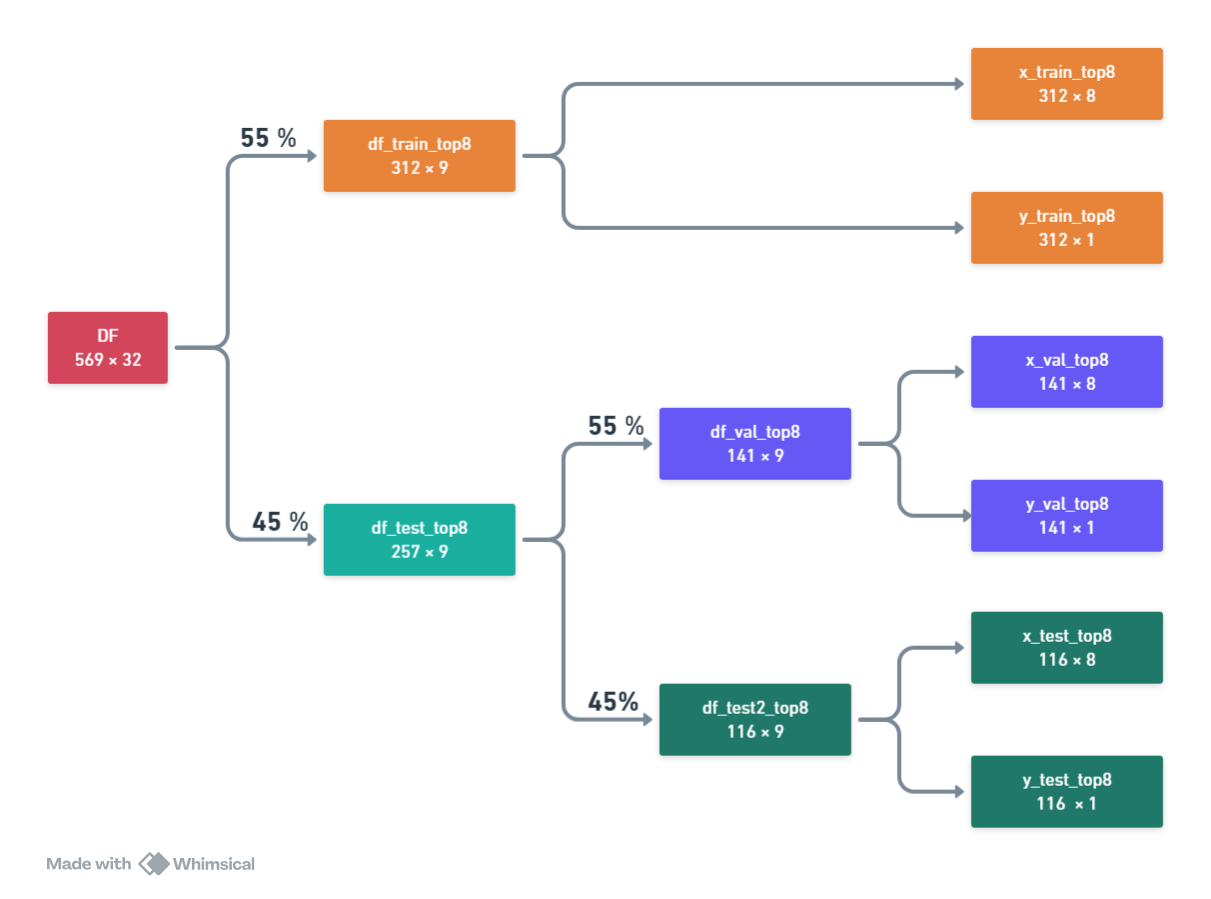

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

#### **Setup Hyper Parameter and Complile Model**

In [ ]:
#Chuẩn bị các Hyper Parameter
input_size_top8 = 8     #### Đại diện cho số lượng cột (columns) trong dữ liệu đầu vào (x_train, x_val, x_test)

hidden_size_top8 = 290   #### là số lượng đơn vị ẩn (hidden units, như Neural) trong mỗi lớp, quyết định sức mạnh biểu diễn của mô hình.
                         #### Mỗi đơn vị ẩn là một "bộ não" nhỏ giúp mô hình học các mối quan hệ phức tạp trong dữ liệu.
                         #### bé thì không đủ khả năng học, lớn thì dẽ bị overfit

output_size = 1          # Số chiều đầu ra

num_layers_top8 = 19     #### Số lớp LSTM xếp chồng
                         #### bé thì mô hình có thể không đủ độ sâu để học các mối quan hệ phức tạp trong dữ liệu, lớn wa thì overfit

dropout_rate_top8 = 0.55  # Tỷ lệ dropout

#Khởi tạo model và các thành phần/ Đây là một mô hình LSTM phức hợp được thiết kế cho bài toán regression, với nhiều tính năng như:
#Multiple stacked LSTM layers
#Dropout để tránh overfitting
#Fully connected layers sau LSTM
#Learning rate scheduling
#GPU support
#L2 regularization
model_top8 = PYModel(input_size_top8, output_size, dropout_rate_top8)
criterion = nn.BCEWithLogitsLoss() # Sử dụng MSE làm hàm loss cho bài toán regression
optimizer = optim.Adam(model_top8.parameters(), lr=0.03, weight_decay=1e-8)  #Sử dụng Adam optimizer với learning rate 0.001 và L2 regularization
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, min_lr=1e-5) #Sử dụng ReduceLROnPlateau để điều chỉnh learning rate
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #Kiểm tra và sử dụng GPU nếu có, ngược lại sử dụng CPU
model_top8.to(device)

PYModel(
  (fc1): Linear(in_features=8, out_features=100, bias=True)
  (dropout): Dropout(p=0.55, inplace=False)
  (fc2): Linear(in_features=100, out_features=1, bias=True)
)

#### **Chuẩn bị dữ liệu Train, Test, Validation**

In [ ]:
df_train_top8

concave points_worst  perimeter_worst  concave points_mean  radius_worst  \
0                 0.26540           184.60             0.147100        25.380   
1                 0.18600           158.80             0.070170        24.990   
2                 0.24300           152.50             0.127900        23.570   
3                 0.25750            98.87             0.105200        14.910   
4                 0.16250           152.20             0.104300        22.540   
..                    ...              ...                  ...           ...   
307               0.01389            60.90             0.003472         9.699   
308               0.02210            95.48             0.004419        14.970   
309               0.03532            93.96             0.008829        14.730   
310               0.05741            80.92             0.011480        12.610   
311               0.05813           103.70             0.018770        16.460   

     smoothness_se  fractal_dimension_mean  texture_se  symmetry_se  diagnosis  
0         0.006399                 0.07871      0.9053      0.03003          1  
1         0.005225                 0.05667      0.7339      0.01389          1  
2         0.006150                 0.05999      0.7869      0.02250          1  
3         0.009110                 0.09744      1.1560      0.05963          1  
4         0.011490                 0.05883      0.7813      0.01756          1  
..             ...                     ...         ...          ...        ...  
307       0.007389                 0.06833      1.3050      0.02701          0  
308       0.003338                 0.05335      0.6864      0.01480          0  
309       0.004148                 0.05518      0.8285      0.01422          0  
310       0.006064                 0.06128      1.4300      0.02349          0  
311       0.005031                 0.05255      0.9115      0.01494          0  

[312 rows x 9 columns]

In [ ]:
df_test_top8

concave points_worst  perimeter_worst  concave points_mean  radius_worst  \
312               0.08411            92.04             0.025480        14.190   
313               0.04715            81.23             0.008907        12.340   
314               0.00000            56.65             0.000000         8.952   
315               0.02784            84.48             0.006423        13.340   
316               0.01852            81.60             0.005051        12.850   
..                    ...              ...                  ...           ...   
564               0.22160           166.10             0.138900        25.450   
565               0.16280           155.00             0.097910        23.690   
566               0.14180           126.70             0.053020        18.980   
567               0.26500           184.60             0.152000        25.740   
568               0.00000            59.16             0.000000         9.456   

     smoothness_se  fractal_dimension_mean  texture_se  symmetry_se  diagnosis  
312       0.006494                 0.06140      0.6594      0.01731          0  
313       0.004124                 0.06100      0.3602      0.02032          0  
314       0.020750                 0.07359      2.7770      0.06146          0  
315       0.004928                 0.05673      0.7151      0.01393          0  
316       0.005343                 0.05649      0.5996      0.01977          0  
..             ...                     ...         ...          ...        ...  
564       0.010300                 0.05623      1.2560      0.01114          1  
565       0.005769                 0.05533      2.4630      0.01898          1  
566       0.005903                 0.05648      1.0750      0.01318          1  
567       0.006522                 0.07016      1.5950      0.02324          1  
568       0.007189                 0.05884      1.4280      0.02676          0  

[257 rows x 9 columns]

In [ ]:
# Tách từ tập Test ra tập Validation theo tỉ lệ của N2 %
df_val_top8 = df_test_top8.iloc[:(int(len(df_test_top8) * N2))]
df_test2_top8 = df_test_top8.iloc[(int(len(df_test_top8) * N2)):]

In [ ]:
df_val_top8

concave points_worst  perimeter_worst  concave points_mean  radius_worst  \
312               0.08411            92.04             0.025480        14.190   
313               0.04715            81.23             0.008907        12.340   
314               0.00000            56.65             0.000000         8.952   
315               0.02784            84.48             0.006423        13.340   
316               0.01852            81.60             0.005051        12.850   
..                    ...              ...                  ...           ...   
448               0.09594           108.10             0.029250        16.300   
449               0.22800           168.20             0.115500        25.680   
450               0.08750            83.51             0.023860        12.790   
451               0.14660           139.80             0.090630        21.440   
452               0.07116            85.07             0.019450        13.090   

     smoothness_se  fractal_dimension_mean  texture_se  symmetry_se  diagnosis  
312       0.006494                 0.06140      0.6594      0.01731          0  
313       0.004124                 0.06100      0.3602      0.02032          0  
314       0.020750                 0.07359      2.7770      0.06146          0  
315       0.004928                 0.05673      0.7151      0.01393          0  
316       0.005343                 0.05649      0.5996      0.01977          0  
..             ...                     ...         ...          ...        ...  
448       0.004147                 0.05746      1.3540      0.01394          0  
449       0.005467                 0.05661      1.3610      0.01029          1  
450       0.006854                 0.06612      1.5540      0.02354          0  
451       0.011900                 0.05391      1.3750      0.01641          1  
452       0.007334                 0.06104      1.7050      0.01745          0  

[141 rows x 9 columns]

In [ ]:
df_test2_top8

concave points_worst  perimeter_worst  concave points_mean  radius_worst  \
453               0.10690           103.10              0.06495        15.800   
454               0.09851            91.62              0.02272        14.340   
455               0.07763            96.69              0.03264        15.050   
456               0.06835            86.04              0.02017        13.120   
457               0.06005            91.29              0.02068        14.350   
..                    ...              ...                  ...           ...   
564               0.22160           166.10              0.13890        25.450   
565               0.16280           155.00              0.09791        23.690   
566               0.14180           126.70              0.05302        18.980   
567               0.26500           184.60              0.15200        25.740   
568               0.00000            59.16              0.00000         9.456   

     smoothness_se  fractal_dimension_mean  texture_se  symmetry_se  diagnosis  
453       0.006133                 0.06121      0.7213      0.02207          0  
454       0.003888                 0.05826      0.6674      0.01608          0  
455       0.005841                 0.06016      1.9240      0.01564          0  
456       0.009861                 0.06166      2.4260      0.02475          0  
457       0.005768                 0.05584      1.3500      0.01347          0  
..             ...                     ...         ...          ...        ...  
564       0.010300                 0.05623      1.2560      0.01114          1  
565       0.005769                 0.05533      2.4630      0.01898          1  
566       0.005903                 0.05648      1.0750      0.01318          1  
567       0.006522                 0.07016      1.5950      0.02324          1  
568       0.007189                 0.05884      1.4280      0.02676          0  

[116 rows x 9 columns]

In [ ]:
# Tách x và Y
x_train_top8, x_test_top8, x_val_top8= df_train_top8.drop(tar_column,axis=1), df_test2_top8.drop(tar_column, axis=1),df_val_top8.drop(tar_column, axis=1)

In [ ]:
y_train_top8, y_test_top8, y_val_top8= df_train_top8[tar_column], df_test2_top8[tar_column],df_val_top8[tar_column]

In [ ]:
x_val_top8.shape

(141, 8)

#### **Chuyển train, test, validation thành Tensor và tạo Dataloader**

In [ ]:
# chuyển dữ liệu Numpy Array full numeric sang torch.tensor (dạng array dùng cho Pytorch)
# Thêm .values để chắc chắn dữ liệu Dataframe (hoặc series) thành dạng Numpy
x_train_top8_tensor = torch.tensor(x_train_top8.values, dtype=torch.float32)
y_train_top8_tensor = torch.tensor(y_train_top8.values, dtype=torch.float32)
x_test_top8_tensor  = torch.tensor(x_test_top8.values, dtype=torch.float32)
y_test_top8_tensor  = torch.tensor(y_test_top8.values, dtype=torch.float32)
x_val_top8_tensor   = torch.tensor(x_val_top8.values, dtype=torch.float32)
y_val_top8_tensor   = torch.tensor(y_val_top8.values, dtype=torch.float32)

In [ ]:
# khởi tạo Dataloader
train_top8_loader = torch.utils.data.DataLoader(
    list(zip(x_train_top8_tensor, y_train_top8_tensor)), batch_size=40, shuffle=True)
val_top8_loader = torch.utils.data.DataLoader(
    list(zip(x_val_top8_tensor, y_val_top8_tensor)), batch_size=40, shuffle=False)
test_top8_loader = torch.utils.data.DataLoader(
    list(zip(x_test_top8_tensor, y_test_top8_tensor)), batch_size=40, shuffle=True)


#### **Train Model**

In [ ]:
# Lists to store loss history
train_loss_history_top8 = []
val_loss_history_top8 = []
num_epochs_top8= 200

for epoch in range(num_epochs_top8):
    model_top8.train()
    running_loss = 0.0
        #LẤY DATA RA
    for i, (inputs, targets) in enumerate(train_top8_loader):
        inputs, targets = inputs.float().to(device), targets.float().to(device)
        #inputs = inputs.unsqueeze(1)
        targets = targets.unsqueeze(1)

        # ĐI QUA MODEL ĐỂ CHẠY RA OUTPUT VÀ DỰA TRÊN HÀM LOSS ĐỂ TÍNH TOÁN OUTPUT ĐÓ
        # Check lại xem input_size có bằng số Feature (cột) của x_train_allcol hay không
        outputs = model_top8(inputs)
        loss = criterion(outputs, targets)

        # TÍNH RADIENT
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation
    model_top8.eval()
    val_running_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_top8_loader:
            inputs, targets = inputs.float().to(device), targets.float().to(device)
            #inputs = inputs.unsqueeze(1)
            targets = targets.unsqueeze(1)

            outputs = model_top8(inputs)
            loss = criterion(outputs, targets)

            val_running_loss += loss.item()

    # Tính avarage train loss và avarage val loss cho mỗi epoch
    avg_train_loss_top8 = running_loss / len(train_top8_loader)
    train_loss_history_top8.append(avg_train_loss_top8)
    avg_val_loss_top8 = val_running_loss / len(val_top8_loader)
    val_loss_history_top8.append(avg_val_loss_top8)

    if epoch % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs_top8}], Training Loss: {avg_train_loss_top8:.4f}, Validation Loss: {avg_val_loss_top8:.4f}")

Epoch [1/200], Training Loss: 13.5157, Validation Loss: 3.1968
Epoch [11/200], Training Loss: 0.5064, Validation Loss: 0.4470
Epoch [21/200], Training Loss: 0.4147, Validation Loss: 0.3460
Epoch [31/200], Training Loss: 0.3264, Validation Loss: 0.3669
Epoch [41/200], Training Loss: 0.3974, Validation Loss: 0.2304
Epoch [51/200], Training Loss: 0.3801, Validation Loss: 0.2500
Epoch [61/200], Training Loss: 0.3519, Validation Loss: 0.3692
Epoch [71/200], Training Loss: 0.3036, Validation Loss: 0.1488
Epoch [81/200], Training Loss: 0.2352, Validation Loss: 0.1482
Epoch [91/200], Training Loss: 0.3607, Validation Loss: 0.1270
Epoch [101/200], Training Loss: 0.2436, Validation Loss: 0.1081
Epoch [111/200], Training Loss: 0.3263, Validation Loss: 0.1395
Epoch [121/200], Training Loss: 0.2487, Validation Loss: 0.1143
Epoch [131/200], Training Loss: 0.3597, Validation Loss: 0.1038
Epoch [141/200], Training Loss: 0.2447, Validation Loss: 0.2563
Epoch [151/200], Training Loss: 0.3627, Validation

#### **Vizulaize LOSS value**

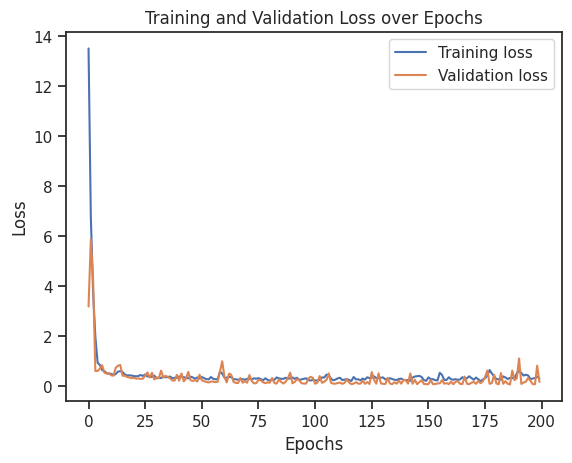

In [ ]:
# Plot training and validation loss
import matplotlib.pyplot as plt
plt.plot(train_loss_history_top8, label='Training loss')
plt.plot(val_loss_history_top8, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

#### **Đánh giá Classification_report**

In [ ]:
# Thiết lập dự đoán

test_top8_predictions, test_top8_actuals = get_predictions(model_top8, test_top8_loader)

In [ ]:
# Chuyển đổi test_allcol_predictions sang dạng nhị phân dựa trên threshold=0.5, test_allcol_actuals đã là dạng nhị phân rồi nên tha
predictions_top8_binary = np.where(test_top8_predictions >= 0.5, 1, 0)

In [ ]:
print(classification_report(test_top8_actuals, predictions_top8_binary))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        90
           1       0.74      1.00      0.85        26

    accuracy                           0.92       116
   macro avg       0.87      0.95      0.90       116
weighted avg       0.94      0.92      0.93       116



In [ ]:
# Lấy accuracy
acc_pyt_top8=accuracy_score(test_top8_actuals, predictions_top8_binary)
# Lấy F1 score
f1_pyt_top8=f1_score(test_top8_actuals, predictions_top8_binary)

## **C. With Top8 Columns moving Outlier (Stradetagy 2)**

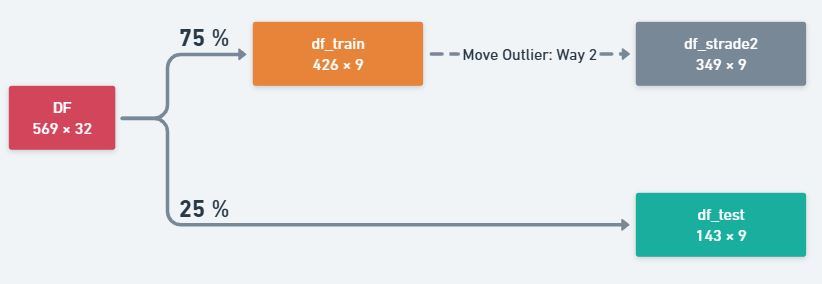

### **Chuẩn bị tập Train và Test**

In [ ]:
df_strade2

concave points_worst  perimeter_worst  concave points_mean  radius_worst  \
1                 0.18600           158.80             0.070170         24.99   
2                 0.24300           152.50             0.127900         23.57   
4                 0.16250           152.20             0.104300         22.54   
5                 0.17410           103.40             0.080890         15.47   
6                 0.19320           153.20             0.074000         22.88   
..                    ...              ...                  ...           ...   
420               0.06664            86.43             0.014280         13.07   
421               0.11080           114.10             0.063000         16.46   
422               0.11050            81.93             0.044970         12.64   
423               0.14070           101.40             0.048120         15.14   
425               0.02579            69.92             0.005159         11.11   

     smoothness_se  fractal_dimension_mean  texture_se  symmetry_se  diagnosis  
1         0.005225                 0.05667      0.7339      0.01389          1  
2         0.006150                 0.05999      0.7869      0.02250          1  
4         0.011490                 0.05883      0.7813      0.01756          1  
5         0.007510                 0.07613      0.8902      0.02165          1  
6         0.004314                 0.05742      0.7732      0.01369          1  
..             ...                     ...         ...          ...        ...  
420       0.007278                 0.06267      1.4400      0.01868          0  
421       0.009976                 0.07406      1.5110      0.02653          0  
422       0.005884                 0.06320      0.7339      0.01848          0  
423       0.003980                 0.06181      0.8950      0.01581          0  
425       0.005724                 0.06439      1.3410      0.01445          0  

[349 rows x 9 columns]

In [ ]:
df_test

concave points_worst  perimeter_worst  concave points_mean  radius_worst  \
426               0.09310            81.41              0.02218        12.130   
427               0.07485            83.69              0.01404        12.760   
428               0.04044            74.35              0.01370        11.680   
429               0.03612            88.87              0.01835        13.820   
430               0.24750           125.40              0.09711        16.350   
..                    ...              ...                  ...           ...   
564               0.22160           166.10              0.13890        25.450   
565               0.16280           155.00              0.09791        23.690   
566               0.14180           126.70              0.05302        18.980   
567               0.26500           184.60              0.15200        25.740   
568               0.00000            59.16              0.00000         9.456   

     smoothness_se  fractal_dimension_mean  texture_se  symmetry_se  diagnosis  
426       0.007364                 0.06915      1.1270      0.02161          0  
427       0.006543                 0.05977      1.6210      0.01844          0  
428       0.005883                 0.06148      0.9671      0.02009          0  
429       0.007337                 0.05544      0.8836      0.01940          0  
430       0.006965                 0.06898      0.8749      0.01499          1  
..             ...                     ...         ...          ...        ...  
564       0.010300                 0.05623      1.2560      0.01114          1  
565       0.005769                 0.05533      2.4630      0.01898          1  
566       0.005903                 0.05648      1.0750      0.01318          1  
567       0.006522                 0.07016      1.5950      0.02324          1  
568       0.007189                 0.05884      1.4280      0.02676          0  

[143 rows x 9 columns]

### **KERAS TENSORFLOW NN**

#### **Chuyển DF sang dạng tf.data.tensorflow**

In [ ]:
# Áp dụng hàm df_to_dataset lên tập train và lên tập test
train_ds_strade2 = df_to_dataset(df_strade2, batch_size=60)
test_ds_strade2  = df_to_dataset(df_test, shuffle=False, batch_size=60)

#### **Khởi tạo all_inputs và encoded_features**

In [ ]:
columns_top8withtar

['concave points_worst',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst',
 'smoothness_se',
 'fractal_dimension_mean',
 'texture_se',
 'symmetry_se',
 'diagnosis']

In [ ]:
all_inputs_strade2 = {} #lưu trữ các đầu vào (inputs) của mô hình
encoded_features_strade2 = []  #lưu trữ các đặc trưng đã được Normailze hóa

for header in columns_top8withtar:
    numeric_col_strade2 = tf.keras.Input(shape=(1,), name=header)                   #tạo input layer cho mỗi cột numeric
    normalization_layer_strade2 = get_normalization_layer(header, train_ds_strade2)    #tạo layer chuẩn hóa cột numeric bằng hàm đã tạo trc đó
    encoded_numeric_col_strade2 = normalization_layer_strade2(numeric_col_strade2)        #áp dụng chuẩn hóa lên input
    all_inputs_strade2[header] = numeric_col_strade2                                   #Lưu input vào "all_inputs"
    encoded_features_strade2.append(encoded_numeric_col_strade2)                       #thêm feature đã chuẩn hóa vào list

In [ ]:
all_inputs_strade2

{'concave points_worst': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=concave points_worst>,
 'perimeter_worst': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=perimeter_worst>,
 'concave points_mean': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=concave points_mean>,
 'radius_worst': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=radius_worst>,
 'smoothness_se': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=smoothness_se>,
 'fractal_dimension_mean': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=fractal_dimension_mean>,
 'texture_se': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=texture_se>,
 'symmetry_se': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=symmetry_se>,
 'diagnosis': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=diagnosis>}

In [ ]:
encoded_features_strade2

[<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_66>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_67>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_68>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_69>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_70>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_71>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_72>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_73>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_74>]

#### **Tạo và train cho model**

##### **Setup các Layer cho Model**

In [ ]:
#Kết hợp tất cả features đã được encode vào một tensor duy nhất
all_features_strade2 = tf.keras.layers.concatenate(encoded_features_strade2)
all_features_strade2

<KerasTensor shape=(None, 9), dtype=float32, sparse=False, name=keras_tensor_75>

In [ ]:
# tạo Dense Layer đầu tiên
x4 = tf.keras.layers.Dense(128, activation="relu")(all_features_strade2) # 128 Neural và hàm kích hoạt Relu để truyền thông tin
x4 = tf.keras.layers.LayerNormalization()(x4) # áp dụng LayerNormalization:chuẩn hóa dữ liệu trong mỗi lớp để có giá trị trung bình bằng 0 và độ lệch chuẩn bằng 1
x4

<KerasTensor shape=(None, 128), dtype=float32, sparse=False, name=keras_tensor_77>

In [ ]:
# Tạo Lớp Dense thứ 2
x4 = tf.keras.layers.Dense(78, activation="relu")(x4)
x4 = tf.keras.layers.LayerNormalization()(x4)
x4 = tf.keras.layers.Dropout(0.4)(x4)
x4

<KerasTensor shape=(None, 78), dtype=float32, sparse=False, name=keras_tensor_80>

In [ ]:
#Thêm  lớp Dense Layer thứ 3
x4 = tf.keras.layers.Dense(70, activation="relu")(x4)
x4 = tf.keras.layers.LayerNormalization()(x4)
x4 = tf.keras.layers.Dropout(0.3)(x4)
x4

<KerasTensor shape=(None, 70), dtype=float32, sparse=False, name=keras_tensor_83>

In [ ]:
#Thêm  lớp Dense Layer thứ 4
x4 = tf.keras.layers.Dense(40, activation="relu")(x4)
x4 = tf.keras.layers.LayerNormalization()(x4)
x4 = tf.keras.layers.Dropout(0.3)(x4)
x4

<KerasTensor shape=(None, 40), dtype=float32, sparse=False, name=keras_tensor_86>

In [ ]:
#Output Layer
output_strade2 = tf.keras.layers.Dense(1)(x4)
output_strade2

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_87>

##### **Xác định Weight_decay & Learning Rate**

In [ ]:
#Xác định Weight Decay
weight_decay = 1e-4
#xác định learning rate schedule
LR_Sche= tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.02,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True
    )
#Xác định optimizer bởi weight decay và learning rate schedule
optimizer = tf.keras.optimizers.AdamW(learning_rate=LR_Sche, weight_decay=weight_decay)

##### **Gọi tên và tổng hợp vào Model**

In [ ]:
# Xác định CustomLoggingCallback: là 1 lớp tùy chỉnh để theo dõi và ghi lại quá trình training sau mỗi epoch
class CustomLoggingCallback(tf.keras.callbacks.Callback):
    def __init__(self, log_interval=10):
        super(CustomLoggingCallback, self).__init__()
        self.log_interval = log_interval

    def on_epoch_end(self, epoch, logs=None):
        # Only log at the specified interval
        if (epoch + 1) % self.log_interval == 0:
            logs = logs or {}
            print(f"Epoch {epoch + 1}:", end=" ")
            for key, value in logs.items():
                print(f"{key}: {value:.4f}", end=", ")
            print()

In [ ]:
model_krtf_strade2 = tf.keras.Model(inputs=all_inputs_strade2, outputs=output_strade2)

In [ ]:
# Kết hơp mô hình và chọn hàm loss kèm metric phù hợp với tính chất bài toán

model_krtf_strade2.compile(optimizer=optimizer,
                           loss=tf.keras.losses.BinaryCrossentropy(),
                           metrics=["accuracy"])   # Dùng Precision: metrics=[Precision()]
                                                   # Dùng Recall: metrics=[Recall()]

##### **Train Model với Epoch**

In [ ]:
history_strade2 = model_krtf_strade2.fit(train_ds_strade2,
                              validation_data=test_ds_strade2,
                              epochs=1200,
                              callbacks=[CustomLoggingCallback(log_interval=10)],
                              verbose=0)

Epoch 10: accuracy: 0.9799, loss: 0.3223, val_accuracy: 0.9860, val_loss: 0.2242, 
Epoch 20: accuracy: 0.9570, loss: 0.6852, val_accuracy: 0.8671, val_loss: 2.1229, 
Epoch 30: accuracy: 0.9570, loss: 0.6857, val_accuracy: 0.9650, val_loss: 0.5574, 
Epoch 40: accuracy: 0.9570, loss: 0.6857, val_accuracy: 0.9650, val_loss: 0.5574, 
Epoch 50: accuracy: 0.9542, loss: 0.7314, val_accuracy: 0.9650, val_loss: 0.5574, 
Epoch 60: accuracy: 0.9570, loss: 0.6857, val_accuracy: 0.9650, val_loss: 0.5574, 
Epoch 70: accuracy: 1.0000, loss: 0.0000, val_accuracy: 0.9930, val_loss: 0.1115, 
Epoch 80: accuracy: 0.9914, loss: 0.1370, val_accuracy: 0.9650, val_loss: 0.5574, 
Epoch 90: accuracy: 0.9685, loss: 0.5025, val_accuracy: 0.9301, val_loss: 1.1149, 
Epoch 100: accuracy: 0.9857, loss: 0.2284, val_accuracy: 0.9720, val_loss: 0.4459, 
Epoch 110: accuracy: 1.0000, loss: 0.0000, val_accuracy: 1.0000, val_loss: 0.0000, 
Epoch 120: accuracy: 1.0000, loss: 0.0000, val_accuracy: 1.0000, val_loss: 0.0000, 
E

#### **Vizualize LOSS Value và hiệu suất model**



In [ ]:
# Extract loss data from history
train_loss_strade2 = history_strade2.history['loss']
val_loss_strade2 = history_strade2.history['val_loss']

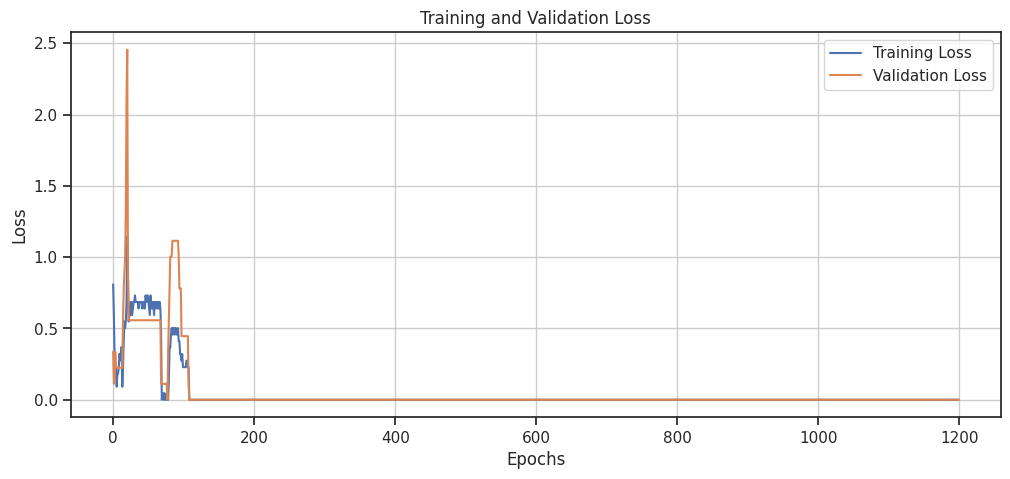

In [ ]:
# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 1, 1)
plt.plot(train_loss_strade2, label='Training Loss')
plt.plot(val_loss_strade2, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#### TÔNG HỢP KẾT QUẢ
# evaluate() tính trung bình cộng trên tất cả các batch của tập test_ds sau khi đã tính loss và metrics trên từng batch riêng lẻ
# Giá trị từ evaluate() phản ánh hiệu suất thực tế của mô hình trên toàn bộ tập test

result_strade2 = model_krtf_strade2.evaluate(test_ds_strade2, return_dict=True)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.1921e-07


In [ ]:
# Đánh giá kết quả
print("Giá trị accuracy trung bình sau khi train là: ", result_strade2['accuracy'])
print("Giá trị loss trung bình sau khi train là: ", result_strade2['loss'])

Giá trị accuracy trung bình sau khi train là:  1.0
Giá trị loss trung bình sau khi train là:  1.1920930376163597e-07


#### **Đánh giá Classification_report**

In [ ]:
import numpy as np

# Khởi tạo các danh sách để lưu trữ dữ liệu
test_images_strade2_list = []
test_labels_strade2_list = []

# Lặp qua từng batch trong test_ds_ss
for x, y in test_ds_strade2:
    # Trích xuất dữ liệu từ dict
    x_dict = {key: value.numpy() for key, value in x.items()}
    test_images_strade2_list.append(x_dict)
    test_labels_strade2_list.append(y.numpy())

# Ghép các batch lại thành một mảng numpy
test_images_strade2 = {key: np.concatenate([batch[key] for batch in test_images_strade2_list], axis=0) for key in test_images_strade2_list[0]}
test_labels_strade2 = np.concatenate(test_labels_strade2_list, axis=0)

In [ ]:
predicted_labels_strade2 = model_krtf_strade2.predict(test_images_strade2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [ ]:
# Chuyển về giá tị nhị phân
predicted_binary_strade2 = (predicted_labels_strade2 > 0).astype(int)

In [ ]:
print(classification_report(test_labels_strade2, predicted_binary_strade2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        35

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143



In [ ]:
# Lấy Accuracy
acc_krtf_strade2=accuracy_score(test_labels_strade2, predicted_binary_strade2)
# Lấy F1 score
f1_krtf_strade2=f1_score(test_labels_strade2, predicted_binary_strade2)

### **PYTORCH NN**

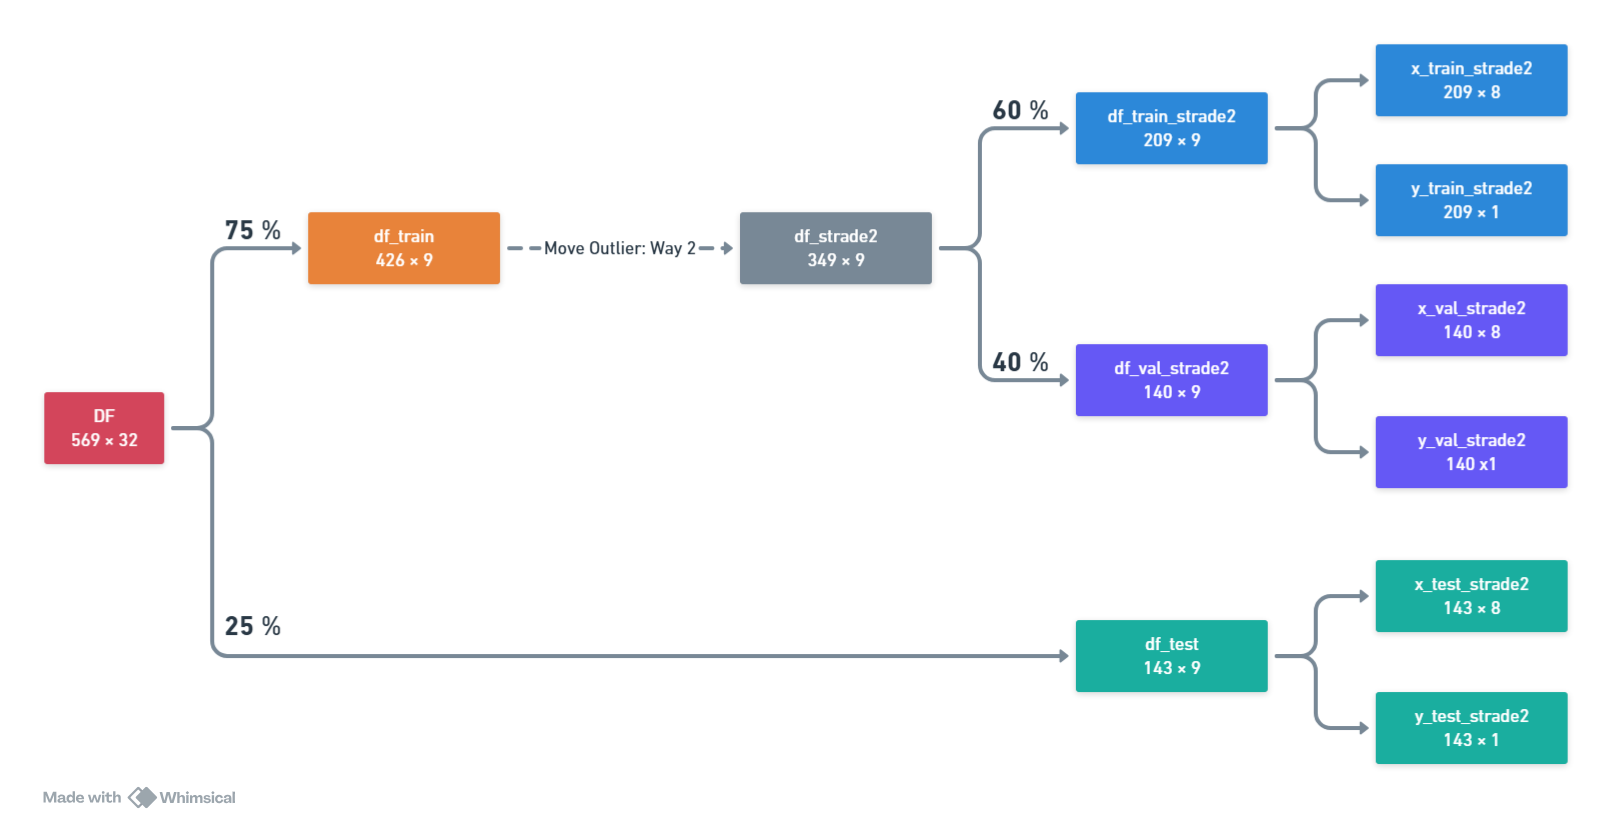

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

#### **Setup Hyper Parameter and Complile Model**

In [ ]:
#Chuẩn bị các Hyper Parameter
input_size_strade2 = 8     #### Đại diện cho số lượng cột (columns) trong dữ liệu đầu vào (x_train, x_val, x_test)

hidden_size_strade2 = 280   #### là số lượng đơn vị ẩn (hidden units, như Neural) trong mỗi lớp LSTM, quyết định sức mạnh biểu diễn của mô hình.
                         #### Mỗi đơn vị ẩn là một "bộ não" nhỏ giúp mô hình học các mối quan hệ phức tạp trong dữ liệu.
                         #### bé thì không đủ khả năng học, lớn thì dẽ bị overfit

output_size = 1          # Số chiều đầu ra

num_layers_strade2 = 19     #### Số lớp LSTM xếp chồng
                         #### bé thì mô hình có thể không đủ độ sâu để học các mối quan hệ phức tạp trong dữ liệu, lớn wa thì overfit

dropout_rate_strade2 = 0.55  # Tỷ lệ dropout

#Khởi tạo model và các thành phần/ Đây là một mô hình LSTM phức hợp được thiết kế cho bài toán regression, với nhiều tính năng như:
#Multiple stacked LSTM layers
#Dropout để tránh overfitting
#Fully connected layers sau LSTM
#Learning rate scheduling
#GPU support
#L2 regularization
model_strade2 = PYModel(input_size_strade2, output_size, dropout_rate_strade2)
criterion = nn.BCEWithLogitsLoss() # Sử dụng MSE làm hàm loss cho bài toán regression
optimizer = optim.Adam(model_strade2.parameters(), lr=0.03, weight_decay=1e-8)  #Sử dụng Adam optimizer với learning rate 0.001 và L2 regularization
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, min_lr=1e-5) #Sử dụng ReduceLROnPlateau để điều chỉnh learning rate
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #Kiểm tra và sử dụng GPU nếu có, ngược lại sử dụng CPU
model_strade2.to(device)

PYModel(
  (fc1): Linear(in_features=8, out_features=100, bias=True)
  (dropout): Dropout(p=0.55, inplace=False)
  (fc2): Linear(in_features=100, out_features=1, bias=True)
)

#### **Chuẩn bị dữ liệu Train, Test, Validation**

In [ ]:
# Tách từ tập df_strade2 ra tập Train và Validation theo tỉ lệ 60 %
df_train_strade2= df_strade2.iloc[:(int(len(df_strade2) * 0.6))]
df_val_strade2 = df_strade2.iloc[(int(len(df_strade2) * 0.6)):]

In [ ]:
df_train_strade2

concave points_worst  perimeter_worst  concave points_mean  radius_worst  \
1                  0.1860            158.8              0.07017         24.99   
2                  0.2430            152.5              0.12790         23.57   
4                  0.1625            152.2              0.10430         22.54   
5                  0.1741            103.4              0.08089         15.47   
6                  0.1932            153.2              0.07400         22.88   
..                    ...              ...                  ...           ...   
252                0.2507            159.8              0.09740         25.28   
253                0.1857            130.9              0.08353         19.85   
254                0.1999            163.1              0.08591         25.70   
255                0.1374            108.1              0.05246         16.39   
256                0.1941            178.6              0.11440         25.05   

     smoothness_se  fractal_dimension_mean  texture_se  symmetry_se  diagnosis  
1         0.005225                 0.05667      0.7339      0.01389          1  
2         0.006150                 0.05999      0.7869      0.02250          1  
4         0.011490                 0.05883      0.7813      0.01756          1  
5         0.007510                 0.07613      0.8902      0.02165          1  
6         0.004314                 0.05742      0.7732      0.01369          1  
..             ...                     ...         ...          ...        ...  
252       0.008482                 0.06697      0.7800      0.01467          1  
253       0.004757                 0.05613      0.8568      0.01394          1  
254       0.004649                 0.05647      0.6342      0.01365          1  
255       0.006351                 0.06130      0.8098      0.02062          1  
256       0.006356                 0.06232      1.1990      0.01936          1  

[209 rows x 9 columns]

In [ ]:
df_val_strade2

concave points_worst  perimeter_worst  concave points_mean  radius_worst  \
257               0.22290           119.80             0.124200         17.73   
259               0.20140           126.30             0.083990         18.49   
260               0.16970           162.30             0.093330         24.33   
261               0.08235           128.20             0.028370         19.85   
262               0.15280           137.90             0.075070         20.39   
..                    ...              ...                  ...           ...   
420               0.06664            86.43             0.014280         13.07   
421               0.11080           114.10             0.063000         16.46   
422               0.11050            81.93             0.044970         12.64   
423               0.14070           101.40             0.048120         15.14   
425               0.02579            69.92             0.005159         11.11   

     smoothness_se  fractal_dimension_mean  texture_se  symmetry_se  diagnosis  
257       0.010150                 0.07596      1.0590     0.018840          1  
259       0.005345                 0.06650      1.2780     0.009947          1  
260       0.005043                 0.05572      1.0330     0.012820          1  
261       0.005726                 0.05307      1.3170     0.014110          1  
262       0.006717                 0.05464      1.6330     0.027470          1  
..             ...                     ...         ...          ...        ...  
420       0.007278                 0.06267      1.4400     0.018680          0  
421       0.009976                 0.07406      1.5110     0.026530          0  
422       0.005884                 0.06320      0.7339     0.018480          0  
423       0.003980                 0.06181      0.8950     0.015810          0  
425       0.005724                 0.06439      1.3410     0.014450          0  

[140 rows x 9 columns]

In [ ]:
df_train_strade2

concave points_worst  perimeter_worst  concave points_mean  radius_worst  \
1                  0.1860            158.8              0.07017         24.99   
2                  0.2430            152.5              0.12790         23.57   
4                  0.1625            152.2              0.10430         22.54   
5                  0.1741            103.4              0.08089         15.47   
6                  0.1932            153.2              0.07400         22.88   
..                    ...              ...                  ...           ...   
252                0.2507            159.8              0.09740         25.28   
253                0.1857            130.9              0.08353         19.85   
254                0.1999            163.1              0.08591         25.70   
255                0.1374            108.1              0.05246         16.39   
256                0.1941            178.6              0.11440         25.05   

     smoothness_se  fractal_dimension_mean  texture_se  symmetry_se  diagnosis  
1         0.005225                 0.05667      0.7339      0.01389          1  
2         0.006150                 0.05999      0.7869      0.02250          1  
4         0.011490                 0.05883      0.7813      0.01756          1  
5         0.007510                 0.07613      0.8902      0.02165          1  
6         0.004314                 0.05742      0.7732      0.01369          1  
..             ...                     ...         ...          ...        ...  
252       0.008482                 0.06697      0.7800      0.01467          1  
253       0.004757                 0.05613      0.8568      0.01394          1  
254       0.004649                 0.05647      0.6342      0.01365          1  
255       0.006351                 0.06130      0.8098      0.02062          1  
256       0.006356                 0.06232      1.1990      0.01936          1  

[209 rows x 9 columns]

In [ ]:
# Tách x và Y
x_train_strade2, x_test_strade2, x_val_strade2= df_train_strade2.drop(tar_column,axis=1), df_test.drop(tar_column, axis=1),df_val_strade2.drop(tar_column, axis=1)

In [ ]:
y_train_strade2, y_test_strade2, y_val_strade2= df_train_strade2[tar_column], df_test[tar_column],df_val_strade2[tar_column]

In [ ]:
x_test_strade2.shape

(143, 8)

#### **Chuyển train, test, validation thành Tensor và tạo Dataloader**

In [ ]:
# chuyển dữ liệu Numpy Array full numeric sang torch.tensor (dạng array dùng cho Pytorch)
# Thêm .values để chắc chắn dữ liệu Dataframe (hoặc series) thành dạng Numpy
x_train_strade2_tensor = torch.tensor(x_train_strade2.values, dtype=torch.float32)
y_train_strade2_tensor = torch.tensor(y_train_strade2.values, dtype=torch.float32)
x_test_strade2_tensor  = torch.tensor(x_test_strade2.values, dtype=torch.float32)
y_test_strade2_tensor  = torch.tensor(y_test_strade2.values, dtype=torch.float32)
x_val_strade2_tensor   = torch.tensor(x_val_strade2.values, dtype=torch.float32)
y_val_strade2_tensor   = torch.tensor(y_val_strade2.values, dtype=torch.float32)

In [ ]:
# khởi tạo Dataloader
train_strade2_loader = torch.utils.data.DataLoader(
    list(zip(x_train_strade2_tensor, y_train_strade2_tensor)), batch_size=40, shuffle=True)
val_strade2_loader = torch.utils.data.DataLoader(
    list(zip(x_val_strade2_tensor, y_val_strade2_tensor)), batch_size=40, shuffle=False)
test_strade2_loader = torch.utils.data.DataLoader(
    list(zip(x_test_strade2_tensor, y_test_strade2_tensor)), batch_size=40, shuffle=True)


#### **Train Model**

In [ ]:
# Lists to store loss history
train_loss_history_strade2 = []
val_loss_history_strade2 = []
num_epochs_strade2= 200

for epoch in range(num_epochs_strade2):
    model_strade2.train()
    running_loss = 0.0
        #LẤY DATA RA
    for i, (inputs, targets) in enumerate(train_strade2_loader):
        inputs, targets = inputs.float().to(device), targets.float().to(device)
        #inputs = inputs.unsqueeze(1)
        targets = targets.unsqueeze(1)

        # ĐI QUA MODEL ĐỂ CHẠY RA OUTPUT VÀ DỰA TRÊN HÀM LOSS ĐỂ TÍNH TOÁN OUTPUT ĐÓ
        # Check lại xem input_size có bằng số Feature (cột) của x_train_allcol hay không
        outputs = model_strade2(inputs)
        loss = criterion(outputs, targets)

        # TÍNH RADIENT
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation
    model_strade2.eval()
    val_running_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_strade2_loader:
            inputs, targets = inputs.float().to(device), targets.float().to(device)
            #inputs = inputs.unsqueeze(1)
            targets = targets.unsqueeze(1)

            outputs = model_strade2(inputs)
            loss = criterion(outputs, targets)

            val_running_loss += loss.item()

    # Tính avarage train loss và avarage val loss cho mỗi epoch
    avg_train_loss_strade2 = running_loss / len(train_strade2_loader)
    train_loss_history_strade2.append(avg_train_loss_strade2)
    avg_val_loss_strade2 = val_running_loss / len(val_strade2_loader)
    val_loss_history_strade2.append(avg_val_loss_strade2)

    if epoch % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs_strade2}], Training Loss: {avg_train_loss_strade2:.4f}, Validation Loss: {avg_val_loss_strade2:.4f}")

Epoch [1/200], Training Loss: 7.9254, Validation Loss: 4.6685
Epoch [11/200], Training Loss: 0.5940, Validation Loss: 0.9214
Epoch [21/200], Training Loss: 0.5362, Validation Loss: 0.4599
Epoch [31/200], Training Loss: 0.5028, Validation Loss: 0.3512
Epoch [41/200], Training Loss: 0.4592, Validation Loss: 0.3069
Epoch [51/200], Training Loss: 0.5379, Validation Loss: 0.4904
Epoch [61/200], Training Loss: 0.3791, Validation Loss: 0.2398
Epoch [71/200], Training Loss: 0.4209, Validation Loss: 0.3029
Epoch [81/200], Training Loss: 0.3888, Validation Loss: 0.5234
Epoch [91/200], Training Loss: 0.4692, Validation Loss: 0.7452
Epoch [101/200], Training Loss: 0.3601, Validation Loss: 0.2970
Epoch [111/200], Training Loss: 0.5310, Validation Loss: 0.5108
Epoch [121/200], Training Loss: 0.7062, Validation Loss: 0.3240
Epoch [131/200], Training Loss: 0.4493, Validation Loss: 0.1923
Epoch [141/200], Training Loss: 0.4461, Validation Loss: 0.7410
Epoch [151/200], Training Loss: 0.2284, Validation 

#### **Vizualize Loss**

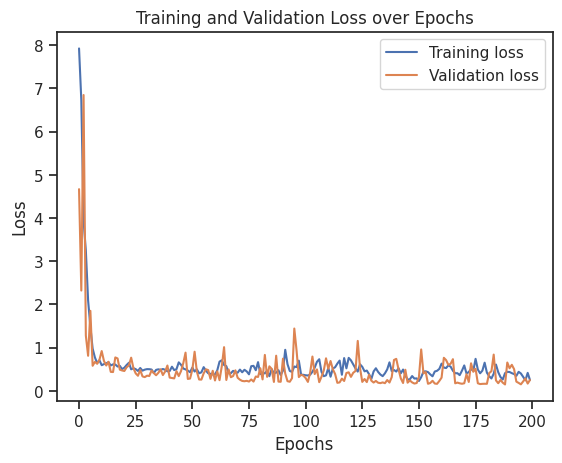

In [ ]:
# Plot training and validation loss
import matplotlib.pyplot as plt
plt.plot(train_loss_history_strade2, label='Training loss')
plt.plot(val_loss_history_strade2, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

#### **Đánh giá Classification_report**

In [ ]:
# Thiết lập dự đoán

test_strade2_predictions, test_strade2_actuals = get_predictions(model_strade2, test_strade2_loader)

In [ ]:
# Chuyển đổi test_allcol_predictions sang dạng nhị phân dựa trên threshold=0.5, test_allcol_actuals đã là dạng nhị phân rồi nên tha
predictions_strade2_binary = np.where(test_strade2_predictions >= 0.5, 1, 0)

In [ ]:
print(classification_report(test_strade2_actuals, predictions_strade2_binary))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       108
           1       0.78      1.00      0.88        35

    accuracy                           0.93       143
   macro avg       0.89      0.95      0.91       143
weighted avg       0.95      0.93      0.93       143



In [ ]:
# Lấy Accuracy
acc_pyt_strade2=accuracy_score(test_strade2_actuals, predictions_strade2_binary)
# Lấy F1 score
f1_pyt_strade2=f1_score(test_strade2_actuals, predictions_strade2_binary)

## **D. SimpleImputer & StandardScaler for all col**

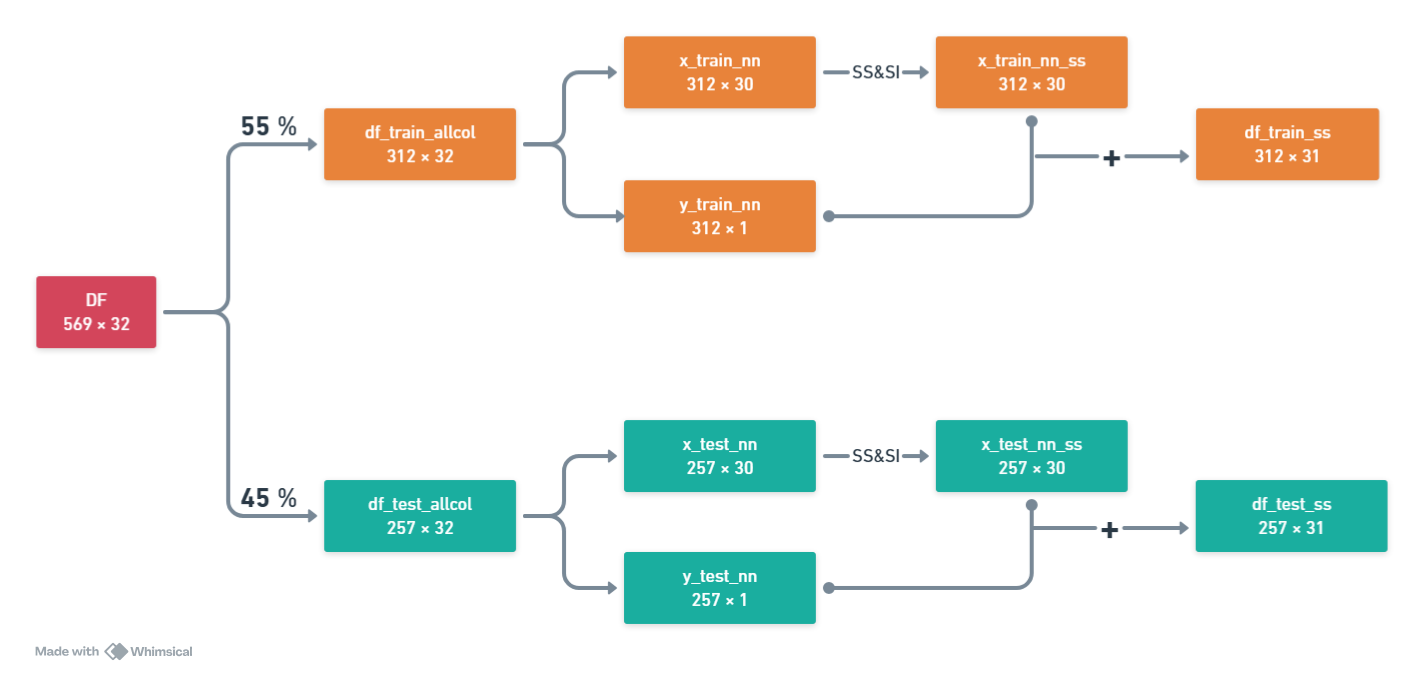

### **Chuẩn bị tập train và test**

In [ ]:
df_train_allcol

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
307     89346          0         9.00         14.40           56.36   
308    893526          0        13.50         12.71           85.69   
309    893548          0        13.05         13.84           82.71   
310    893783          0        11.70         19.11           74.33   
311  89382601          0        14.61         15.69           92.68   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760        0.300100   
1       1326.0          0.08474           0.07864        0.086900   
2       1203.0          0.10960           0.15990        0.197400   
3        386.1          0.14250           0.28390        0.241400   
4       1297.0          0.10030           0.13280        0.198000   
..         ...              ...               ...             ...   
307      246.3          0.07005           0.03116        0.003681   
308      566.2          0.07376           0.03614        0.002758   
309      530.6          0.08352           0.03735        0.004559   
310      418.7          0.08814           0.05253        0.015830   
311      664.9          0.07618           0.03515        0.014470   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0               0.147100  ...        25.380          17.33           184.60   
1               0.070170  ...        24.990          23.41           158.80   
2               0.127900  ...        23.570          25.53           152.50   
3               0.105200  ...        14.910          26.50            98.87   
4               0.104300  ...        22.540          16.67           152.20   
..                   ...  ...           ...            ...              ...   
307             0.003472  ...         9.699          20.07            60.90   
308             0.004419  ...        14.970          16.94            95.48   
309             0.008829  ...        14.730          17.40            93.96   
310             0.011480  ...        12.610          26.55            80.92   
311             0.018770  ...        16.460          21.75           103.70   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560          0.71190   
1        1956.0           0.12380            0.18660          0.24160   
2        1709.0           0.14440            0.42450          0.45040   
3         567.7           0.20980            0.86630          0.68690   
4        1575.0           0.13740            0.20500          0.40000   
..          ...               ...                ...              ...   
307       285.5           0.09861            0.05232          0.01472   
308       698.7           0.09023            0.05836          0.01379   
309       672.4           0.10160            0.05847          0.01824   
310       483.1           0.12230            0.10870          0.07915   
311       840.8           0.10110            0.07087          0.04746   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                 0.26540          0.4601                  0.11890  
1                 0.18600          0.2750                  0.08902  
2                 0.24300          0.3613                  0.08758  
3                 0.25750          0.6638                  0.17300  
4                 0.16250          0.2364                  0.07678  
..                    ...             ...                      ...  
307               0.

In [ ]:
df_test_allcol

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
312  89382602          0       12.760         13.37           82.29   
313    893988          0       11.540         10.72           73.73   
314    894047          0        8.597         18.60           54.09   
315    894089          0       12.490         16.85           79.19   
316    894090          0       12.180         14.08           77.25   
..        ...        ...          ...           ...             ...   
564    926424          1       21.560         22.39          142.00   
565    926682          1       20.130         28.25          131.20   
566    926954          1       16.600         28.08          108.30   
567    927241          1       20.600         29.33          140.10   
568     92751          0        7.760         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
312      504.1          0.08794           0.07948        0.040520   
313      409.1          0.08597           0.05969        0.013670   
314      221.2          0.10740           0.05847        0.000000   
315      481.6          0.08511           0.03834        0.004473   
316      461.4          0.07734           0.03212        0.011230   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590        0.243900   
565     1261.0          0.09780           0.10340        0.144000   
566      858.1          0.08455           0.10230        0.092510   
567     1265.0          0.11780           0.27700        0.351400   
568      181.0          0.05263           0.04362        0.000000   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
312             0.025480  ...        14.190          16.40            92.04   
313             0.008907  ...        12.340          12.87            81.23   
314             0.000000  ...         8.952          22.44            56.65   
315             0.006423  ...        13.340          19.71            84.48   
316             0.005051  ...        12.850          16.47            81.60   
..                   ...  ...           ...            ...              ...   
564             0.138900  ...        25.450          26.40           166.10   
565             0.097910  ...        23.690          38.25           155.00   
566             0.053020  ...        18.980          34.12           126.70   
567             0.152000  ...        25.740          39.42           184.60   
568             0.000000  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
312       618.8           0.11940            0.22080          0.17690   
313       467.8           0.10920            0.16260          0.08324   
314       240.1           0.13470            0.07767          0.00000   
315       544.2           0.11040            0.04953          0.01938   
316       513.1           0.10010            0.05332          0.04116   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130          0.41070   
565      1731.0           0.11660            0.19220          0.32150   
566      1124.0           0.11390            0.30940          0.34030   
567      1821.0           0.16500            0.86810          0.93870   
568       268.6           0.08996            0.06444          0.00000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
312               0.08411          0.2564                  0.08253  
313               0.04715          0.3390                  0.07434  
314               0.00000          0.3142                  0.08116  
315               0.02784          0.1917                  0.06174  
316               0.01852          0.2293                  0.06037  
..                    ...             ...                      ...  
564               0.

In [ ]:
x_train_nn, x_test_nn, y_train_nn, y_test_nn = df_train_allcol.drop(["id",tar_column],axis=1), df_test_allcol.drop(["id",tar_column], axis=1), df_train_allcol[tar_column], df_test_allcol[tar_column]

In [ ]:
x_train_nn

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
307         9.00         14.40           56.36      246.3          0.07005   
308        13.50         12.71           85.69      566.2          0.07376   
309        13.05         13.84           82.71      530.6          0.08352   
310        11.70         19.11           74.33      418.7          0.08814   
311        14.61         15.69           92.68      664.9          0.07618   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760        0.300100             0.147100         0.2419   
1             0.07864        0.086900             0.070170         0.1812   
2             0.15990        0.197400             0.127900         0.2069   
3             0.28390        0.241400             0.105200         0.2597   
4             0.13280        0.198000             0.104300         0.1809   
..                ...             ...                  ...            ...   
307           0.03116        0.003681             0.003472         0.1788   
308           0.03614        0.002758             0.004419         0.1365   
309           0.03735        0.004559             0.008829         0.1453   
310           0.05253        0.015830             0.011480         0.1936   
311           0.03515        0.014470             0.018770         0.1632   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
307                 0.06833  ...         9.699          20.07   
308                 0.05335  ...        14.970          16.94   
309                 0.05518  ...        14.730          17.40   
310                 0.06128  ...        12.610          26.55   
311                 0.05255  ...        16.460          21.75   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
307            60.90       285.5           0.09861            0.05232   
308            95.48       698.7           0.09023            0.05836   
309            93.96       672.4           0.10160            0.05847   
310            80.92       483.1           0.12230            0.10870   
311           103.70       840.8           0.10110            0.07087   

     concavity_worst  concave points_worst  symmetry_worst  \
0            0.71190               0.26540          0.4601   
1            0.24160               0.18600          0.2750   
2            0.45040               0.24300          0.3613   
3            0.68690               0.25750          0.6638   
4            0.40000               0.16250          0.2364   
..               ...                   ...             ...   
307          0.01472               0.01389         

In [ ]:
y_train_nn

0      1
1      1
2      1
3      1
4      1
      ..
307    0
308    0
309    0
310    0
311    0
Name: diagnosis, Length: 312, dtype: int64

In [ ]:
# Index của y_test_nn không bắt đầu từ 0 nên cần reset lại
y_test_nn=y_test_nn.reset_index(drop=True)
y_test_nn

0      0
1      0
2      0
3      0
4      0
      ..
252    1
253    1
254    1
255    1
256    0
Name: diagnosis, Length: 257, dtype: int64

### **Áp dụng SimpleImputer & StandardScaler**

#### **Thiết lập Pipeline SI&SS**

In [ ]:
# Gọi Pipeline
pipe3 = Pipeline([ ('imp', SimpleImputer()), ('ss', StandardScaler())])

In [ ]:
# Cho Pipe3 train với x_train_nn
pipe3.fit(x_train_nn)

Pipeline(steps=[('imp', SimpleImputer()), ('ss', StandardScaler())])

In [ ]:
# Áp dụng pipe3 để biến đổi
x_train_nn_ss = pipe3.transform(x_train_nn)
x_test_nn_ss = pipe3.transform(x_test_nn)

#### **Tạo tập train**

In [ ]:
# Đưa x_train_nn_ss về lại dạng Dataframe
df_train_ss=pd.DataFrame(x_train_nn_ss, columns=x_train_nn.columns)

In [ ]:
df_train_ss

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.014302     -2.086226        1.181752   0.909724         1.490274   
1       1.743749     -0.351506        1.595376   1.830900        -0.920306   
2       1.494946      0.465385        1.476613   1.482270         0.860057   
3      -0.843243      0.261162       -0.670139  -0.833142         3.216209   
4       1.664585     -1.156661        1.685473   1.748703         0.194032   
..           ...           ...             ...        ...              ...   
307    -1.527453     -1.142576       -1.539160  -1.229390        -1.972339   
308    -0.255161     -1.539285       -0.338011  -0.322669        -1.706645   
309    -0.382391     -1.274030       -0.460051  -0.423573        -1.007677   
310    -0.764078     -0.036956       -0.803236  -0.740741        -0.676813   
311     0.058670     -0.839763       -0.051750  -0.042915        -1.533335   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            2.972020        2.439260             2.381542       1.975148   
1           -0.544414       -0.131345             0.424974      -0.110956   
2            0.891781        1.200981             1.893227       0.772287   
3            3.083367        1.731500             1.315895       2.586888   
4            0.412814        1.208215             1.293006      -0.121266   
..                ...             ...                  ...            ...   
307         -1.383579       -1.134737            -1.271362      -0.193438   
308         -1.295562       -1.145866            -1.247277      -1.647181   
309         -1.274177       -1.124151            -1.135117      -1.344747   
310         -1.005884       -0.988253            -1.067694       0.315200   
311         -1.313060       -1.004651            -0.882287      -0.729570   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                  2.147945  ...      1.756164      -1.345335   
1                 -0.841825  ...      1.676612      -0.379949   
2                 -0.391460  ...      1.386961      -0.043334   
3                  4.688707  ...     -0.379501       0.110683   
4                 -0.548817  ...      1.176863      -1.450130   
..                      ...  ...           ...            ...   
307                0.739877  ...     -1.442439      -0.910276   
308               -1.292190  ...     -0.367263      -1.407259   
309               -1.043946  ...     -0.416218      -1.334220   
310               -0.216469  ...     -0.848654       0.118622   
311               -1.400711  ...     -0.063333      -0.643525   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           2.171786    1.900396          1.166586           2.300220   
1           1.414557    1.790089         -0.452636          -0.490903   
2           1.229652    1.357612          0.416010           0.895335   
3          -0.344387   -0.640709          3.173747           3.469694   
4           1.220847    1.122990          0.120839          -0.383687   
..               ...         ...               ...                ...   
307        -1.458805   -1.134817         -1.514828          -1.273350   
308        -0.443883   -0.411339         -1.868190          -1.238155   
309        -0.488495   -0.457388         -1.388748          -1.237514   
310        -0.871219   -0.788836         -0.515886          -0.944825   
311        -0.202627   -0.162533         -1.409832          -1.165259   

     concavity_worst  concave points_worst  symmetry_worst  \
0           1.915885              2.127333        2.342400   
1          -0.240186              0.944502       -0.349732   
2           0.717049              1.793638        0.905433   
3           1.801273              2.009646        5.305054   
4           0.485992              0.594420       -0.911138   
..               ...                   ...             ...   
307        -1.280308             -1.619439        0

In [ ]:
# Nối df_train_ss với cột y_train_nn
df_train_ss[tar_column]=y_train_nn
df_train_ss

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.014302     -2.086226        1.181752   0.909724         1.490274   
1       1.743749     -0.351506        1.595376   1.830900        -0.920306   
2       1.494946      0.465385        1.476613   1.482270         0.860057   
3      -0.843243      0.261162       -0.670139  -0.833142         3.216209   
4       1.664585     -1.156661        1.685473   1.748703         0.194032   
..           ...           ...             ...        ...              ...   
307    -1.527453     -1.142576       -1.539160  -1.229390        -1.972339   
308    -0.255161     -1.539285       -0.338011  -0.322669        -1.706645   
309    -0.382391     -1.274030       -0.460051  -0.423573        -1.007677   
310    -0.764078     -0.036956       -0.803236  -0.740741        -0.676813   
311     0.058670     -0.839763       -0.051750  -0.042915        -1.533335   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            2.972020        2.439260             2.381542       1.975148   
1           -0.544414       -0.131345             0.424974      -0.110956   
2            0.891781        1.200981             1.893227       0.772287   
3            3.083367        1.731500             1.315895       2.586888   
4            0.412814        1.208215             1.293006      -0.121266   
..                ...             ...                  ...            ...   
307         -1.383579       -1.134737            -1.271362      -0.193438   
308         -1.295562       -1.145866            -1.247277      -1.647181   
309         -1.274177       -1.124151            -1.135117      -1.344747   
310         -1.005884       -0.988253            -1.067694       0.315200   
311         -1.313060       -1.004651            -0.882287      -0.729570   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                  2.147945  ...      -1.345335         2.171786    1.900396   
1                 -0.841825  ...      -0.379949         1.414557    1.790089   
2                 -0.391460  ...      -0.043334         1.229652    1.357612   
3                  4.688707  ...       0.110683        -0.344387   -0.640709   
4                 -0.548817  ...      -1.450130         1.220847    1.122990   
..                      ...  ...            ...              ...         ...   
307                0.739877  ...      -0.910276        -1.458805   -1.134817   
308               -1.292190  ...      -1.407259        -0.443883   -0.411339   
309               -1.043946  ...      -1.334220        -0.488495   -0.457388   
310               -0.216469  ...       0.118622        -0.871219   -0.788836   
311               -1.400711  ...      -0.643525        -0.202627   -0.162533   

     smoothness_worst  compactness_worst  concavity_worst  \
0            1.166586           2.300220         1.915885   
1           -0.452636          -0.490903        -0.240186   
2            0.416010           0.895335         0.717049   
3            3.173747           3.469694         1.801273   
4            0.120839          -0.383687         0.485992   
..                ...                ...              ...   
307         -1.514828          -1.273350        -1.280308   
308         -1.868190          -1.238155        -1.284571   
309         -1.388748          -1.237514        -1.264170   
310         -0.515886          -0.944825        -0.984931   
311         -1.409832          -1.165259        -1.130212   

     concave points_worst  symmetry_worst  fractal_dimension_worst  diagnosis  
0                2.127333        2.342400                 1.677403          1  
1                0.944502       -0.349732                 0.184113          1  
2                1.793638        0.905433                 0.112147          1  
3                2.009646        5.305054                 4.381118          1  
4                0.594420       -0.911138        

#### **Tạo tập test**

In [ ]:
# Đưa x_test_nn_ss về lại dạng Dataframe
df_test_ss=pd.DataFrame(x_test_nn_ss, columns=x_test_nn.columns)

In [ ]:
df_test_ss

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0      -0.464383     -1.384357       -0.477251  -0.498684        -0.691136   
1      -0.809315     -2.006415       -0.827808  -0.767951        -0.832219   
2      -1.641393     -0.156673       -1.632124  -1.300533         0.702503   
3      -0.540720     -0.567466       -0.604205  -0.562458        -0.893808   
4      -0.628367     -1.217693       -0.683654  -0.619713        -1.450261   
..           ...           ...             ...        ...              ...   
252     2.023653      0.732987        1.968048   2.264562         0.960319   
253     1.619348      2.108557        1.525756   1.646665         0.014993   
254     0.621306      2.068651        0.587934   0.504689        -0.933913   
255     1.752231      2.362075        1.890237   1.658002         1.447305   
256    -1.878040      1.237676       -1.884803  -1.414476        -3.219882   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           -0.529568       -0.690560            -0.711630      -0.836109   
1           -0.879338       -1.014297            -1.133133      -0.038785   
2           -0.900900       -1.179120            -1.359666       1.095341   
3           -1.256679       -1.125188            -1.196309      -2.162693   
4           -1.366612       -1.043717            -1.231203      -0.588664   
..                ...             ...                  ...            ...   
252          0.114122        1.761643             2.172991      -0.406516   
253         -0.106804        0.557124             1.130488      -0.317161   
254         -0.126246       -0.063704            -0.011203      -0.873913   
255          2.961415        3.057797             2.506164       1.899539   
256         -1.163360       -1.179120            -1.359666      -0.884224   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                 -0.200191  ...     -0.526367      -1.493001   
1                 -0.254452  ...     -0.903729      -2.053496   
2                  1.453407  ...     -1.594811      -0.533966   
3                 -0.833686  ...     -0.699749      -0.967437   
4                 -0.866242  ...     -0.799699      -1.481886   
..                      ...  ...           ...            ...   
252               -0.901512  ...      1.770443       0.094805   
253               -1.023599  ...      1.411439       1.976355   
254               -0.867599  ...      0.450695       1.320591   
255                0.988120  ...      1.829597       2.162129   
256               -0.547460  ...     -1.492006       0.725164   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0          -0.544847   -0.551237         -0.638171          -0.291620   
1          -0.862121   -0.815625         -1.068277          -0.630751   
2          -1.583543   -1.214309          0.006987          -1.125636   
3          -0.766733   -0.681855         -1.017676          -1.289607   
4          -0.851261   -0.736309         -1.451999          -1.267523   
..               ...         ...               ...                ...   
252         1.628811    1.914404          0.272641          -0.346977   
253         1.303027    1.396132         -0.756240          -0.458272   
254         0.472423    0.333326         -0.870091           0.224650   
255         2.171786    1.553715          1.284655           3.480183   
256        -1.509874   -1.164408         -1.879575          -1.202727   

     concavity_worst  concave points_worst  symmetry_worst  \
0          -0.536800             -0.573364       -0.620254   
1          -0.966181             -1.123961        0.581097   
2          -1.347791             -1.826360        0.220401   
3          -1.258944             -1.411624       -1.561264   
4          -1.159095             -1.550465       -1.014402   
..               ...                   ...             ...   
252         0.535046              1.474840       -1

In [ ]:
# Nối df_test_ss với cột y_test_nn
df_test_ss[tar_column]=y_test_nn
df_test_ss

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0      -0.464383     -1.384357       -0.477251  -0.498684        -0.691136   
1      -0.809315     -2.006415       -0.827808  -0.767951        -0.832219   
2      -1.641393     -0.156673       -1.632124  -1.300533         0.702503   
3      -0.540720     -0.567466       -0.604205  -0.562458        -0.893808   
4      -0.628367     -1.217693       -0.683654  -0.619713        -1.450261   
..           ...           ...             ...        ...              ...   
252     2.023653      0.732987        1.968048   2.264562         0.960319   
253     1.619348      2.108557        1.525756   1.646665         0.014993   
254     0.621306      2.068651        0.587934   0.504689        -0.933913   
255     1.752231      2.362075        1.890237   1.658002         1.447305   
256    -1.878040      1.237676       -1.884803  -1.414476        -3.219882   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           -0.529568       -0.690560            -0.711630      -0.836109   
1           -0.879338       -1.014297            -1.133133      -0.038785   
2           -0.900900       -1.179120            -1.359666       1.095341   
3           -1.256679       -1.125188            -1.196309      -2.162693   
4           -1.366612       -1.043717            -1.231203      -0.588664   
..                ...             ...                  ...            ...   
252          0.114122        1.761643             2.172991      -0.406516   
253         -0.106804        0.557124             1.130488      -0.317161   
254         -0.126246       -0.063704            -0.011203      -0.873913   
255          2.961415        3.057797             2.506164       1.899539   
256         -1.163360       -1.179120            -1.359666      -0.884224   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 -0.200191  ...      -1.493001        -0.544847   -0.551237   
1                 -0.254452  ...      -2.053496        -0.862121   -0.815625   
2                  1.453407  ...      -0.533966        -1.583543   -1.214309   
3                 -0.833686  ...      -0.967437        -0.766733   -0.681855   
4                 -0.866242  ...      -1.481886        -0.851261   -0.736309   
..                      ...  ...            ...              ...         ...   
252               -0.901512  ...       0.094805         1.628811    1.914404   
253               -1.023599  ...       1.976355         1.303027    1.396132   
254               -0.867599  ...       1.320591         0.472423    0.333326   
255                0.988120  ...       2.162129         2.171786    1.553715   
256               -0.547460  ...       0.725164        -1.509874   -1.164408   

     smoothness_worst  compactness_worst  concavity_worst  \
0           -0.638171          -0.291620        -0.536800   
1           -1.068277          -0.630751        -0.966181   
2            0.006987          -1.125636        -1.347791   
3           -1.017676          -1.289607        -1.258944   
4           -1.451999          -1.267523        -1.159095   
..                ...                ...              ...   
252          0.272641          -0.346977         0.535046   
253         -0.756240          -0.458272         0.126112   
254         -0.870091           0.224650         0.212300   
255          1.284655           3.480183         2.955640   
256         -1.879575          -1.202727        -1.347791   

     concave points_worst  symmetry_worst  fractal_dimension_worst  diagnosis  
0               -0.573364       -0.620254                -0.140233          0  
1               -1.123961        0.581097                -0.549539          0  
2               -1.826360        0.220401                -0.208701          0  
3               -1.411624       -1.561264                -1.179239          0  
4               -1.550465       -1.014402        

### **KERAS TENSORFLOW NN**

#### **Chuyển DF sang dạng tf.data.tensorflow**

In [ ]:
# Áp dụng hàm df_to_dataset lên tập train và lên tập test
train_ds_ss = df_to_dataset(df_train_ss, batch_size=60)
test_ds_ss = df_to_dataset(df_test_ss, shuffle=False, batch_size=60)

#### **Khởi tạo all_inputs và encoded_features**

In [ ]:
column_names

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [ ]:
all_inputs_ss = {} #lưu trữ các đầu vào (inputs) của mô hình
encoded_features_ss = []  #lưu trữ các đặc trưng đã được Normailze hóa

for header in column_names:
    numeric_col_ss = tf.keras.Input(shape=(1,), name=header)                   #tạo input layer cho mỗi cột numeric
    normalization_layer_ss = get_normalization_layer(header, train_ds_ss)    #tạo layer chuẩn hóa cột numeric bằng hàm đã tạo trc đó
    encoded_numeric_col_ss = normalization_layer_ss(numeric_col_ss)        #áp dụng chuẩn hóa lên input
    all_inputs_ss[header] = numeric_col_ss                                  #Lưu input vào "all_inputs"
    encoded_features_ss.append(encoded_numeric_col_ss)                       #thêm feature đã chuẩn hóa vào list

In [ ]:
all_inputs_ss

{'diagnosis': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=diagnosis>,
 'radius_mean': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=radius_mean>,
 'texture_mean': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=texture_mean>,
 'perimeter_mean': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=perimeter_mean>,
 'area_mean': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=area_mean>,
 'smoothness_mean': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=smoothness_mean>,
 'compactness_mean': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=compactness_mean>,
 'concavity_mean': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=concavity_mean>,
 'concave points_mean': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=concave points_mean>,
 'symmetry_mean': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=symmetry_mean>,
 'fractal_dimens

In [ ]:
encoded_features_ss

[<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_88>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_89>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_90>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_91>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_92>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_93>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_94>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_95>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_96>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_97>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_98>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_99>,
 <Ke

#### **Tạo và train cho model**

##### **Setup các Layer cho Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#Kết hợp tất cả features đã được encode vào một tensor duy nhất
all_features_ss = tf.keras.layers.concatenate(encoded_features_ss)
all_features_ss

<KerasTensor shape=(None, 31), dtype=float32, sparse=False, name=keras_tensor_119>

In [ ]:
# tạo Dense Layer đầu tiên
# Vì df_train_ss và df_test_ss đều có giá trị âm xuất hiện nên phải dùng hàm activation không phải là reLU
x3 = tf.keras.layers.Dense(128, activation="tanh")(all_features_ss) # 128 Neural và hàm kích hoạt Relu để truyền thông tin
x3 = tf.keras.layers.LayerNormalization()(x3) # áp dụng LayerNormalization:chuẩn hóa dữ liệu trong mỗi lớp để có giá trị trung bình bằng 0 và độ lệch chuẩn bằng 1
x3

<KerasTensor shape=(None, 128), dtype=float32, sparse=False, name=keras_tensor_121>

In [ ]:
# Tạo Lớp Dense thứ 2
x3 = tf.keras.layers.Dense(78, activation="tanh")(x3)
x3 = tf.keras.layers.LayerNormalization()(x3)
x3 = tf.keras.layers.Dropout(0.4)(x3)
x3

<KerasTensor shape=(None, 78), dtype=float32, sparse=False, name=keras_tensor_124>

In [ ]:
#Thêm  lớp Dense Layer thứ 3
x3 = tf.keras.layers.Dense(70, activation="tanh")(x3)
x3 = tf.keras.layers.LayerNormalization()(x3)
x3 = tf.keras.layers.Dropout(0.3)(x3)
x3

<KerasTensor shape=(None, 70), dtype=float32, sparse=False, name=keras_tensor_127>

In [ ]:
#Thêm  lớp Dense Layer thứ 4
x3 = tf.keras.layers.Dense(40, activation="tanh")(x3)
x3 = tf.keras.layers.LayerNormalization()(x3)
x3 = tf.keras.layers.Dropout(0.3)(x3)
x3

<KerasTensor shape=(None, 40), dtype=float32, sparse=False, name=keras_tensor_130>

In [ ]:
#Output Layer
output_ss = tf.keras.layers.Dense(1)(x3)
output_ss

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_131>

##### **Xác định Weight_decay & Learning Rate**

In [ ]:
#Xác định Weight Decay
weight_decay = 1e-4
#xác định learning rate schedule
LR_Sche= tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.02,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True
    )
#Xác định optimizer bởi weight decay và learning rate schedule
optimizer = tf.keras.optimizers.AdamW(learning_rate=LR_Sche, weight_decay=weight_decay)

##### **Gọi tên và tổng hợp vào Model**

In [ ]:
# Xác định CustomLoggingCallback: là 1 lớp tùy chỉnh để theo dõi và ghi lại quá trình training sau mỗi epoch
class CustomLoggingCallback(tf.keras.callbacks.Callback):
    def __init__(self, log_interval=10):
        super(CustomLoggingCallback, self).__init__()
        self.log_interval = log_interval

    def on_epoch_end(self, epoch, logs=None):
        # Only log at the specified interval
        if (epoch + 1) % self.log_interval == 0:
            logs = logs or {}
            print(f"Epoch {epoch + 1}:", end=" ")
            for key, value in logs.items():
                print(f"{key}: {value:.4f}", end=", ")
            print()

In [ ]:
model_krtf_ss = tf.keras.Model(inputs=all_inputs_ss, outputs=output_ss)

In [ ]:
# Kết hơp mô hình và chọn hàm loss kèm metric phù hợp với tính chất bài toán

model_krtf_ss.compile(optimizer=optimizer,
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=["accuracy"])  # Dùng Precision: metrics=[Precision()]
                                         # Dùng Recall: metrics=[Recall()]

##### **Train Model với Epoch**

In [ ]:
history_ss = model_krtf_ss.fit(train_ds_ss,
                              validation_data=test_ds_ss,
                              epochs=1500,
                              callbacks=[CustomLoggingCallback(log_interval=10)],
                              verbose=0)

Epoch 10: accuracy: 0.9679, loss: 0.5160, val_accuracy: 1.0000, val_loss: 0.0000, 
Epoch 20: accuracy: 0.9679, loss: 0.5166, val_accuracy: 0.9883, val_loss: 0.1875, 
Epoch 30: accuracy: 0.9840, loss: 0.2577, val_accuracy: 0.9922, val_loss: 0.1241, 
Epoch 40: accuracy: 0.9679, loss: 0.5127, val_accuracy: 0.9572, val_loss: 0.6253, 
Epoch 50: accuracy: 0.9840, loss: 0.1656, val_accuracy: 0.9844, val_loss: 0.1898, 
Epoch 60: accuracy: 0.9808, loss: 0.3083, val_accuracy: 0.9883, val_loss: 0.1861, 
Epoch 70: accuracy: 0.9808, loss: 0.3084, val_accuracy: 0.9844, val_loss: 0.2481, 
Epoch 80: accuracy: 0.9776, loss: 0.3594, val_accuracy: 0.9805, val_loss: 0.3102, 
Epoch 90: accuracy: 0.9199, loss: 1.2859, val_accuracy: 0.8833, val_loss: 1.8637, 
Epoch 100: accuracy: 0.7692, loss: 3.6631, val_accuracy: 0.8521, val_loss: 2.3682, 
Epoch 110: accuracy: 0.8590, loss: 2.1846, val_accuracy: 0.9728, val_loss: 0.4390, 
Epoch 120: accuracy: 0.9551, loss: 0.7234, val_accuracy: 0.9961, val_loss: 0.0627, 
E

#### **Vizulaize LOSS value và hiệu suất Model**



In [ ]:
# Extract loss data from history
train_loss_ss = history_ss.history['loss']
val_loss_ss = history_ss.history['val_loss']

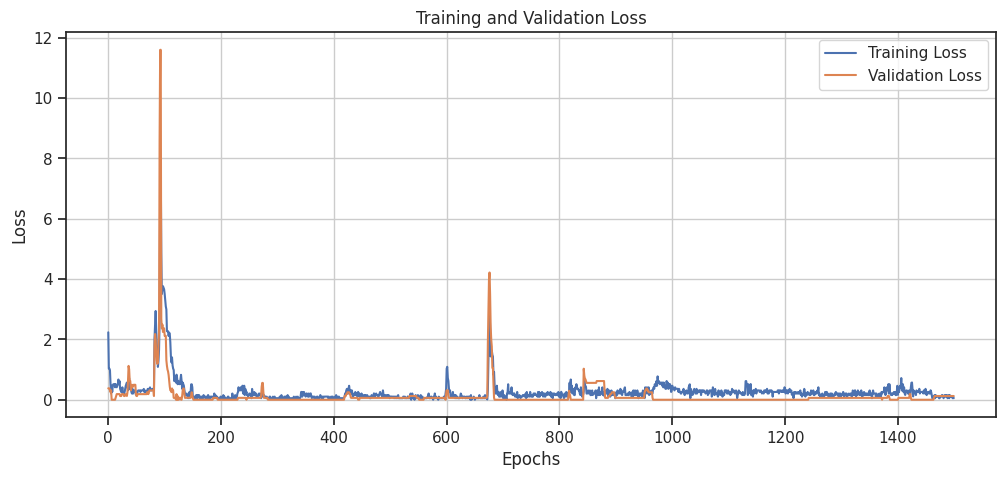

In [ ]:
# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 1, 1)
plt.plot(train_loss_ss, label='Training Loss')
plt.plot(val_loss_ss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#### TÔNG HỢP KẾT QUẢ
# evaluate() tính trung bình cộng trên tất cả các batch của tập test_ds sau khi đã tính loss và metrics trên từng batch riêng lẻ
# Giá trị từ evaluate() phản ánh hiệu suất thực tế của mô hình trên toàn bộ tập test

result_ss = model_krtf_ss.evaluate(test_ds_ss, return_dict=True)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9960 - loss: 0.0635     


In [ ]:
# Đánh giá kết quả
print("Giá trị accuracy trung bình sau khi train là: ", result_ss['accuracy'])
print("Giá trị loss trung bình sau khi train là: ", result_ss['loss'])

Giá trị accuracy trung bình sau khi train là:  0.9922178983688354
Giá trị loss trung bình sau khi train là:  0.12406536936759949


#### **Đánh giá Classification_report**

In [ ]:
import numpy as np

# Khởi tạo các danh sách để lưu trữ dữ liệu
test_images_ss_list = []
test_labels_ss_list = []

# Lặp qua từng batch trong test_ds_ss
for x, y in test_ds_ss:
    # Trích xuất dữ liệu từ dict
    x_dict = {key: value.numpy() for key, value in x.items()}
    test_images_ss_list.append(x_dict)
    test_labels_ss_list.append(y.numpy())

# Ghép các batch lại thành một mảng numpy
test_images_ss = {key: np.concatenate([batch[key] for batch in test_images_ss_list], axis=0) for key in test_images_ss_list[0]}
test_labels_ss = np.concatenate(test_labels_ss_list, axis=0)

In [ ]:
predicted_ss_labels = model_krtf_ss.predict(test_images_ss)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


In [ ]:
# Chuyển về giá tị nhị phân
predicted_ss_binary = (predicted_ss_labels > 0).astype(int)

In [ ]:
print(classification_report(test_labels_ss, predicted_ss_binary))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       193
           1       0.97      1.00      0.98        64

    accuracy                           0.99       257
   macro avg       0.98      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



In [ ]:
# Lấy Accuracy
acc_krtf_ss=accuracy_score(test_labels_ss, predicted_ss_binary)
# Lấy F1 score
f1_krtf_ss=f1_score(test_labels_ss, predicted_ss_binary)

### **PYTORCH NN**

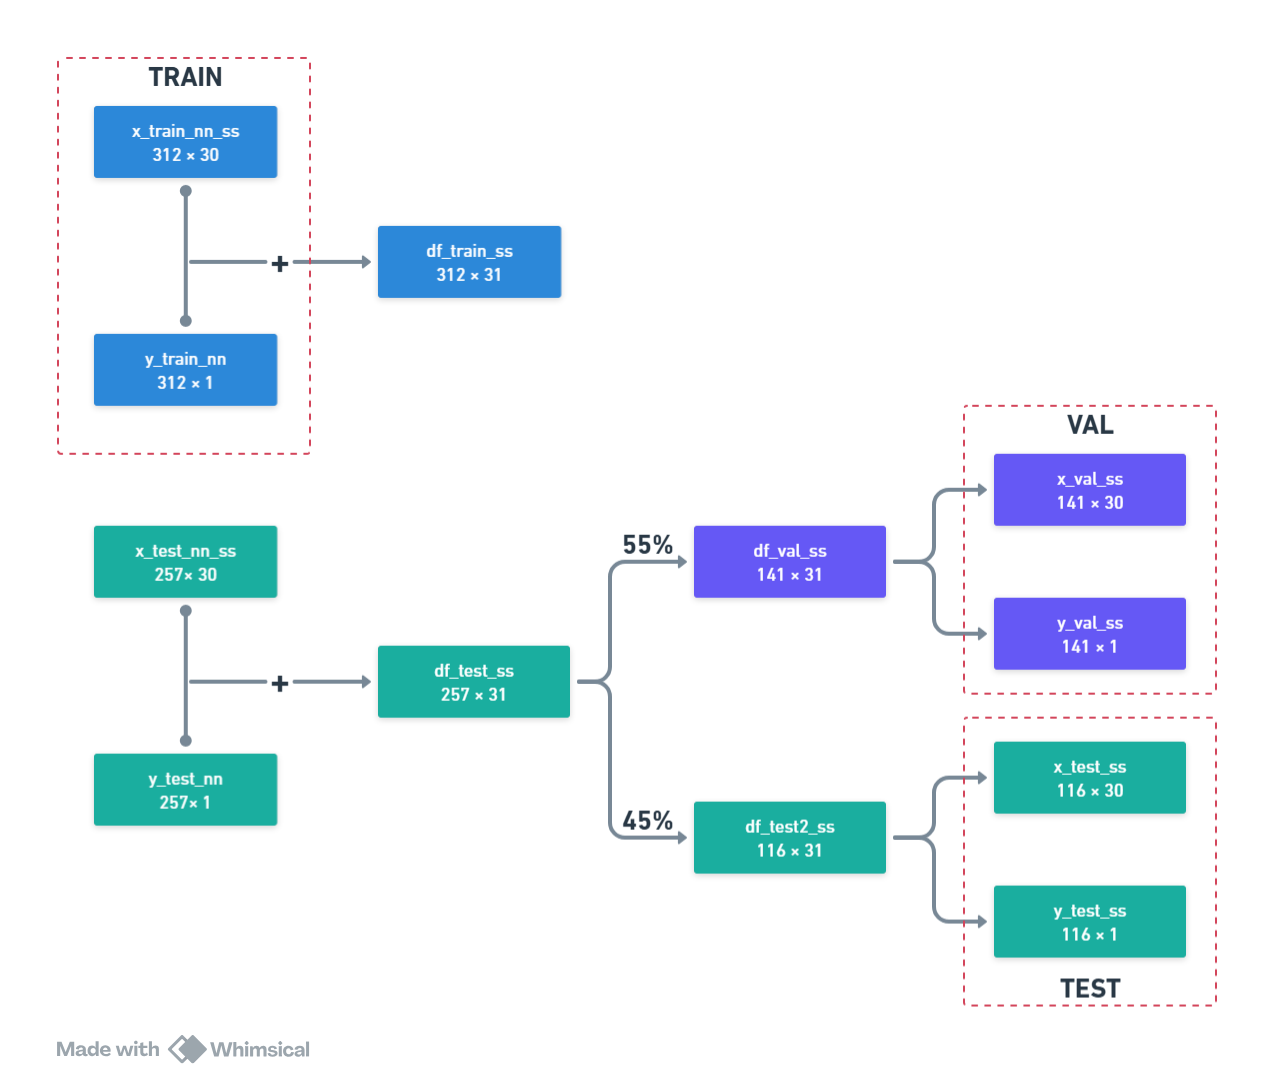

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

#### **Setup Hyper Parameter and Complile Model**

In [ ]:
#Chuẩn bị các Hyper Parameter
input_size_ss = 30     #### Đại diện cho số lượng cột (columns) trong dữ liệu đầu vào (x_train, x_val, x_test)

hidden_size_ss = 300   #### là số lượng đơn vị ẩn (hidden units, như Neural) trong mỗi lớp, quyết định sức mạnh biểu diễn của mô hình.
                         #### Mỗi đơn vị ẩn là một "bộ não" nhỏ giúp mô hình học các mối quan hệ phức tạp trong dữ liệu.
                         #### bé thì không đủ khả năng học, lớn thì dẽ bị overfit

output_size = 1          # Số chiều đầu ra

num_layers_ss = 25     #### Số lớp  xếp chồng
                         #### bé thì mô hình có thể không đủ độ sâu để học các mối quan hệ phức tạp trong dữ liệu, lớn wa thì overfit

dropout_rate_ss = 0.4  # Tỷ lệ dropout

#Khởi tạo model và các thành phần/ Đây là một mô hình phức hợp được thiết kế cho bài toán regression, với nhiều tính năng như:
model_ss = PYModel(input_size_ss, output_size,  dropout_rate_ss)
criterion = nn.BCEWithLogitsLoss() # Sử dụng MSE làm hàm loss cho bài toán regression
optimizer = optim.Adam(model_ss.parameters(), lr=0.02, weight_decay=1e-6)  #Sử dụng Adam optimizer với learning rate 0.001 và L2 regularization
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, min_lr=1e-5) #Sử dụng ReduceLROnPlateau để điều chỉnh learning rate
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #Kiểm tra và sử dụng GPU nếu có, ngược lại sử dụng CPU
model_ss.to(device)

PYModel(
  (fc1): Linear(in_features=30, out_features=100, bias=True)
  (dropout): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=100, out_features=1, bias=True)
)

#### **Chuẩn bị dữ liệu Train, Test, Validation**

In [ ]:
df_train_ss

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.014302     -2.086226        1.181752   0.909724         1.490274   
1       1.743749     -0.351506        1.595376   1.830900        -0.920306   
2       1.494946      0.465385        1.476613   1.482270         0.860057   
3      -0.843243      0.261162       -0.670139  -0.833142         3.216209   
4       1.664585     -1.156661        1.685473   1.748703         0.194032   
..           ...           ...             ...        ...              ...   
307    -1.527453     -1.142576       -1.539160  -1.229390        -1.972339   
308    -0.255161     -1.539285       -0.338011  -0.322669        -1.706645   
309    -0.382391     -1.274030       -0.460051  -0.423573        -1.007677   
310    -0.764078     -0.036956       -0.803236  -0.740741        -0.676813   
311     0.058670     -0.839763       -0.051750  -0.042915        -1.533335   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            2.972020        2.439260             2.381542       1.975148   
1           -0.544414       -0.131345             0.424974      -0.110956   
2            0.891781        1.200981             1.893227       0.772287   
3            3.083367        1.731500             1.315895       2.586888   
4            0.412814        1.208215             1.293006      -0.121266   
..                ...             ...                  ...            ...   
307         -1.383579       -1.134737            -1.271362      -0.193438   
308         -1.295562       -1.145866            -1.247277      -1.647181   
309         -1.274177       -1.124151            -1.135117      -1.344747   
310         -1.005884       -0.988253            -1.067694       0.315200   
311         -1.313060       -1.004651            -0.882287      -0.729570   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                  2.147945  ...      -1.345335         2.171786    1.900396   
1                 -0.841825  ...      -0.379949         1.414557    1.790089   
2                 -0.391460  ...      -0.043334         1.229652    1.357612   
3                  4.688707  ...       0.110683        -0.344387   -0.640709   
4                 -0.548817  ...      -1.450130         1.220847    1.122990   
..                      ...  ...            ...              ...         ...   
307                0.739877  ...      -0.910276        -1.458805   -1.134817   
308               -1.292190  ...      -1.407259        -0.443883   -0.411339   
309               -1.043946  ...      -1.334220        -0.488495   -0.457388   
310               -0.216469  ...       0.118622        -0.871219   -0.788836   
311               -1.400711  ...      -0.643525        -0.202627   -0.162533   

     smoothness_worst  compactness_worst  concavity_worst  \
0            1.166586           2.300220         1.915885   
1           -0.452636          -0.490903        -0.240186   
2            0.416010           0.895335         0.717049   
3            3.173747           3.469694         1.801273   
4            0.120839          -0.383687         0.485992   
..                ...                ...              ...   
307         -1.514828          -1.273350        -1.280308   
308         -1.868190          -1.238155        -1.284571   
309         -1.388748          -1.237514        -1.264170   
310         -0.515886          -0.944825        -0.984931   
311         -1.409832          -1.165259        -1.130212   

     concave points_worst  symmetry_worst  fractal_dimension_worst  diagnosis  
0                2.127333        2.342400                 1.677403          1  
1                0.944502       -0.349732                 0.184113          1  
2                1.793638        0.905433                 0.112147          1  
3                2.009646        5.305054                 4.381118          1  
4                0.594420       -0.911138        

In [ ]:
df_test_ss

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0      -0.464383     -1.384357       -0.477251  -0.498684        -0.691136   
1      -0.809315     -2.006415       -0.827808  -0.767951        -0.832219   
2      -1.641393     -0.156673       -1.632124  -1.300533         0.702503   
3      -0.540720     -0.567466       -0.604205  -0.562458        -0.893808   
4      -0.628367     -1.217693       -0.683654  -0.619713        -1.450261   
..           ...           ...             ...        ...              ...   
252     2.023653      0.732987        1.968048   2.264562         0.960319   
253     1.619348      2.108557        1.525756   1.646665         0.014993   
254     0.621306      2.068651        0.587934   0.504689        -0.933913   
255     1.752231      2.362075        1.890237   1.658002         1.447305   
256    -1.878040      1.237676       -1.884803  -1.414476        -3.219882   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           -0.529568       -0.690560            -0.711630      -0.836109   
1           -0.879338       -1.014297            -1.133133      -0.038785   
2           -0.900900       -1.179120            -1.359666       1.095341   
3           -1.256679       -1.125188            -1.196309      -2.162693   
4           -1.366612       -1.043717            -1.231203      -0.588664   
..                ...             ...                  ...            ...   
252          0.114122        1.761643             2.172991      -0.406516   
253         -0.106804        0.557124             1.130488      -0.317161   
254         -0.126246       -0.063704            -0.011203      -0.873913   
255          2.961415        3.057797             2.506164       1.899539   
256         -1.163360       -1.179120            -1.359666      -0.884224   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 -0.200191  ...      -1.493001        -0.544847   -0.551237   
1                 -0.254452  ...      -2.053496        -0.862121   -0.815625   
2                  1.453407  ...      -0.533966        -1.583543   -1.214309   
3                 -0.833686  ...      -0.967437        -0.766733   -0.681855   
4                 -0.866242  ...      -1.481886        -0.851261   -0.736309   
..                      ...  ...            ...              ...         ...   
252               -0.901512  ...       0.094805         1.628811    1.914404   
253               -1.023599  ...       1.976355         1.303027    1.396132   
254               -0.867599  ...       1.320591         0.472423    0.333326   
255                0.988120  ...       2.162129         2.171786    1.553715   
256               -0.547460  ...       0.725164        -1.509874   -1.164408   

     smoothness_worst  compactness_worst  concavity_worst  \
0           -0.638171          -0.291620        -0.536800   
1           -1.068277          -0.630751        -0.966181   
2            0.006987          -1.125636        -1.347791   
3           -1.017676          -1.289607        -1.258944   
4           -1.451999          -1.267523        -1.159095   
..                ...                ...              ...   
252          0.272641          -0.346977         0.535046   
253         -0.756240          -0.458272         0.126112   
254         -0.870091           0.224650         0.212300   
255          1.284655           3.480183         2.955640   
256         -1.879575          -1.202727        -1.347791   

     concave points_worst  symmetry_worst  fractal_dimension_worst  diagnosis  
0               -0.573364       -0.620254                -0.140233          0  
1               -1.123961        0.581097                -0.549539          0  
2               -1.826360        0.220401                -0.208701          0  
3               -1.411624       -1.561264                -1.179239          0  
4               -1.550465       -1.014402        

In [ ]:
# Tách từ tập Test ra tập Validation theo tỉ lệ của 55 %
df_val_ss = df_test_ss.iloc[:(int(len(df_test_ss) * 0.55))]
df_test2_ss = df_test_ss.iloc[(int(len(df_test_ss) * 0.55)):]

In [ ]:
df_val_ss

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0      -0.464383     -1.384357       -0.477251  -0.498684        -0.691136   
1      -0.809315     -2.006415       -0.827808  -0.767951        -0.832219   
2      -1.641393     -0.156673       -1.632124  -1.300533         0.702503   
3      -0.540720     -0.567466       -0.604205  -0.562458        -0.893808   
4      -0.628367     -1.217693       -0.683654  -0.619713        -1.450261   
..           ...           ...             ...        ...              ...   
136     0.036052      0.017034        0.012546  -0.057653        -0.981895   
137     1.893597      0.294025        1.808331   1.995295        -0.053758   
138    -0.716014      0.533459       -0.700854  -0.703044        -2.253072   
139     1.466673      1.345655        1.382421   1.448258         0.401717   
140    -0.679258      2.103862       -0.703311  -0.673283        -0.946804   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           -0.529568       -0.690560            -0.711630      -0.836109   
1           -0.879338       -1.014297            -1.133133      -0.038785   
2           -0.900900       -1.179120            -1.359666       1.095341   
3           -1.256679       -1.125188            -1.196309      -2.162693   
4           -1.366612       -1.043717            -1.231203      -0.588664   
..                ...             ...                  ...            ...   
136         -0.555726       -0.116032            -0.615748      -1.276012   
137          0.142400        0.716280             1.577856      -0.997636   
138         -0.053782       -0.120855            -0.752832      -1.702169   
139         -0.189696        0.816355             0.945335      -0.623031   
140         -0.794326       -0.690198            -0.864992      -0.787995   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 -0.200191  ...      -1.493001        -0.544847   -0.551237   
1                 -0.254452  ...      -2.053496        -0.862121   -0.815625   
2                  1.453407  ...      -0.533966        -1.583543   -1.214309   
3                 -0.833686  ...      -0.967437        -0.766733   -0.681855   
4                 -0.866242  ...      -1.481886        -0.851261   -0.736309   
..                      ...  ...            ...              ...         ...   
136               -0.734660  ...       0.410779        -0.073487   -0.180568   
137               -0.849964  ...       0.995091         1.690446    1.905649   
138                0.440086  ...       0.377435        -0.795203   -0.746639   
139               -1.216224  ...       0.818845         0.856907    0.853348   
140               -0.249026  ...       1.917606        -0.749417   -0.717749   

     smoothness_worst  compactness_worst  concavity_worst  \
0           -0.638171          -0.291620        -0.536800   
1           -1.068277          -0.630751        -0.966181   
2            0.006987          -1.125636        -1.347791   
3           -1.017676          -1.289607        -1.258944   
4           -1.451999          -1.267523        -1.159095   
..                ...                ...              ...   
136         -1.080927          -0.034651         0.384676   
137          0.095539           0.228729         0.668912   
138         -1.685184           0.402373         0.127488   
139          0.770214          -0.503140         0.475448   
140         -0.579137          -0.496730        -0.517545   

     concave points_worst  symmetry_worst  fractal_dimension_worst  diagnosis  
0               -0.573364       -0.620254                -0.140233          0  
1               -1.123961        0.581097                -0.549539          0  
2               -1.826360        0.220401                -0.208701          0  
3               -1.411624       -1.561264                -1.179239          0  
4               -1.550465       -1.014402        

In [ ]:
df_test2_ss

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
141     0.036052     -1.241167       -0.003426  -0.101587         0.881542   
142    -0.503965     -0.497044       -0.545643  -0.530430        -0.842245   
143    -0.289089      2.688362       -0.311392  -0.348178        -0.368150   
144    -0.783869      2.352685       -0.781122  -0.750945        -0.287941   
145    -0.337154      1.404340       -0.403126  -0.402882        -0.693285   
..           ...           ...             ...        ...              ...   
252     2.023653      0.732987        1.968048   2.264562         0.960319   
253     1.619348      2.108557        1.525756   1.646665         0.014993   
254     0.621306      2.068651        0.587934   0.504689        -0.933913   
255     1.752231      2.362075        1.890237   1.658002         1.447305   
256    -1.878040      1.237676       -1.884803  -1.414476        -3.219882   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
141         -0.300865       -0.347772             0.292214      -0.667709   
142         -0.974601       -0.821502            -0.781826      -0.155634   
143         -0.621827       -0.839226            -0.529530      -1.612813   
144         -0.418928       -0.315821            -0.846680      -0.155634   
145         -1.014368       -0.844893            -0.833709      -0.774248   
..                ...             ...                  ...            ...   
252          0.114122        1.761643             2.172991      -0.406516   
253         -0.106804        0.557124             1.130488      -0.317161   
254         -0.126246       -0.063704            -0.011203      -0.873913   
255          2.961415        3.057797             2.506164       1.899539   
256         -1.163360       -1.179120            -1.359666      -0.884224   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
141               -0.225965  ...      -1.408847        -0.220237   -0.321692   
142               -0.626138  ...      -0.580012        -0.557174   -0.525498   
143               -0.368400  ...       2.509858        -0.408370   -0.399257   
144               -0.164922  ...       2.065272        -0.720947   -0.710570   
145               -0.954416  ...       1.338057        -0.566860   -0.526549   
..                      ...  ...            ...              ...         ...   
252               -0.901512  ...       0.094805         1.628811    1.914404   
253               -1.023599  ...       1.976355         1.303027    1.396132   
254               -0.867599  ...       1.320591         0.472423    0.333326   
255                0.988120  ...       2.162129         2.171786    1.553715   
256               -0.547460  ...       0.725164        -1.509874   -1.164408   

     smoothness_worst  compactness_worst  concavity_worst  \
141          0.006987          -0.716990        -0.718345   
142         -0.507453          -0.694265        -0.482704   
143         -0.730939          -0.750204        -1.026741   
144          0.255774          -0.394758        -0.007754   
145         -0.237583          -0.958810        -0.710551   
..                ...                ...              ...   
252          0.272641          -0.346977         0.535046   
253         -0.756240          -0.458272         0.126112   
254         -0.870091           0.224650         0.212300   
255          1.284655           3.480183         2.955640   
256         -1.879575          -1.202727        -1.347791   

     concave points_worst  symmetry_worst  fractal_dimension_worst  diagnosis  
141             -0.233859       -0.559169                -0.361628          0  
142             -0.358846        0.406566                -0.601514          0  
143             -0.669897       -1.155481                -0.429096          0  
144             -0.808142       -0.154840                -0.656488          0  
145             -0.931788       -0.794785        

In [ ]:
# Vì dữ liệu của df_train_ss đã có sẵn x_train_nn_ss và y_train_nn nên chỉ cần tách x và y cho tập test và val
x_test_ss, x_val_ss= df_test2_ss.drop(tar_column,axis=1), df_val_ss.drop(tar_column, axis=1)

In [ ]:
y_test_ss, y_val_ss= df_test2_ss[tar_column], df_val_ss[tar_column]

In [ ]:
x_train_nn_ss.shape

(312, 30)

#### **Chuyển train, test, validation thành Tensor và tạo Dataloader**

In [ ]:
# chuyển dữ liệu Numpy Array full numeric sang torch.tensor (dạng array dùng cho Pytorch)
# Thêm .values để chắc chắn dữ liệu Dataframe (hoặc series) thành dạng Numpy
x_train_ss_tensor = torch.tensor(x_train_nn_ss, dtype=torch.float32)
y_train_ss_tensor = torch.tensor(y_train_nn.values, dtype=torch.float32)
x_test_ss_tensor  = torch.tensor(x_test_ss.values, dtype=torch.float32)
y_test_ss_tensor  = torch.tensor(y_test_ss.values, dtype=torch.float32)
x_val_ss_tensor   = torch.tensor(x_val_ss.values, dtype=torch.float32)
y_val_ss_tensor   = torch.tensor(y_val_ss.values, dtype=torch.float32)

In [ ]:
# khởi tạo Dataloader
train_ss_loader = torch.utils.data.DataLoader(
    list(zip(x_train_ss_tensor, y_train_ss_tensor)), batch_size=40, shuffle=True)
val_ss_loader = torch.utils.data.DataLoader(
    list(zip(x_val_ss_tensor, y_val_ss_tensor)), batch_size=40, shuffle=False)
test_ss_loader = torch.utils.data.DataLoader(
    list(zip(x_test_ss_tensor, y_test_ss_tensor)), batch_size=40, shuffle=True)


#### **Áp dụng kỹ thuật Pruning**

In [ ]:
import torch.nn.utils.prune as prune

In [ ]:
# Chọn các lớp và tham số cần prune:
# Các lớp phải được xác dịnh sẵn cấu trúc trong PYMODEL
parameters_to_prune = (
    (model_ss.fc1, 'weight'),
    (model_ss.fc2, 'weight'),
)

In [ ]:
# Áp dụng pruning theo chuẩn L1-Unstructure
prune.global_unstructured(
    parameters_to_prune,
    pruning_method=prune.L1Unstructured,
    amount=0.5,  # Tỷ lệ trọng số cần prune
)

In [ ]:
# Sử dụng mô hình sau khi áp dụng Pruning
# loại bỏ các mask pruning và cố định các trọng số đã prune
for module, _ in parameters_to_prune:
    prune.remove(module, 'weight')

#### **Train Model**

In [ ]:
# Lists to store loss history
train_loss_history_ss = []
val_loss_history_ss = []
num_epochs_ss= 200

for epoch in range(num_epochs_ss):
    model_ss.train()
    running_loss = 0.0
        #LẤY DATA RA
    for i, (inputs, targets) in enumerate(train_ss_loader):
        inputs, targets = inputs.float().to(device), targets.float().to(device)
        #inputs = inputs.unsqueeze(1)
        targets = targets.unsqueeze(1)

        # ĐI QUA MODEL ĐỂ CHẠY RA OUTPUT VÀ DỰA TRÊN HÀM LOSS ĐỂ TÍNH TOÁN OUTPUT ĐÓ
        # Check lại xem input_size có bằng số Feature (cột) của x_train_allcol hay không
        outputs = model_ss(inputs)
        loss = criterion(outputs, targets)

        # TÍNH RADIENT
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation
    model_ss.eval()
    val_running_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_ss_loader:
            inputs, targets = inputs.float().to(device), targets.float().to(device)
            #inputs = inputs.unsqueeze(1)
            targets = targets.unsqueeze(1)

            outputs = model_ss(inputs)
            loss = criterion(outputs, targets)

            val_running_loss += loss.item()

    # Tính avarage train loss và avarage val loss cho mỗi epoch
    avg_train_loss_ss = running_loss / len(train_ss_loader)
    train_loss_history_ss.append(avg_train_loss_ss)
    avg_val_loss_ss = val_running_loss / len(val_ss_loader)
    val_loss_history_ss.append(avg_val_loss_ss)

    if epoch % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs_ss}], Training Loss: {avg_train_loss_ss:.4f}, Validation Loss: {avg_val_loss_ss:.4f}")

Epoch [1/200], Training Loss: 0.2801, Validation Loss: 0.0335
Epoch [11/200], Training Loss: 0.0777, Validation Loss: 0.0322
Epoch [21/200], Training Loss: 0.0914, Validation Loss: 0.0211
Epoch [31/200], Training Loss: 0.1314, Validation Loss: 0.0369
Epoch [41/200], Training Loss: 0.0950, Validation Loss: 0.1166
Epoch [51/200], Training Loss: 0.0789, Validation Loss: 0.0526
Epoch [61/200], Training Loss: 0.0955, Validation Loss: 0.0214
Epoch [71/200], Training Loss: 0.0631, Validation Loss: 0.0481
Epoch [81/200], Training Loss: 0.0575, Validation Loss: 0.0665
Epoch [91/200], Training Loss: 0.0470, Validation Loss: 0.0786
Epoch [101/200], Training Loss: 0.0645, Validation Loss: 0.0719
Epoch [111/200], Training Loss: 0.0509, Validation Loss: 0.0772
Epoch [121/200], Training Loss: 0.0329, Validation Loss: 0.1107
Epoch [131/200], Training Loss: 0.0714, Validation Loss: 0.1399
Epoch [141/200], Training Loss: 0.0739, Validation Loss: 0.1009
Epoch [151/200], Training Loss: 0.0860, Validation 

#### **Vizulaize Loss**

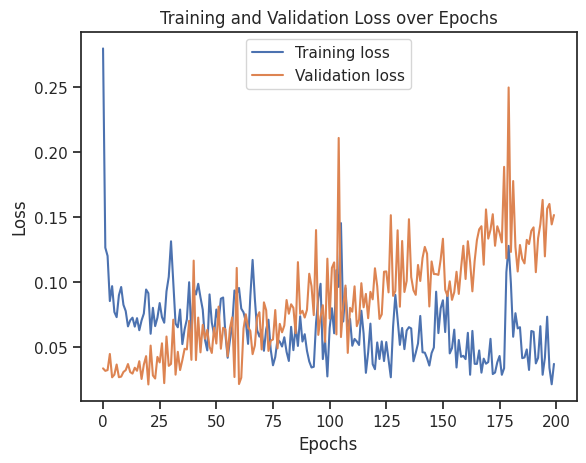

In [ ]:
# Plot training and validation loss
import matplotlib.pyplot as plt
plt.plot(train_loss_history_ss, label='Training loss')
plt.plot(val_loss_history_ss, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

#### **Đánh giá Classification_report**

In [ ]:
# Thiết lập dự đoán

test_ss_predictions, test_ss_actuals = get_predictions(model_ss, test_ss_loader)

In [ ]:
# Chuyển đổi test_allcol_predictions sang dạng nhị phân dựa trên threshold=0.5, test_allcol_actuals đã là dạng nhị phân rồi nên tha
predictions_ss_binary = np.where(test_ss_predictions >= 0.5, 1, 0)

In [ ]:
print(classification_report(test_ss_actuals, predictions_ss_binary))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        90
           1       0.71      0.92      0.80        26

    accuracy                           0.90       116
   macro avg       0.84      0.91      0.87       116
weighted avg       0.92      0.90      0.90       116



In [ ]:
# Lấy Accuracy
acc_pyt_ss=accuracy_score(test_ss_actuals, predictions_ss_binary)
# Lấy F1 score
f1_pyt_ss=f1_score(test_ss_actuals, predictions_ss_binary)

## **E. Compare Result of all DL Model**

In [ ]:
# First, make a List that include the result for each model DL
list_dl = [["Keras","all-column","none",100*(acc_krtf),100*(f1_krtf)],
["Pytorch","all-column","none", 100*(acc_pyt),100*(f1_pyt)],
["Keras","top8","none",100*(acc_krtf_top8),100*(f1_krtf_top8)],
["Pytorch","top8","none", 100*(acc_pyt_top8),100*(f1_pyt_top8)],
["Keras","top8","move Outlier strade2",100*(acc_krtf_strade2),100*(f1_krtf_strade2)],
["Pytorch","top8","move Outlier strade2", 100*(acc_pyt_strade2),100*(f1_pyt_strade2)],
["Keras","all-column","SS&SI",100*(acc_krtf_ss),100*(f1_krtf_ss)],
["Pytorch","all-column","SS&SI", 100*(acc_pyt_ss),100*(f1_pyt_ss)]]

In [ ]:
# Create a dataframe to vizuallize the results after comparing
compare_dl= pd.DataFrame(list_dl, columns=['Model', 'Scale of Dataset',
                                           'Use Feature Engineer Principle', 'Accuracy of Model', 'F1 score of Model']).sort_values(by='F1 score of Model', ascending=False)
# Add "%" symbol at the end of number appear in "Accuracy of Model"
compare_dl['Accuracy of Model'] = compare_dl['Accuracy of Model'].apply(lambda x: f"{round(x, 4)}%")
compare_dl['F1 score of Model'] = compare_dl['F1 score of Model'].apply(lambda x: f"{round(x, 4)}%")

# It's time to enjoy the score rank
display(compare_dl)

Model Scale of Dataset Use Feature Engineer Principle Accuracy of Model  \
2    Keras             top8                           none            100.0%   
4    Keras             top8           move Outlier strade2            100.0%   
6    Keras       all-column                          SS&SI          99.2218%   
5  Pytorch             top8           move Outlier strade2           93.007%   
1  Pytorch       all-column                           none          93.1034%   
3  Pytorch             top8                           none          92.2414%   
7  Pytorch       all-column                          SS&SI          89.6552%   
0    Keras       all-column                           none          75.0973%   

  F1 score of Model  
2            100.0%  
4            100.0%  
6          98.4615%  
5             87.5%  
1          85.7143%  
3          85.2459%  
7             80.0%  
0              0.0%

# **6. Export Model**

## **ML Model**

In [ ]:
# For the No.1 ML model: Randomforest with strade2
model2_rf

RandomForestClassifier()

In [ ]:
import joblib

In [ ]:
# Lưu mô hình
joblib.dump(model2_rf, 'model_randomforest.pkl')

['model_randomforest.pkl']

In [ ]:
# Dowload Model
#files.download('model_randomforest.pkl')

## **DL Model**

In [ ]:
# For No.1 DL Model: model_top8
model_top8

PYModel(
  (fc1): Linear(in_features=8, out_features=100, bias=True)
  (dropout): Dropout(p=0.55, inplace=False)
  (fc2): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
# Lưu mô hình
torch.save(model_top8.state_dict(), 'model_PytorchNN.pth')


In [ ]:
# Dowload Model
#files.download('model_PytorchNN.pth')

# **7. Bonus Research and Experimence**

## **Ensemble Learning**

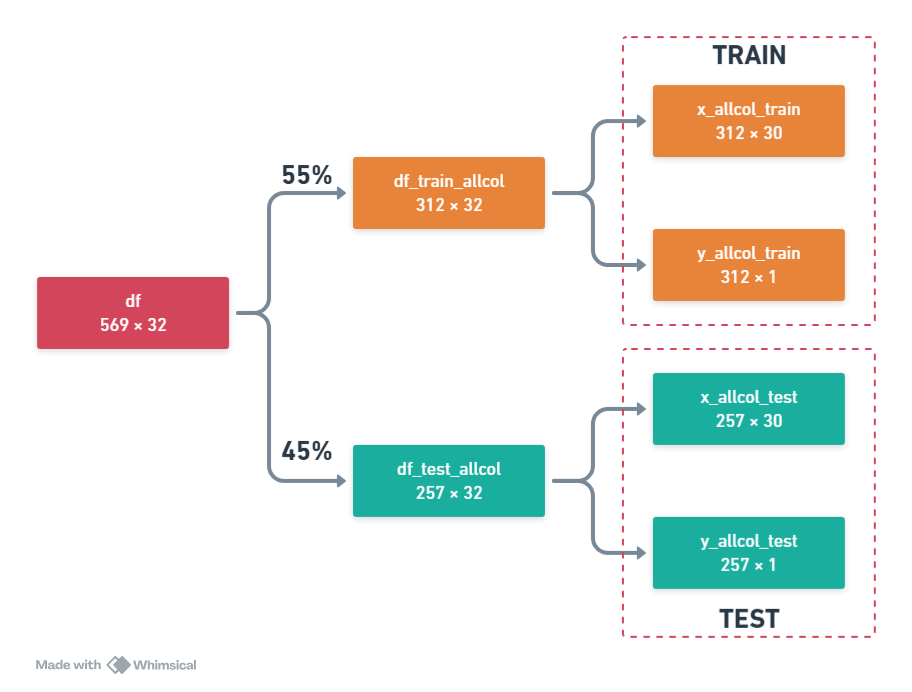

### **For Train Dataset and Test Dataset**

In [ ]:
df_train_allcol

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
307     89346          0         9.00         14.40           56.36   
308    893526          0        13.50         12.71           85.69   
309    893548          0        13.05         13.84           82.71   
310    893783          0        11.70         19.11           74.33   
311  89382601          0        14.61         15.69           92.68   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760        0.300100   
1       1326.0          0.08474           0.07864        0.086900   
2       1203.0          0.10960           0.15990        0.197400   
3        386.1          0.14250           0.28390        0.241400   
4       1297.0          0.10030           0.13280        0.198000   
..         ...              ...               ...             ...   
307      246.3          0.07005           0.03116        0.003681   
308      566.2          0.07376           0.03614        0.002758   
309      530.6          0.08352           0.03735        0.004559   
310      418.7          0.08814           0.05253        0.015830   
311      664.9          0.07618           0.03515        0.014470   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0               0.147100  ...        25.380          17.33           184.60   
1               0.070170  ...        24.990          23.41           158.80   
2               0.127900  ...        23.570          25.53           152.50   
3               0.105200  ...        14.910          26.50            98.87   
4               0.104300  ...        22.540          16.67           152.20   
..                   ...  ...           ...            ...              ...   
307             0.003472  ...         9.699          20.07            60.90   
308             0.004419  ...        14.970          16.94            95.48   
309             0.008829  ...        14.730          17.40            93.96   
310             0.011480  ...        12.610          26.55            80.92   
311             0.018770  ...        16.460          21.75           103.70   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560          0.71190   
1        1956.0           0.12380            0.18660          0.24160   
2        1709.0           0.14440            0.42450          0.45040   
3         567.7           0.20980            0.86630          0.68690   
4        1575.0           0.13740            0.20500          0.40000   
..          ...               ...                ...              ...   
307       285.5           0.09861            0.05232          0.01472   
308       698.7           0.09023            0.05836          0.01379   
309       672.4           0.10160            0.05847          0.01824   
310       483.1           0.12230            0.10870          0.07915   
311       840.8           0.10110            0.07087          0.04746   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                 0.26540          0.4601                  0.11890  
1                 0.18600          0.2750                  0.08902  
2                 0.24300          0.3613                  0.08758  
3                 0.25750          0.6638                  0.17300  
4                 0.16250          0.2364                  0.07678  
..                    ...             ...                      ...  
307               0.

In [ ]:
df_test_allcol

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
312  89382602          0       12.760         13.37           82.29   
313    893988          0       11.540         10.72           73.73   
314    894047          0        8.597         18.60           54.09   
315    894089          0       12.490         16.85           79.19   
316    894090          0       12.180         14.08           77.25   
..        ...        ...          ...           ...             ...   
564    926424          1       21.560         22.39          142.00   
565    926682          1       20.130         28.25          131.20   
566    926954          1       16.600         28.08          108.30   
567    927241          1       20.600         29.33          140.10   
568     92751          0        7.760         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
312      504.1          0.08794           0.07948        0.040520   
313      409.1          0.08597           0.05969        0.013670   
314      221.2          0.10740           0.05847        0.000000   
315      481.6          0.08511           0.03834        0.004473   
316      461.4          0.07734           0.03212        0.011230   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590        0.243900   
565     1261.0          0.09780           0.10340        0.144000   
566      858.1          0.08455           0.10230        0.092510   
567     1265.0          0.11780           0.27700        0.351400   
568      181.0          0.05263           0.04362        0.000000   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
312             0.025480  ...        14.190          16.40            92.04   
313             0.008907  ...        12.340          12.87            81.23   
314             0.000000  ...         8.952          22.44            56.65   
315             0.006423  ...        13.340          19.71            84.48   
316             0.005051  ...        12.850          16.47            81.60   
..                   ...  ...           ...            ...              ...   
564             0.138900  ...        25.450          26.40           166.10   
565             0.097910  ...        23.690          38.25           155.00   
566             0.053020  ...        18.980          34.12           126.70   
567             0.152000  ...        25.740          39.42           184.60   
568             0.000000  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
312       618.8           0.11940            0.22080          0.17690   
313       467.8           0.10920            0.16260          0.08324   
314       240.1           0.13470            0.07767          0.00000   
315       544.2           0.11040            0.04953          0.01938   
316       513.1           0.10010            0.05332          0.04116   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130          0.41070   
565      1731.0           0.11660            0.19220          0.32150   
566      1124.0           0.11390            0.30940          0.34030   
567      1821.0           0.16500            0.86810          0.93870   
568       268.6           0.08996            0.06444          0.00000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
312               0.08411          0.2564                  0.08253  
313               0.04715          0.3390                  0.07434  
314               0.00000          0.3142                  0.08116  
315               0.02784          0.1917                  0.06174  
316               0.01852          0.2293                  0.06037  
..                    ...             ...                      ...  
564               0.

In [ ]:
# Tách tập train và test từ df_train_allcol và df_test_allcol
x_allcol_train, x_allcol_test= df_train_allcol.drop(["id",tar_column],axis=1), df_test_allcol.drop(["id",tar_column], axis=1)

In [ ]:
y_allcol_train, y_allcol_test= df_train_allcol[tar_column], df_test_allcol[tar_column]

### **Callout 3 models and fit them**

In [ ]:
import lightgbm as lgb

In [ ]:
# Model SVM
model_svm_vote_allcol = svm.SVC(probability=True)
model_svm_vote_allcol.fit(x_allcol_train, y_allcol_train)

SVC(probability=True)

In [ ]:
# Model Decision Tree
model_dt_vote_allcol = DecisionTreeClassifier(max_depth=30)
model_dt_vote_allcol.fit(x_allcol_train, y_allcol_train)

DecisionTreeClassifier(max_depth=30)

In [ ]:
# Model LGBM
model_lgb_vote_allcol = lgb.LGBMClassifier(verbose=-1)
model_lgb_vote_allcol.fit(x_allcol_train, y_allcol_train)

LGBMClassifier(verbose=-1)

### **Summon and train Model Voting Classifier**

In [ ]:
# Summon the Voting Model for Classification Issue

from sklearn.ensemble import VotingClassifier

In [ ]:
voting_model_allcol = VotingClassifier(
    estimators=[
        ('dt', model_dt_vote_allcol),
        ('svm', model_svm_vote_allcol),
        ('lgb', model_lgb_vote_allcol)
    ],
    voting='hard'
)

In [ ]:
# Train the Voting Model
voting_model_allcol.fit(x_allcol_train, y_allcol_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=30)),
                             ('svm', SVC(probability=True)),
                             ('lgb', LGBMClassifier(verbose=-1))])

### **Evaluate the Voting Model**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Create y_pred of Voting Model predict base on x_allcol_test
y_pred_vote_allcol = voting_model_allcol.predict(x_allcol_test)

In [ ]:
print(classification_report(y_allcol_test, y_pred_vote_allcol))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       193
           1       0.85      0.97      0.91        64

    accuracy                           0.95       257
   macro avg       0.92      0.96      0.94       257
weighted avg       0.95      0.95      0.95       257



In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_allcol_test, y_pred_vote_allcol))

Confusion Matrix:
 [[182  11]
 [  2  62]]


## **Incremental Learning**

In [ ]:
!pip install river
from river import metrics
from river import linear_model
from river import stream
from river import datasets
from river import evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
gensim 4.3.3 requires scipy

In [ ]:
# Import Metric
metric_river = metrics.MacroF1()

In [ ]:
# Danh sách các cột không kèm cột target
column_names_notarget

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [ ]:
# Import Model
model_incremental = linear_model.LogisticRegression()

In [ ]:
# Lặp qua dữ liệu luồng
for i, (x, y) in enumerate(stream.iter_array(x_allcol_train.values, y_allcol_train.values, column_names_notarget)):
    # Dự đoán
    y_pred = model_incremental.predict_one(x)
    metric_river.update(y, y_pred)
    model_incremental.learn_one(x,y)
    if i % 10 == 0:
        print(i, metric_river)

0 MacroF1: 0.00%
10 MacroF1: 47.62%
20 MacroF1: 46.15%
30 MacroF1: 63.10%
40 MacroF1: 58.45%
50 MacroF1: 66.88%
60 MacroF1: 72.33%
70 MacroF1: 70.23%
80 MacroF1: 64.64%
90 MacroF1: 60.39%
100 MacroF1: 60.50%
110 MacroF1: 57.55%
120 MacroF1: 58.74%
130 MacroF1: 62.49%
140 MacroF1: 64.06%
150 MacroF1: 65.23%
160 MacroF1: 66.90%
170 MacroF1: 65.88%
180 MacroF1: 65.70%
190 MacroF1: 64.63%
200 MacroF1: 63.76%
210 MacroF1: 62.41%
220 MacroF1: 63.04%
230 MacroF1: 63.67%
240 MacroF1: 64.39%
250 MacroF1: 66.08%
260 MacroF1: 67.16%
270 MacroF1: 68.41%
280 MacroF1: 68.52%
290 MacroF1: 68.72%
300 MacroF1: 68.91%
310 MacroF1: 69.02%


In [ ]:
# Print Classification_report
y_true_list = []
y_pred_list = []

# Lặp qua dữ liệu
for i, (x, y) in enumerate(stream.iter_array(x_allcol_test.values, y_allcol_test.values, column_names_notarget)):
    # Dự đoán
    y_pred = model_incremental.predict_one(x)
    metric_river.update(y, y_pred)
    model_incremental.learn_one(x,y)
    if i % 10 == 0:
        print(i, metric_river)

    # Dự đoán nhãn cho mẫu dữ liệu kiểm tra
    y_pred = model_incremental.predict_one(x)

    # Lưu giá trị thực tế và giá trị dự đoán vào danh sách
    y_true_list.append(y)
    y_pred_list.append(y_pred)

0 MacroF1: 69.24%
10 MacroF1: 69.62%
20 MacroF1: 69.34%
30 MacroF1: 69.95%
40 MacroF1: 69.68%
50 MacroF1: 69.97%
60 MacroF1: 69.71%
70 MacroF1: 69.45%
80 MacroF1: 68.95%
90 MacroF1: 69.21%
100 MacroF1: 69.19%
110 MacroF1: 69.41%
120 MacroF1: 69.60%
130 MacroF1: 69.13%
140 MacroF1: 68.93%
150 MacroF1: 69.34%
160 MacroF1: 69.28%
170 MacroF1: 69.21%
180 MacroF1: 69.19%
190 MacroF1: 69.36%
200 MacroF1: 69.52%
210 MacroF1: 68.96%
220 MacroF1: 69.41%
230 MacroF1: 69.04%
240 MacroF1: 69.46%
250 MacroF1: 69.69%


In [ ]:
print(classification_report(y_true_list, y_pred_list))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       193
           1       0.77      1.00      0.87        64

    accuracy                           0.93       257
   macro avg       0.89      0.95      0.91       257
weighted avg       0.94      0.93      0.93       257

